In [1]:
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
warnings.simplefilter("ignore")
df = pd.read_csv("nyc_collision_dataset.csv")

In [3]:
df.head()

CRASH DATE CRASH TIME   BOROUGH ZIP CODE   LATITUDE  LONGITUDE  \
0  09/11/2021       2:39       NaN      NaN        NaN        NaN   
1  03/26/2022      11:45       NaN      NaN        NaN        NaN   
2  06/29/2022       6:55       NaN      NaN        NaN        NaN   
3  09/11/2021       9:35  BROOKLYN  11208.0  40.667202 -73.866500   
4  12/14/2021       8:13  BROOKLYN  11233.0  40.683304 -73.917274   

                  LOCATION           ON STREET NAME CROSS STREET NAME  \
0                      NaN    WHITESTONE EXPRESSWAY         20 AVENUE   
1                      NaN  QUEENSBORO BRIDGE UPPER               NaN   
2                      NaN       THROGS NECK BRIDGE               NaN   
3    (40.667202, -73.8665)                      NaN               NaN   
4  (40.683304, -73.917274)          SARATOGA AVENUE    DECATUR STREET   

           OFF STREET NAME  ...  CONTRIBUTING FACTOR VEHICLE 2  \
0                      NaN  ...                    Unspecified   
1                      NaN  ...                            NaN   
2                      NaN  ...                    Unspecified   
3  1211      LORING AVENUE  ...                            NaN   
4                      NaN  ...                            NaN   

   CONTRIBUTING FACTOR VEHICLE 3  CONTRIBUTING FACTOR VEHICLE 4  \
0                            NaN                            NaN   
1                            NaN                            NaN   
2                            NaN                            NaN   
3                            NaN                            NaN   
4                            NaN                            NaN   

   CONTRIBUTING FACTOR VEHICLE 5  COLLISION_ID  VEHICLE TYPE CODE 1  \
0                            NaN       4455765                Sedan   
1                            NaN       4513547                Sedan   
2                            NaN       4541903                Sedan   
3                            NaN       4456314                Sedan   
4                            NaN       4486609                  NaN   

   VEHICLE TYPE CODE 2  VEHICLE TYPE CODE 3 VEHICLE TYPE CODE 4  \
0                Sedan                  NaN                 NaN   
1                  NaN                  NaN                 NaN   
2        Pick-up Truck                  NaN                 NaN   
3                  NaN                  NaN                 NaN   
4                  NaN                  NaN                 NaN   

  VEHICLE TYPE CODE 5  
0                 NaN  
1                 NaN  
2                 NaN  
3                 NaN  
4                 NaN  

[5 rows x 29 columns]

In [4]:
# explore the data type for each field
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2077866 entries, 0 to 2077865
Data columns (total 29 columns):
 #   Column                         Dtype  
---  ------                         -----  
 0   CRASH DATE                     object 
 1   CRASH TIME                     object 
 2   BOROUGH                        object 
 3   ZIP CODE                       object 
 4   LATITUDE                       float64
 5   LONGITUDE                      float64
 6   LOCATION                       object 
 7   ON STREET NAME                 object 
 8   CROSS STREET NAME              object 
 9   OFF STREET NAME                object 
 10  NUMBER OF PERSONS INJURED      float64
 11  NUMBER OF PERSONS KILLED       float64
 12  NUMBER OF PEDESTRIANS INJURED  int64  
 13  NUMBER OF PEDESTRIANS KILLED   int64  
 14  NUMBER OF CYCLIST INJURED      int64  
 15  NUMBER OF CYCLIST KILLED       int64  
 16  NUMBER OF MOTORIST INJURED     int64  
 17  NUMBER OF MOTORIST KILLED      int64  
 18  CO

In [5]:
# change all the columns to lower case
df.columns = df.columns.str.lower()
df.columns

Index(['crash date', 'crash time', 'borough', 'zip code', 'latitude',
       'longitude', 'location', 'on street name', 'cross street name',
       'off street name', 'number of persons injured',
       'number of persons killed', 'number of pedestrians injured',
       'number of pedestrians killed', 'number of cyclist injured',
       'number of cyclist killed', 'number of motorist injured',
       'number of motorist killed', 'contributing factor vehicle 1',
       'contributing factor vehicle 2', 'contributing factor vehicle 3',
       'contributing factor vehicle 4', 'contributing factor vehicle 5',
       'collision_id', 'vehicle type code 1', 'vehicle type code 2',
       'vehicle type code 3', 'vehicle type code 4', 'vehicle type code 5'],
      dtype='object')

In [6]:
df.head()

crash date crash time   borough zip code   latitude  longitude  \
0  09/11/2021       2:39       NaN      NaN        NaN        NaN   
1  03/26/2022      11:45       NaN      NaN        NaN        NaN   
2  06/29/2022       6:55       NaN      NaN        NaN        NaN   
3  09/11/2021       9:35  BROOKLYN  11208.0  40.667202 -73.866500   
4  12/14/2021       8:13  BROOKLYN  11233.0  40.683304 -73.917274   

                  location           on street name cross street name  \
0                      NaN    WHITESTONE EXPRESSWAY         20 AVENUE   
1                      NaN  QUEENSBORO BRIDGE UPPER               NaN   
2                      NaN       THROGS NECK BRIDGE               NaN   
3    (40.667202, -73.8665)                      NaN               NaN   
4  (40.683304, -73.917274)          SARATOGA AVENUE    DECATUR STREET   

           off street name  ...  contributing factor vehicle 2  \
0                      NaN  ...                    Unspecified   
1                      NaN  ...                            NaN   
2                      NaN  ...                    Unspecified   
3  1211      LORING AVENUE  ...                            NaN   
4                      NaN  ...                            NaN   

   contributing factor vehicle 3  contributing factor vehicle 4  \
0                            NaN                            NaN   
1                            NaN                            NaN   
2                            NaN                            NaN   
3                            NaN                            NaN   
4                            NaN                            NaN   

   contributing factor vehicle 5  collision_id  vehicle type code 1  \
0                            NaN       4455765                Sedan   
1                            NaN       4513547                Sedan   
2                            NaN       4541903                Sedan   
3                            NaN       4456314                Sedan   
4                            NaN       4486609                  NaN   

   vehicle type code 2  vehicle type code 3 vehicle type code 4  \
0                Sedan                  NaN                 NaN   
1                  NaN                  NaN                 NaN   
2        Pick-up Truck                  NaN                 NaN   
3                  NaN                  NaN                 NaN   
4                  NaN                  NaN                 NaN   

  vehicle type code 5  
0                 NaN  
1                 NaN  
2                 NaN  
3                 NaN  
4                 NaN  

[5 rows x 29 columns]

# Missing Values Handling

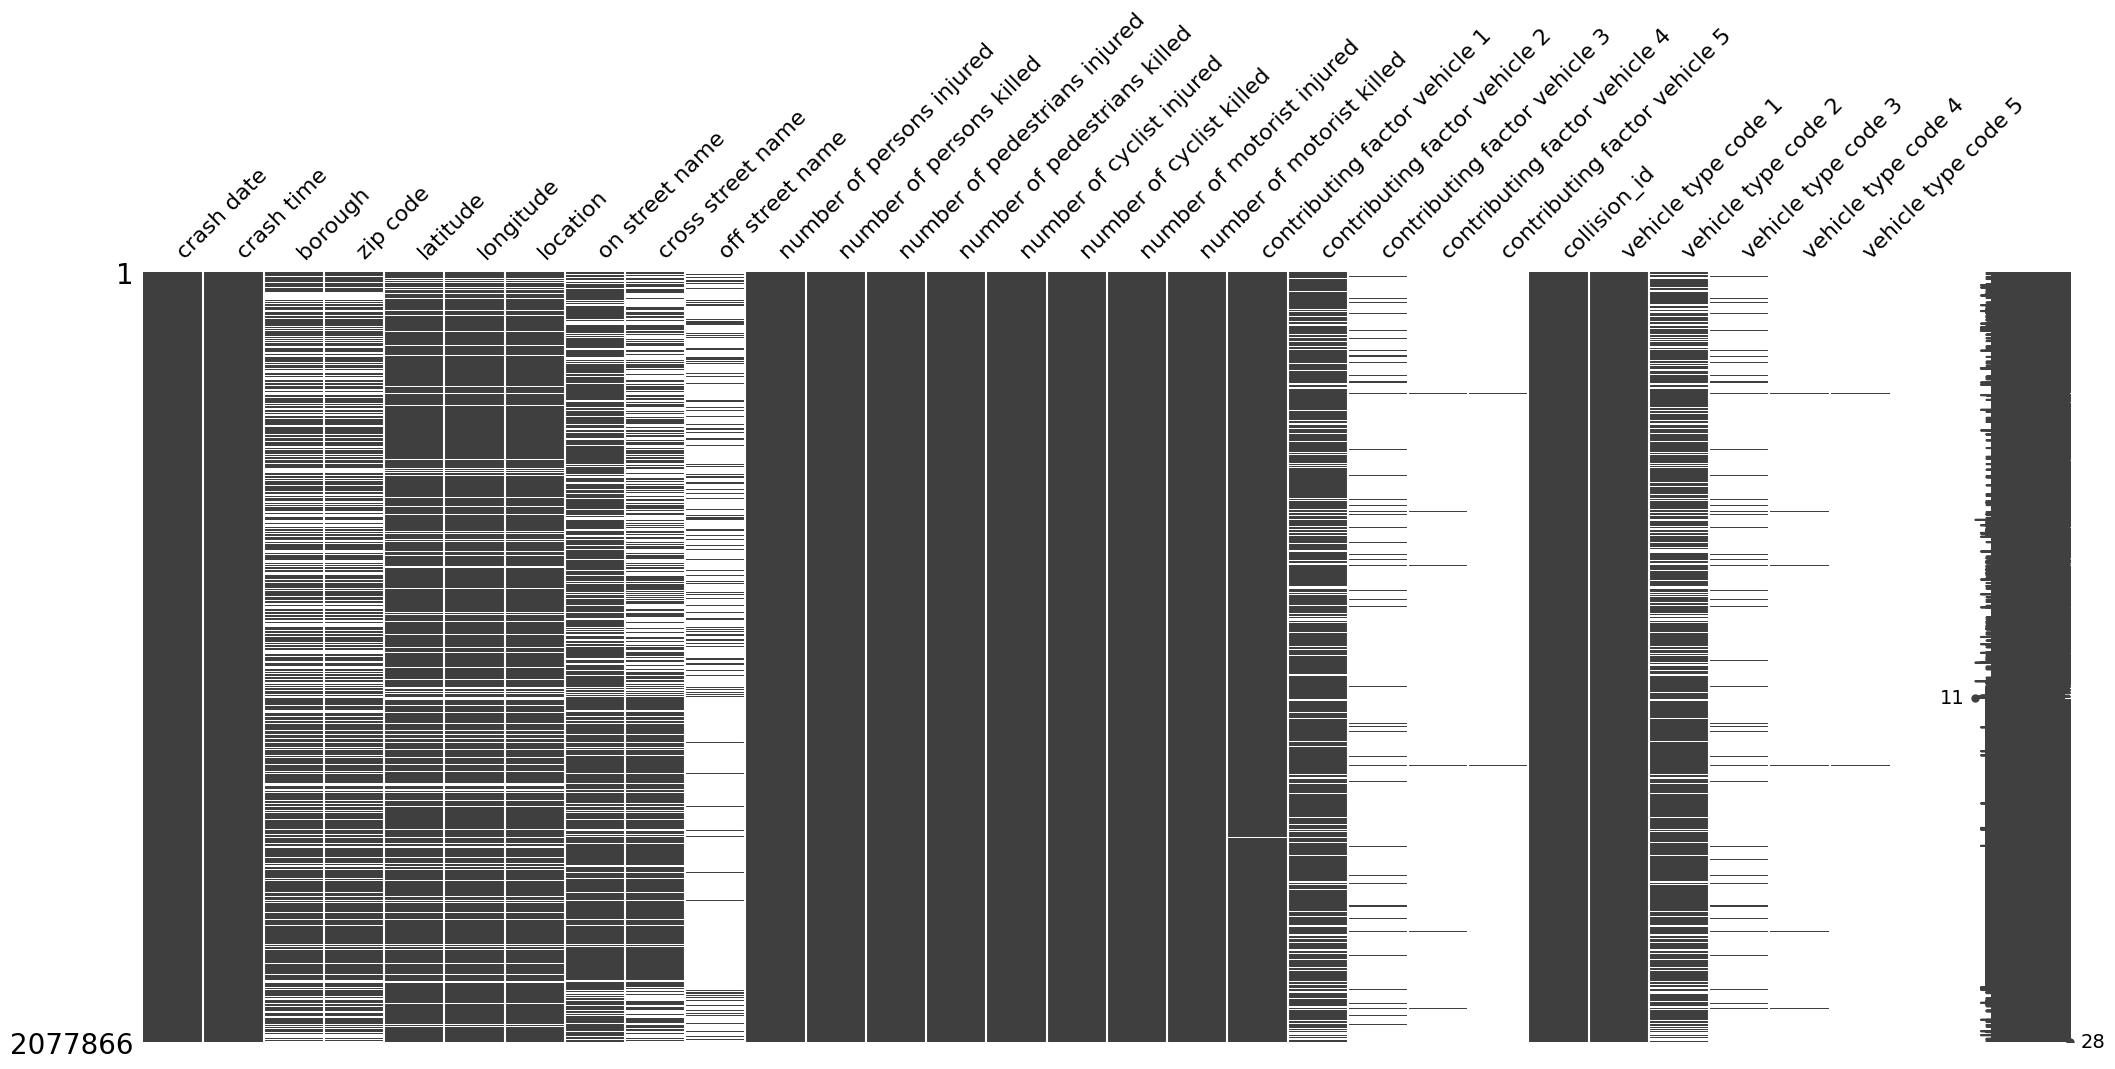

In [7]:
# an overview of missing values in each rows
import missingno as msno
msno.matrix(df);

## Filling up Missing Info in Borough
- Why
    - one of major evaluation fields of our study. 
    - contains roughly 31% missing values, simply drop them might hurt distribution
- How
    - filling up missings based on givin geopoint fields
    - match the geo coordinate with nyc borough boundary api [NYC Open Data](https://data.cityofnewyork.us/City-Government/Borough-Boundaries/tqmj-j8zm)

In [8]:
# find the subset that borough is null
df1 = df[df['borough'].isna()]

print(f'Number of rows in this dataset: {len(df1)}')

Number of rows in this dataset: 646515


In [9]:
# Find the number of rows that the 'borough' is null but 'location' is not
df2= df[(df['borough'].isna()) & (~df['location'].isna())]

print(f'Number of rows in this dataset: {len(df2)}')

Number of rows in this dataset: 449624


In [10]:
# df2 -> this part of data can be dealed with 'reverse geocode'
df2.head()

crash date crash time borough zip code   latitude  longitude  \
6   12/14/2021      17:05     NaN      NaN  40.709183 -73.956825   
10  12/13/2021       0:34     NaN      NaN  40.701275 -73.888870   
13  12/14/2021       0:59     NaN      NaN  40.596620 -74.002310   
19  12/14/2021      14:30     NaN      NaN  40.783268 -73.824850   
21  12/14/2021       5:46     NaN      NaN  40.744644 -73.770410   

                   location              on street name cross street name  \
6   (40.709183, -73.956825)  BROOKLYN QUEENS EXPRESSWAY               NaN   
10   (40.701275, -73.88887)               MYRTLE AVENUE               NaN   
13    (40.59662, -74.00231)                BELT PARKWAY               NaN   
19   (40.783268, -73.82485)       WHITESTONE EXPRESSWAY               NaN   
21   (40.744644, -73.77041)      LONG ISLAND EXPRESSWAY               NaN   

   off street name  ...  contributing factor vehicle 2  \
6              NaN  ...                    Unspecified   
10             NaN  ...                    Unspecified   
13             NaN  ...                            NaN   
19             NaN  ...                    Unspecified   
21             NaN  ...                Other Vehicular   

    contributing factor vehicle 3  contributing factor vehicle 4  \
6                             NaN                            NaN   
10                            NaN                            NaN   
13                            NaN                            NaN   
19                    Unspecified                            NaN   
21                            NaN                            NaN   

    contributing factor vehicle 5  collision_id  \
6                             NaN       4486555   
10                            NaN       4486934   
13                            NaN       4486564   
19                            NaN       4486537   
21                            NaN       4487122   

                    vehicle type code 1                  vehicle type code 2  \
6                                 Sedan                 Tractor Truck Diesel   
10  Station Wagon/Sport Utility Vehicle                                  NaN   
13                                Sedan                                  NaN   
19  Station Wagon/Sport Utility Vehicle                                Sedan   
21  Station Wagon/Sport Utility Vehicle  Station Wagon/Sport Utility Vehicle   

    vehicle type code 3 vehicle type code 4 vehicle type code 5  
6                   NaN                 NaN                 NaN  
10                  NaN                 NaN                 NaN  
13                  NaN                 NaN                 NaN  
19                Sedan                 NaN                 NaN  
21                  NaN                 NaN                 NaN  

[5 rows x 29 columns]

In [11]:
import json
import requests
import geopandas as gpd
from shapely.geometry import shape
from shapely.geometry import Point

In [12]:
# get the borough boundary api from 'https://data.cityofnewyork.us/City-Government/Borough-Boundaries/tqmj-j8zm' NYC open data
url = 'https://data.cityofnewyork.us/resource/7t3b-ywvw.json'

# request to get data into text format
response = requests.get(url).text

# loads it into json format
d = json.loads(response)

In [13]:
# lookup borough info
[d[i]['boro_name'] for i in range(len(d))]

['Brooklyn', 'Staten Island', 'Manhattan', 'Bronx', 'Queens']

In [14]:
# lookup keys info
d[0].keys()

dict_keys(['the_geom', 'boro_code', 'boro_name', 'shape_leng', 'shape_area'])

In [15]:
# create a GeoDataFrame with the requested data
geoms = [shape(borough['the_geom']) for borough in d]
boroughs_gdf = gpd.GeoDataFrame(d, geometry=geoms)
boroughs_gdf

the_geom boro_code      boro_name  \
0  {'type': 'MultiPolygon', 'coordinates': [[[[-7...         3       Brooklyn   
1  {'type': 'MultiPolygon', 'coordinates': [[[[-7...         5  Staten Island   
2  {'type': 'MultiPolygon', 'coordinates': [[[[-7...         1      Manhattan   
3  {'type': 'MultiPolygon', 'coordinates': [[[[-7...         2          Bronx   
4  {'type': 'MultiPolygon', 'coordinates': [[[[-7...         4         Queens   

      shape_leng     shape_area  \
0  728150.705111  1934142842.48   
1  325910.306061  1623618684.31   
2  360056.730857  636645571.613   
3  463180.578878  1187174772.32   
4  888197.010944   3041418003.6   

                                            geometry  
0  MULTIPOLYGON (((-73.86327 40.58388, -73.86381 ...  
1  MULTIPOLYGON (((-74.05051 40.56642, -74.05047 ...  
2  MULTIPOLYGON (((-74.01093 40.68449, -74.01193 ...  
3  MULTIPOLYGON (((-73.89681 40.79581, -73.89694 ...  
4  MULTIPOLYGON (((-73.82645 40.59053, -73.82642 ...

In [16]:
# Create Point geometries from latitude and longitude
points_gdf = gpd.GeoDataFrame(df2, geometry=gpd.points_from_xy(df2.longitude, df2.latitude))

# perform the spatial join
# after join, the borough
joined_gdf = gpd.sjoin(points_gdf, boroughs_gdf, how='left', predicate='within')

# update the 'df2' with the 'boro_name'
df2['borough'] = joined_gdf['boro_name']

df2.head()

crash date crash time   borough zip code   latitude  longitude  \
6   12/14/2021      17:05  Brooklyn      NaN  40.709183 -73.956825   
10  12/13/2021       0:34    Queens      NaN  40.701275 -73.888870   
13  12/14/2021       0:59  Brooklyn      NaN  40.596620 -74.002310   
19  12/14/2021      14:30    Queens      NaN  40.783268 -73.824850   
21  12/14/2021       5:46    Queens      NaN  40.744644 -73.770410   

                   location              on street name cross street name  \
6   (40.709183, -73.956825)  BROOKLYN QUEENS EXPRESSWAY               NaN   
10   (40.701275, -73.88887)               MYRTLE AVENUE               NaN   
13    (40.59662, -74.00231)                BELT PARKWAY               NaN   
19   (40.783268, -73.82485)       WHITESTONE EXPRESSWAY               NaN   
21   (40.744644, -73.77041)      LONG ISLAND EXPRESSWAY               NaN   

   off street name  ...  contributing factor vehicle 2  \
6              NaN  ...                    Unspecified   
10             NaN  ...                    Unspecified   
13             NaN  ...                            NaN   
19             NaN  ...                    Unspecified   
21             NaN  ...                Other Vehicular   

    contributing factor vehicle 3  contributing factor vehicle 4  \
6                             NaN                            NaN   
10                            NaN                            NaN   
13                            NaN                            NaN   
19                    Unspecified                            NaN   
21                            NaN                            NaN   

    contributing factor vehicle 5  collision_id  \
6                             NaN       4486555   
10                            NaN       4486934   
13                            NaN       4486564   
19                            NaN       4486537   
21                            NaN       4487122   

                    vehicle type code 1                  vehicle type code 2  \
6                                 Sedan                 Tractor Truck Diesel   
10  Station Wagon/Sport Utility Vehicle                                  NaN   
13                                Sedan                                  NaN   
19  Station Wagon/Sport Utility Vehicle                                Sedan   
21  Station Wagon/Sport Utility Vehicle  Station Wagon/Sport Utility Vehicle   

    vehicle type code 3 vehicle type code 4 vehicle type code 5  
6                   NaN                 NaN                 NaN  
10                  NaN                 NaN                 NaN  
13                  NaN                 NaN                 NaN  
19                Sedan                 NaN                 NaN  
21                  NaN                 NaN                 NaN  

[5 rows x 29 columns]

In [17]:
# update the df2 records to df
df.update(df2)

In [18]:
# check the number of missing values in 'borough' now in 'df'                       0.311
result = round(df.isna().sum().sort_values(ascending=False)/len(df), 3)
result.loc['borough']

0.099

# Basic Data Cleaning

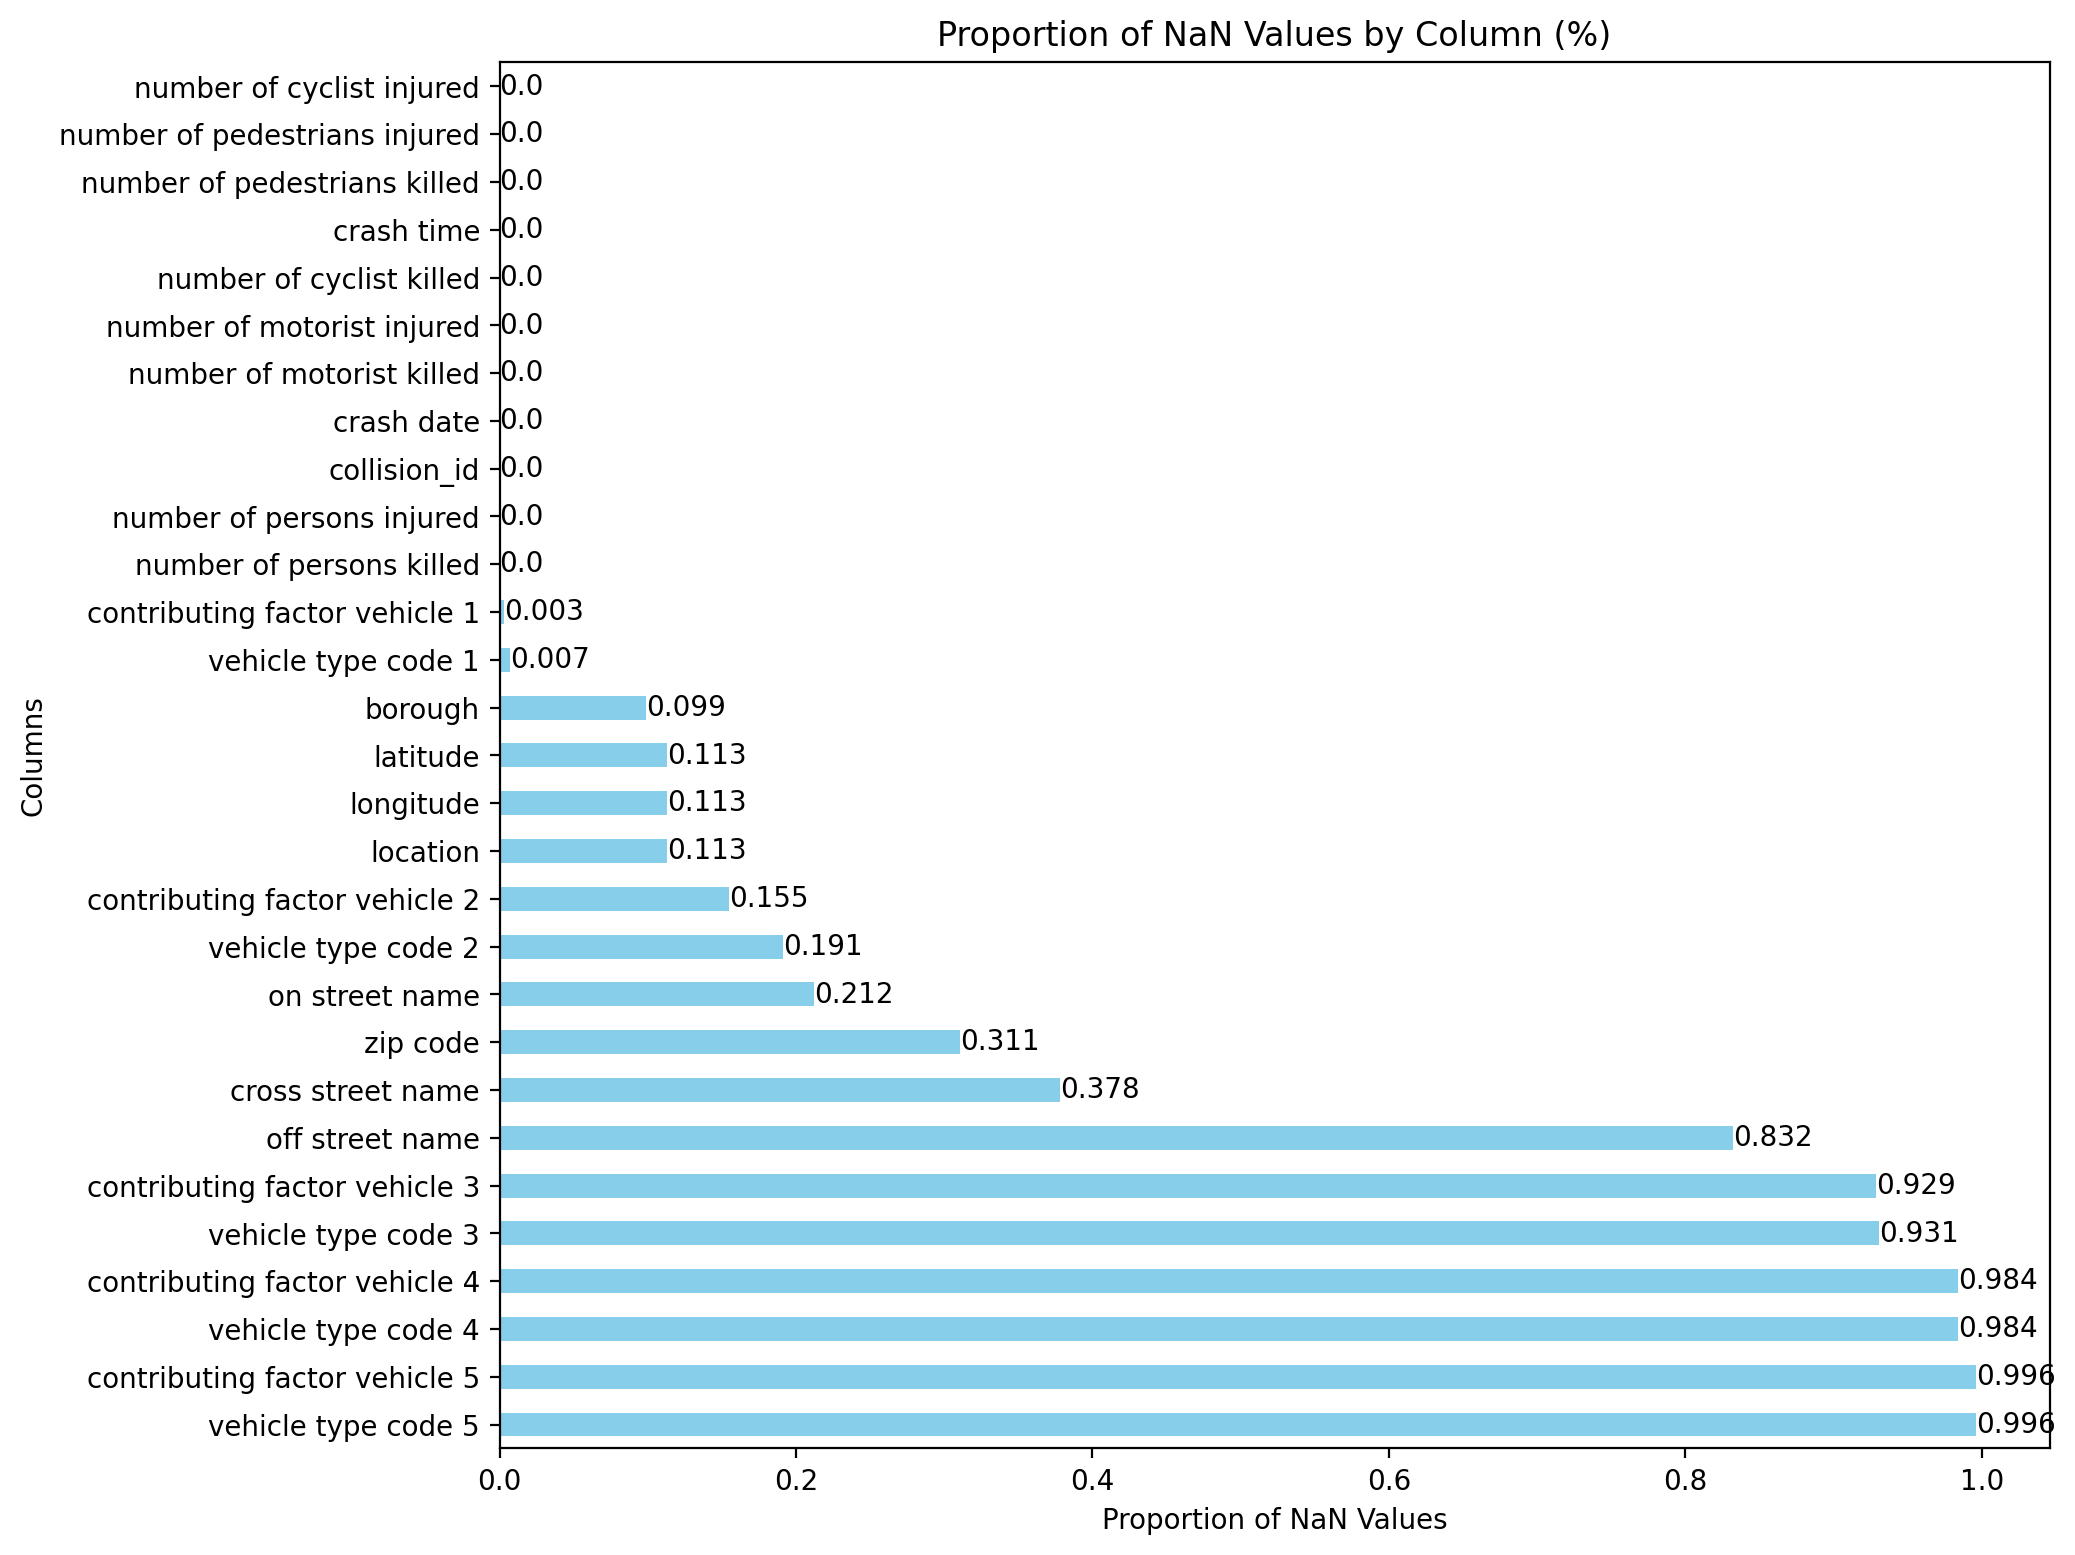

In [19]:
# what percentage of missing values does each column contains
result = round(df.isna().sum().sort_values(ascending=False)/len(df), 3)

# visualize the 'result'
# Plotting
fig, ax = plt.subplots(figsize=(10, 9), dpi=200)  # Adjust the figure size as needed
result.plot(kind='barh', ax=ax, color='skyblue')  # 'barh' makes the bar chart horizontal

# Adding the value labels to each bar
for index, value in enumerate(result):
    ax.text(value, index, str(value), va='center', ha='left')  # Adjust text alignment as needed

# Setting labels and title
plt.xlabel('Proportion of NaN Values')
plt.ylabel('Columns')
plt.title('Proportion of NaN Values by Column (%)')

plt.show()

## Determine fields to keep for analysis
- **To do:**
    - **inspect the distribution of key features**
        - contributing factor vehicle 1
        - contributing factor vehicle 2
        - vehicle type code 1
        - vehicle type code 2
    - **drop the columns that contains too many missing values(as high as 83% to 99%)**
        - off street name
        - contributing factor vehicle 3
        - contributing factor vehicle 4
        - contributing factor vecicle 5
        - vehicle type code 3
        - vehicle type code 4
        - vehicle type code 5
    - **drop any columns unrelated to study**
        - zip code
        - latitude
        - longtitude
        - location
    - **drop any columns that can be represented by alternative columns**
        - number of pedestrian injured
        - number of pedestrian killed
        - number of cyclist injured
        - number of cyclist killed
        - number of motorist injured
        - number of motorist killed
        > generalized columns: number of people killed, number of people injured
        - cross street name
        - off street name
        > only use on street name
    - **clean all rows contain uniformative or null value**

In [20]:
# distribution of 'contributing factor vehicle 1'
# 61 distinct values, 34% 'Unspeficied' -> this uninformative value should be dropped
df['contributing factor vehicle 1'].value_counts(normalize=True)

contributing factor vehicle 1
Unspecified                       0.341524
Driver Inattention/Distraction    0.200793
Failure to Yield Right-of-Way     0.059616
Following Too Closely             0.053635
Backing Unsafely                  0.037080
                                    ...   
Windshield Inadequate             0.000039
Cell Phone (hand-held)            0.000038
Texting                           0.000025
Listening/Using Headphones        0.000012
1                                 0.000005
Name: proportion, Length: 61, dtype: float64

In [21]:
# distribution of 'contributing factor vehicle 2'
# 61 distinct values, 84% 'Unspecified', plus previously found 15.5% null values -> this column should be dropped
df['contributing factor vehicle 2'].value_counts(normalize=True)

contributing factor vehicle 2
Unspecified                       0.841926
Driver Inattention/Distraction    0.053750
Other Vehicular                   0.018276
Following Too Closely             0.010853
Failure to Yield Right-of-Way     0.009761
                                    ...   
Eating or Drinking                0.000006
Listening/Using Headphones        0.000006
Windshield Inadequate             0.000004
1                                 0.000003
Texting                           0.000002
Name: proportion, Length: 61, dtype: float64

In [22]:
# no need to further inspection on 'vehicle type code 2'
# since 'contribuing factor vehicle x' and 'vehicle type code x' are in pair
# now: inspecting the distribution of 'vehicle type code 1'

# 1635 disctint value -> need to further cleaning in description and grouping(oprated in data preparation stage)
df['vehicle type code 1'].value_counts()

vehicle type code 1
Sedan                                  577767
Station Wagon/Sport Utility Vehicle    454377
PASSENGER VEHICLE                      416206
SPORT UTILITY / STATION WAGON          180291
Taxi                                    51595
                                        ...  
POLIC                                       1
Parce                                       1
35 FT                                       1
WINEB                                       1
Electric M                                  1
Name: count, Length: 1635, dtype: int64

In [23]:
# finally, these columns are dropped from the study
df = df.drop(['zip code', 'latitude',
       'longitude', 'location', 'cross street name',
       'off street name',
       'number of pedestrians injured',
       'number of pedestrians killed', 'number of cyclist injured',
       'number of cyclist killed', 'number of motorist injured',
       'number of motorist killed',
       'contributing factor vehicle 2', 'contributing factor vehicle 3',
       'contributing factor vehicle 4', 'contributing factor vehicle 5',
       'collision_id', 'vehicle type code 2',
       'vehicle type code 3', 'vehicle type code 4', 'vehicle type code 5'], axis=1)

In [24]:
df.head()

crash date crash time   borough           on street name  \
0  09/11/2021       2:39       NaN    WHITESTONE EXPRESSWAY   
1  03/26/2022      11:45       NaN  QUEENSBORO BRIDGE UPPER   
2  06/29/2022       6:55       NaN       THROGS NECK BRIDGE   
3  09/11/2021       9:35  BROOKLYN                      NaN   
4  12/14/2021       8:13  BROOKLYN          SARATOGA AVENUE   

   number of persons injured  number of persons killed  \
0                        2.0                       0.0   
1                        1.0                       0.0   
2                        0.0                       0.0   
3                        0.0                       0.0   
4                        0.0                       0.0   

  contributing factor vehicle 1 vehicle type code 1  
0  Aggressive Driving/Road Rage               Sedan  
1             Pavement Slippery               Sedan  
2         Following Too Closely               Sedan  
3                   Unspecified               Sedan  
4                           NaN                 NaN

In [25]:
round(df.isna().sum().sort_values(ascending=False)/len(df), 3)

on street name                   0.212
borough                          0.099
vehicle type code 1              0.007
contributing factor vehicle 1    0.003
number of persons killed         0.000
number of persons injured        0.000
crash date                       0.000
crash time                       0.000
dtype: float64

In [26]:
# drop all null values
df = df.dropna()

In [27]:
# drop all rows that contains value 'Unspecified' in 'contributing factor vehicle 1'
df = df[df['contributing factor vehicle 1'] != 'Unspecified']

In [28]:
df.shape

(967963, 8)

## Prarse Date and create new datetime rows + strip all categorical fields

In [29]:
# combine 'crash date', 'crash time' into new column 'date'
df['date'] = df['crash date'] + ' ' + df['crash time']

# drop 'crash date', 'crash time'
df = df.drop(['crash date','crash time'], axis=1)

# change the 'date' data type to datetime
df['date'] = pd.to_datetime(df['date'])

# quick inspect the date range recorded
df['date'].describe()

count                           967963
mean     2018-01-15 21:45:03.223326976
min                2012-07-01 00:05:00
25%                2015-12-10 17:20:00
50%                2017-12-05 09:15:00
75%                2019-11-18 07:50:00
max                2024-04-01 23:35:00
Name: date, dtype: object

In [30]:
# generate more datetime columns based on 'date' -> 'year', 'month', 'day', 'hour'
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day
df['hour'] = df['date'].dt.hour

In [31]:
# Define the seasons based on the months
def get_seasons(month):
    if month in [12, 1, 2]:  # Winter: December, January, February
        return 'Winter'
    elif month in [3, 4, 5]:  # Spring: March, April, May
        return 'Spring'
    elif month in [6, 7, 8]:  # Summer: June, July, August
        return 'Summer'
    else:  # Fall: September, October, November
        return 'Fall'

In [32]:
df['season'] = df['month'].apply(get_seasons)

In [33]:
df.head()

borough              on street name  number of persons injured  \
6    Brooklyn  BROOKLYN QUEENS EXPRESSWAY                        0.0   
9   MANHATTAN                    3 AVENUE                        0.0   
10     Queens               MYRTLE AVENUE                        0.0   
11     QUEENS       SPRINGFIELD BOULEVARD                        0.0   
13   Brooklyn                BELT PARKWAY                        0.0   

    number of persons killed   contributing factor vehicle 1  \
6                        0.0             Passing Too Closely   
9                        0.0             Passing Too Closely   
10                       0.0  Passing or Lane Usage Improper   
11                       0.0              Turning Improperly   
13                       0.0                    Unsafe Speed   

                    vehicle type code 1                date  year  month  day  \
6                                 Sedan 2021-12-14 17:05:00  2021     12   14   
9                                 Sedan 2021-12-14 14:58:00  2021     12   14   
10  Station Wagon/Sport Utility Vehicle 2021-12-13 00:34:00  2021     12   13   
11                                Sedan 2021-12-14 16:50:00  2021     12   14   
13                                Sedan 2021-12-14 00:59:00  2021     12   14   

    hour  season  
6     17  Winter  
9     14  Winter  
10     0  Winter  
11    16  Winter  
13     0  Winter

In [34]:
# rearragne the columns that datetime columns appear at start
df = df[['date', 'year', 'month', 'day', 'hour', 'season', 'borough', 'on street name', 'number of persons injured',
       'number of persons killed', 'contributing factor vehicle 1',
       'vehicle type code 1']]

In [35]:
# make two columns lower case and strip any whitespace
df['contributing factor vehicle 1'] = df['contributing factor vehicle 1'].str.strip().str.lower()
df['vehicle type code 1'] = df['vehicle type code 1'].str.strip().str.lower()
df['borough'] = df['borough'].str.strip().str.lower()
df['on street name'] = df['on street name'].str.strip().str.lower()

# Data Exploration

In [36]:
# inspect the unique values in key feature: 'vehicle type code 1', 'contributing factor vehicle 1', and 'on street name'
print(f"Number of distinct value in vehicle type: {len(df['vehicle type code 1'].unique())}")
print(f"Number of disticnt value in contributing factor: {len(df['contributing factor vehicle 1'].unique())}")
print(f"Number of distinct vallue in street {len(df['on street name'].unique())}")

Number of distinct value in vehicle type: 715
Number of disticnt value in contributing factor: 58
Number of distinct vallue in street 7737


> too many distinc values, need to regroup them to gain insights

## Handling Vehicle Type

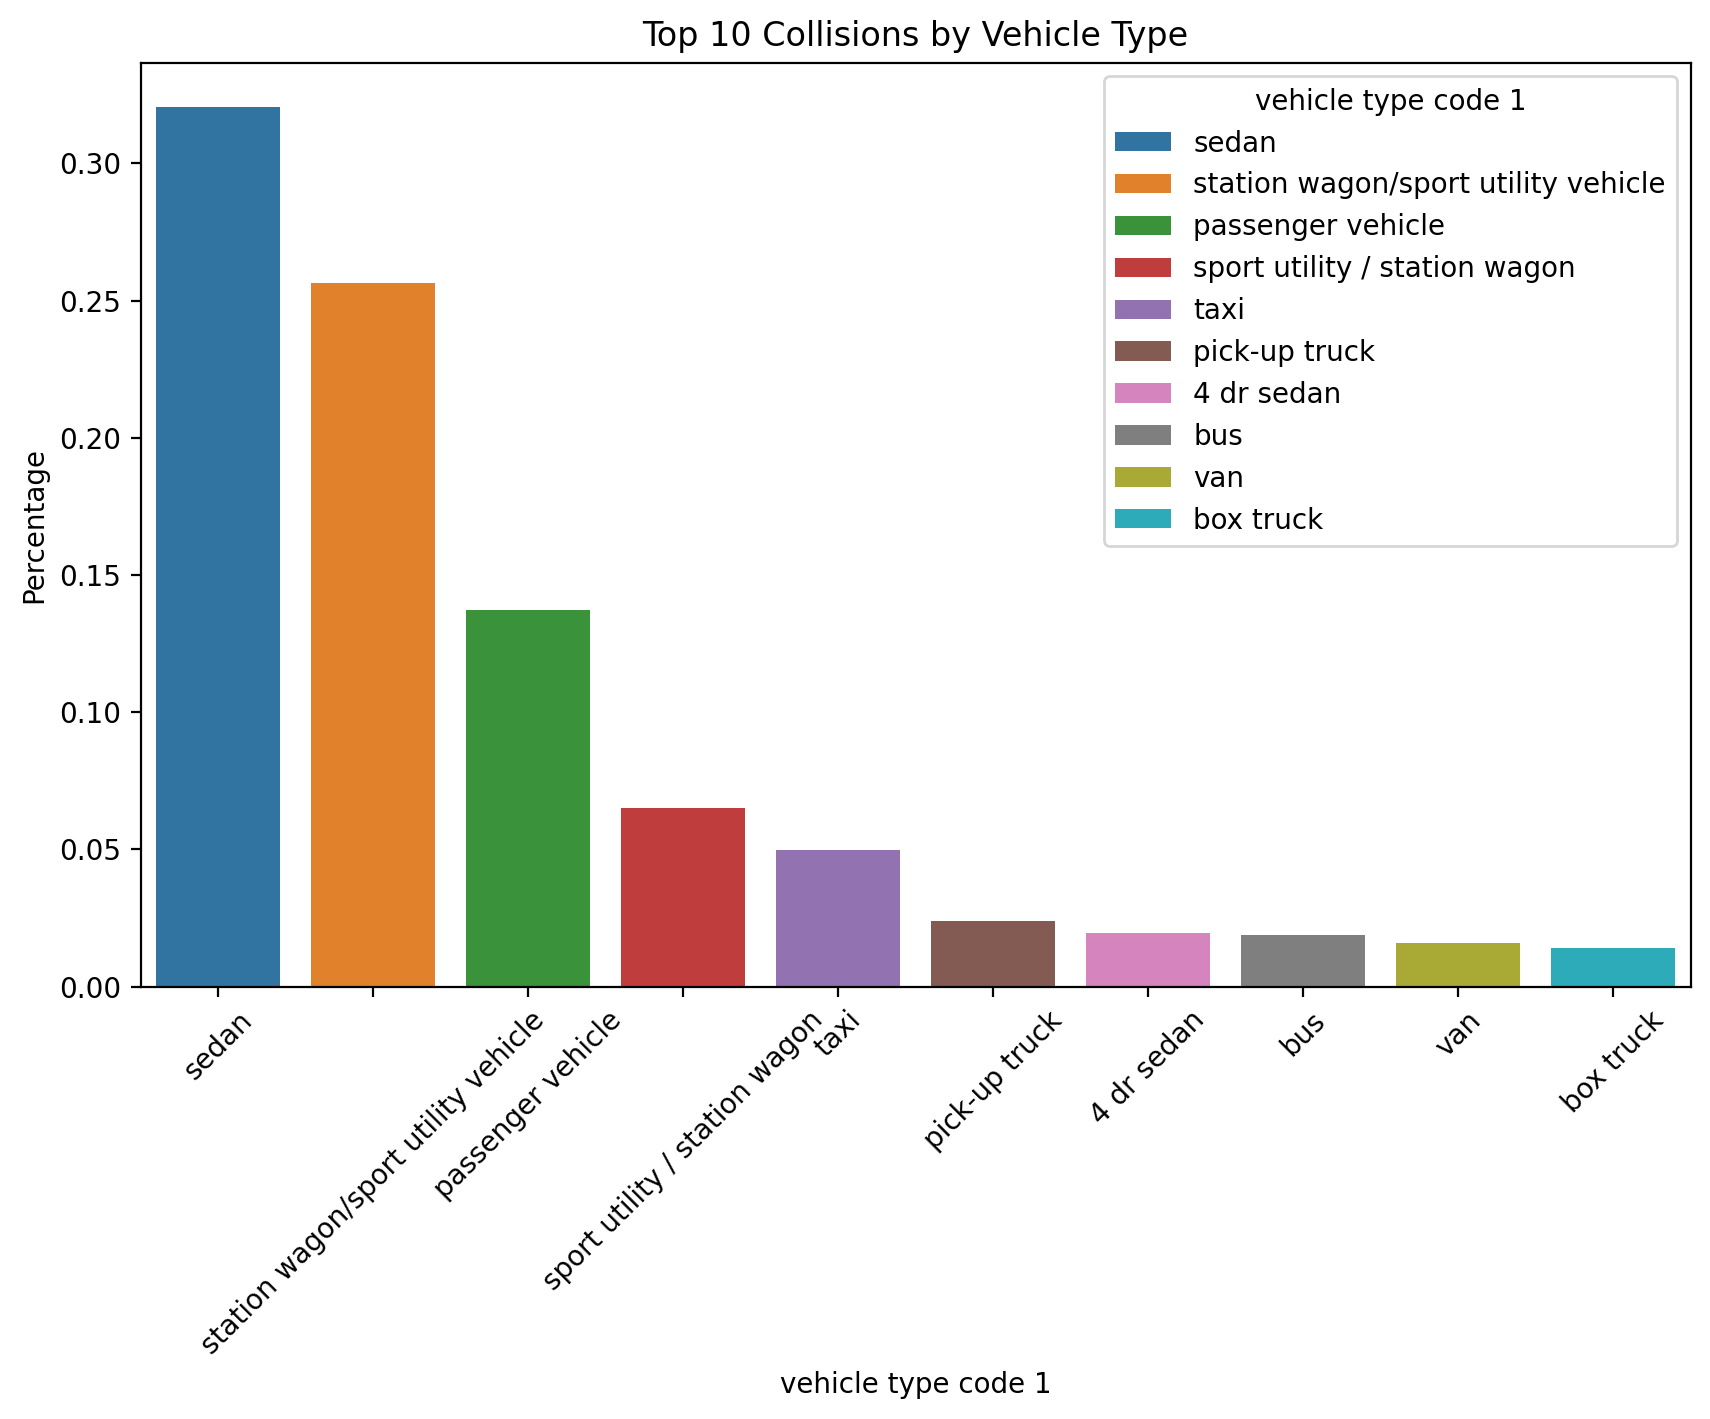

In [37]:
# what are the top 10 vehicle type that contribute most collisions

vehicle_df = df['vehicle type code 1'].value_counts(normalize=True).iloc[:10].reset_index()

plt.figure(figsize=(10,6), dpi=200)
sns.barplot(vehicle_df, x='vehicle type code 1', y='proportion', hue='vehicle type code 1', dodge=False)
plt.title("Top 10 Collisions by Vehicle Type")
plt.ylabel("Percentage")
plt.xticks(rotation=45)
plt.show()

- insights:
    - in 715 vehicle type, top 10 contributes 92% collisions
    - most collisions contributed by small vehicle or passenger vehicle
    - the description like 'sedan' and '4 dr sedan', or 'station wagon/sport utility vehicle' and 'sport utility / station wagon' should be the same type, suggestiong further cleanning to reduce the number of description

In [38]:
# looking at the vehicle type with the lowest frequency (lowest 20)
# insight: most descriptions are uninformative
df['vehicle type code 1'].value_counts(normalize=True).sort_values().iloc[:20]

vehicle type code 1
mvp           0.000001
scl           0.000001
1             0.000001
swepe         0.000001
ps            0.000001
maxim         0.000001
mopd          0.000001
rep           0.000001
dsny          0.000001
house         0.000001
g tow         0.000001
access-a-r    0.000001
u-hal         0.000001
vanet         0.000001
nissa         0.000001
tlc p         0.000001
11111         0.000001
bkhoe         0.000001
lmtv          0.000001
2000          0.000001
Name: proportion, dtype: float64

- Insights:
    - vehicle type in low frequncey contains uninformative descriptions like '11111' or 'rep'

In [39]:
# Due to the records of vehicle types are highly vairant and non-standarized, we need to handle the vehicle type
# After inspecting the data, there are lot of naming that only contains 0.000001 of the whole dataset

# a better way is to set a threshold to keep the 
# vehicle types that exceed the pre-set minimum frequency. After several iterations to balance 
# informativeness with data retention, the optimal threshold was determined to be 0.0001, retaining 51 
# distinct values and preserving 99.6% of the original data.

# select on those categoires where proportion is greater than 0.0001 -> change the threshold to get better performance
condition = df['vehicle type code 1'].value_counts(normalize=True) > 0.0001 # this is the threshold that the naming strat make sense
threshold_categories = df['vehicle type code 1'].value_counts(normalize=True)[condition].index.tolist()

# Filter the DataFrame to include only rows where 'vehicle type code 1' is in the threshold categories
df = df[df['vehicle type code 1'].isin(threshold_categories)].reset_index(drop=True)

In [40]:
# inspect the number of unique vehicle type descriptoin retain in the dataset
print(len(df['vehicle type code 1'].unique()))
print('---')
df['vehicle type code 1'].unique()

51
---


array(['sedan', 'station wagon/sport utility vehicle', 'bus', 'van',
       'e-bike', 'taxi', 'ambulance', 'bike', 'e-scooter', 'box truck',
       'pick-up truck', 'tractor truck diesel', 'motorcycle',
       'tow truck / wrecker', 'flat bed', 'moped', 'garbage or refuse',
       'school bus', 'lift boom', 'scooter', 'beverage truck', 'dump',
       'convertible', 'unknown', 'carry all', 'tractor truck gasoline',
       'motorbike', 'fire truck', 'chassis cab', 'flat rack',
       'motorscooter', 'concrete mixer', '3-door', 'pk', '4 dr sedan',
       'tanker', '2 dr sedan', 'limo', 'refrigerated van',
       'armored truck', 'truck', 'fire', 'other', 'bicycle', 'trail',
       'ambul', 'sport utility / station wagon', 'passenger vehicle',
       'livery vehicle', 'small com veh(4 tires)',
       'large com veh(6 or more tires)'], dtype=object)

In [41]:
# drop rows where 'vehicle type code 1' is 'other' or 'unknown'
df = df[~df['vehicle type code 1'].isin(['other', 'unknown'])].reset_index(drop=True)

# Replace specific vehicle types with common labels
df['vehicle type code 1'] = df['vehicle type code 1'].replace(['station wagon/sport utility vehicle', 'sport utility / station wagon'], 'suv')
df['vehicle type code 1'] = df['vehicle type code 1'].replace(['sedan', '4 dr sedan', '2 dr sedan'], 'sedan')
df['vehicle type code 1'] = df['vehicle type code 1'].replace('3-door', 'sedan')

**Next, we classify the vehicle types into 6 classes following the [Federal Highway Administration - Appendix C. VEHICLE TYPES](https://www.fhwa.dot.gov/policyinformation/tmguide/tmg_2013/vehicle-types.cfm).**
- class 1 : motorcycles & bikes (scooters, bikes, moped, 'skateborad')
- class 2 : passenger cars (taxi, suv, sedan, convertible)
- class 3 : ambulence & pick up & van
- class 4 : buses
- class 5 : 6-wheels (box truck, tow truck, or any type of rv)
- class 6 : heavy-duty vehicles : any type of heavy units (trail truck, )

In [42]:
# manually classify vehicle class based on vehicle name
groups = {
    'sedan':'passenger cars',
    'suv':'passenger cars',
    'bus':'buses',
    'van':'ambulence & pick up & van',
    'e-bike':'motorcycles & bikes',
    'taxi':'passenger cars',
    'ambulance':'ambulence & pick up & van',
    'bike':'motorcycles & bikes',
    'e-scooter':'motorcycles & bikes',
    'box truck': '6-wheels',
    'pick-up truck':'ambulence & pick up & van',
    'tractor truck diesel':'heavy-duty vehicles',
    'motorcycle':'motorcycles & bikes',
    'tow truck / wrecker':'6-wheels',
    'flat bed':'6-wheels',
    'moped':'motorcycles & bikes',
    'garbage or refuse':'heavy-duty vehicles',
    'school bus':'buses',
    'lift boom':'heavy-duty vehicles',
    'scooter':'motorcycles & bikes',
    'beverage truck':'6-wheels',
    'dump':'heavy-duty vehicles',
    'convertible':'passenger cars',
    'carry all':'motorcycles & bikes',
    'tractor truck gasoline':'heavy-duty vehicles',
    'motorbike':'motorcycles & bikes',
    'fire truck':'heavy-duty vehicles',
    'chassis cab':'6-wheels',
    'flat rack':'heavy-duty vehicles',
    'motorscooter':'motorcycles & bikes',
    'concrete mixer':'heavy-duty vehicles',
    '3-door':'passenger cars',
    'pk':'ambulence & pick up & van',
    '4 dr sedan':'passenger cars',
    'tanker':'heavy-duty vehicles',
    '2 dr sedan':'passenger cars',
    'limo':'passenger cars',
    'refrigerated van':'ambulence & pick up & van',
    'armored truck':'heavy-duty vehicles',
    'truck':'6-wheels',
    'fire':'6-wheels',
    'bicycle':'motorcycles & bikes',
    'trail':'heavy-duty vehicles',
    'ambul':'ambulence & pick up & van',
    'sport utility / station wagon':'passenger cars',
    'passenger vehicle':'passenger cars',
    'livery vehicle':'passenger cars',
    'small com veh(4 tires)':'motorcycles & bikes',
    'large com veh(6 or more tires)':'6-wheels'
}

In [43]:
# regroupped to a new column 'vehicle class'

df['vehicle class'] = df['vehicle type code 1'].replace(groups)

In [44]:
# distribution of 'vehicle class'
df['vehicle class'].value_counts()

vehicle class
passenger cars               830154
ambulence & pick up & van     43155
motorcycles & bikes           26182
6-wheels                      22361
buses                         18158
heavy-duty vehicles           12295
Name: count, dtype: int64

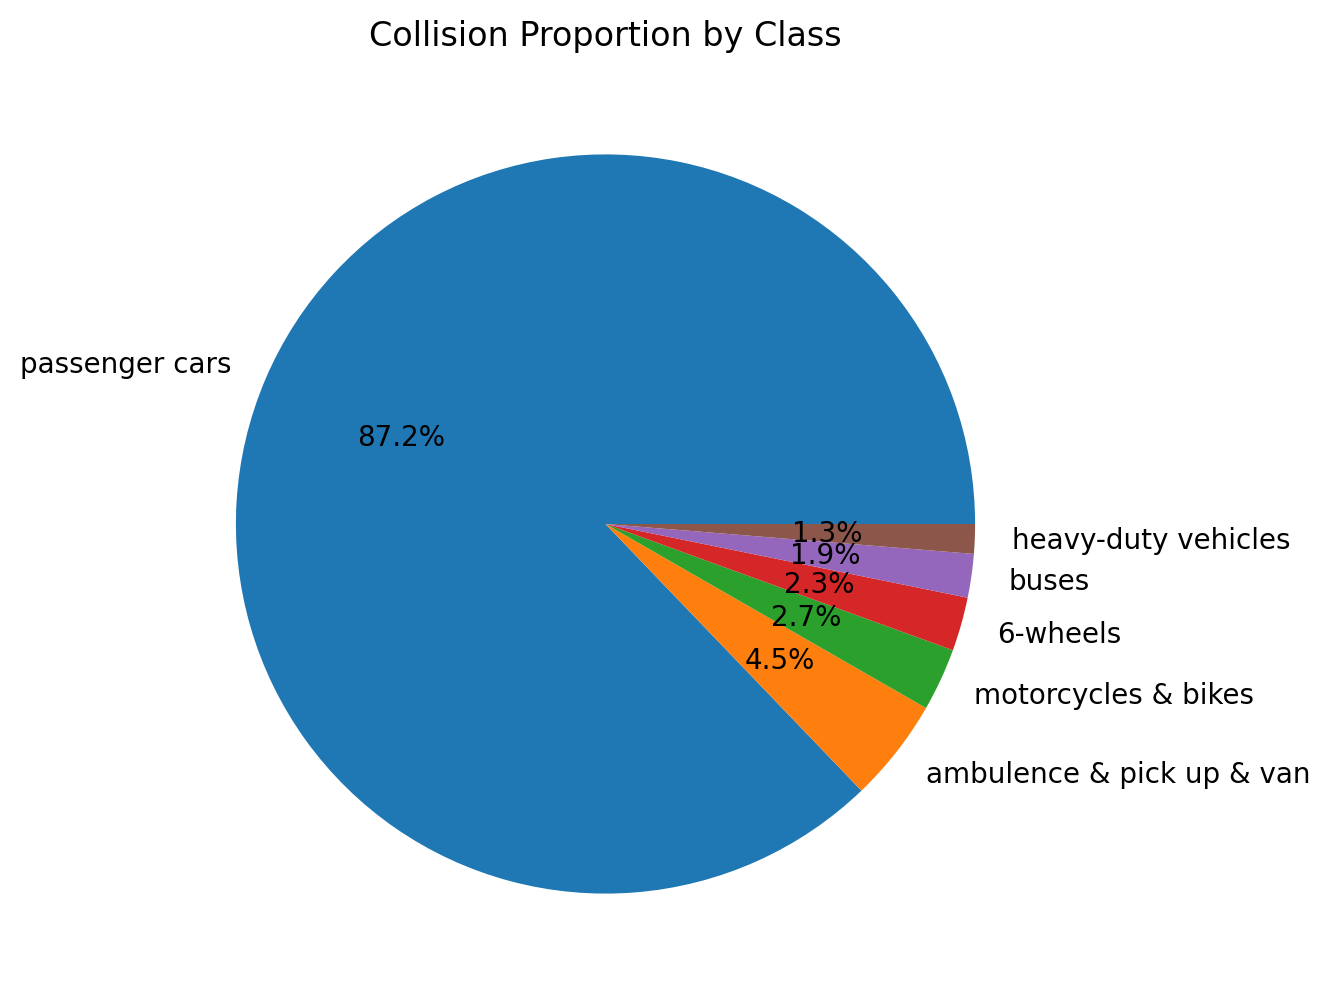

In [45]:
# investigate how much contribution to car accident to each class
result = df['vehicle class'].value_counts(normalize=True)

# pie chart: car accidents proportion
plt.figure(figsize=(10,6), dpi=200)
plt.pie(list(result), labels=list(result.index),autopct='%1.1f%%')
plt.title('Collision Proportion by Class')
plt.show()

## Gathering Common Factor

In [46]:
# now, we analyze the contributing factor
# the distribution of contributing factor
# since contains too many contributing factors, we can shirnk it down by analyze top 10 factors
df['contributing factor vehicle 1'].value_counts(normalize=True)

contributing factor vehicle 1
driver inattention/distraction                           0.303042
failure to yield right-of-way                            0.104673
following too closely                                    0.087367
other vehicular                                          0.047381
backing unsafely                                         0.045270
passing or lane usage improper                           0.043135
turning improperly                                       0.037752
passing too closely                                      0.032834
unsafe lane changing                                     0.032205
traffic control disregarded                              0.031688
fatigued/drowsy                                          0.026042
driver inexperience                                      0.023440
unsafe speed                                             0.021740
alcohol involvement                                      0.015986
lost consciousness                            

In [47]:
# what is the top 10 contributing factors that cause crashes
factor_df = df['contributing factor vehicle 1'].value_counts(normalize=True).iloc[:10].reset_index()

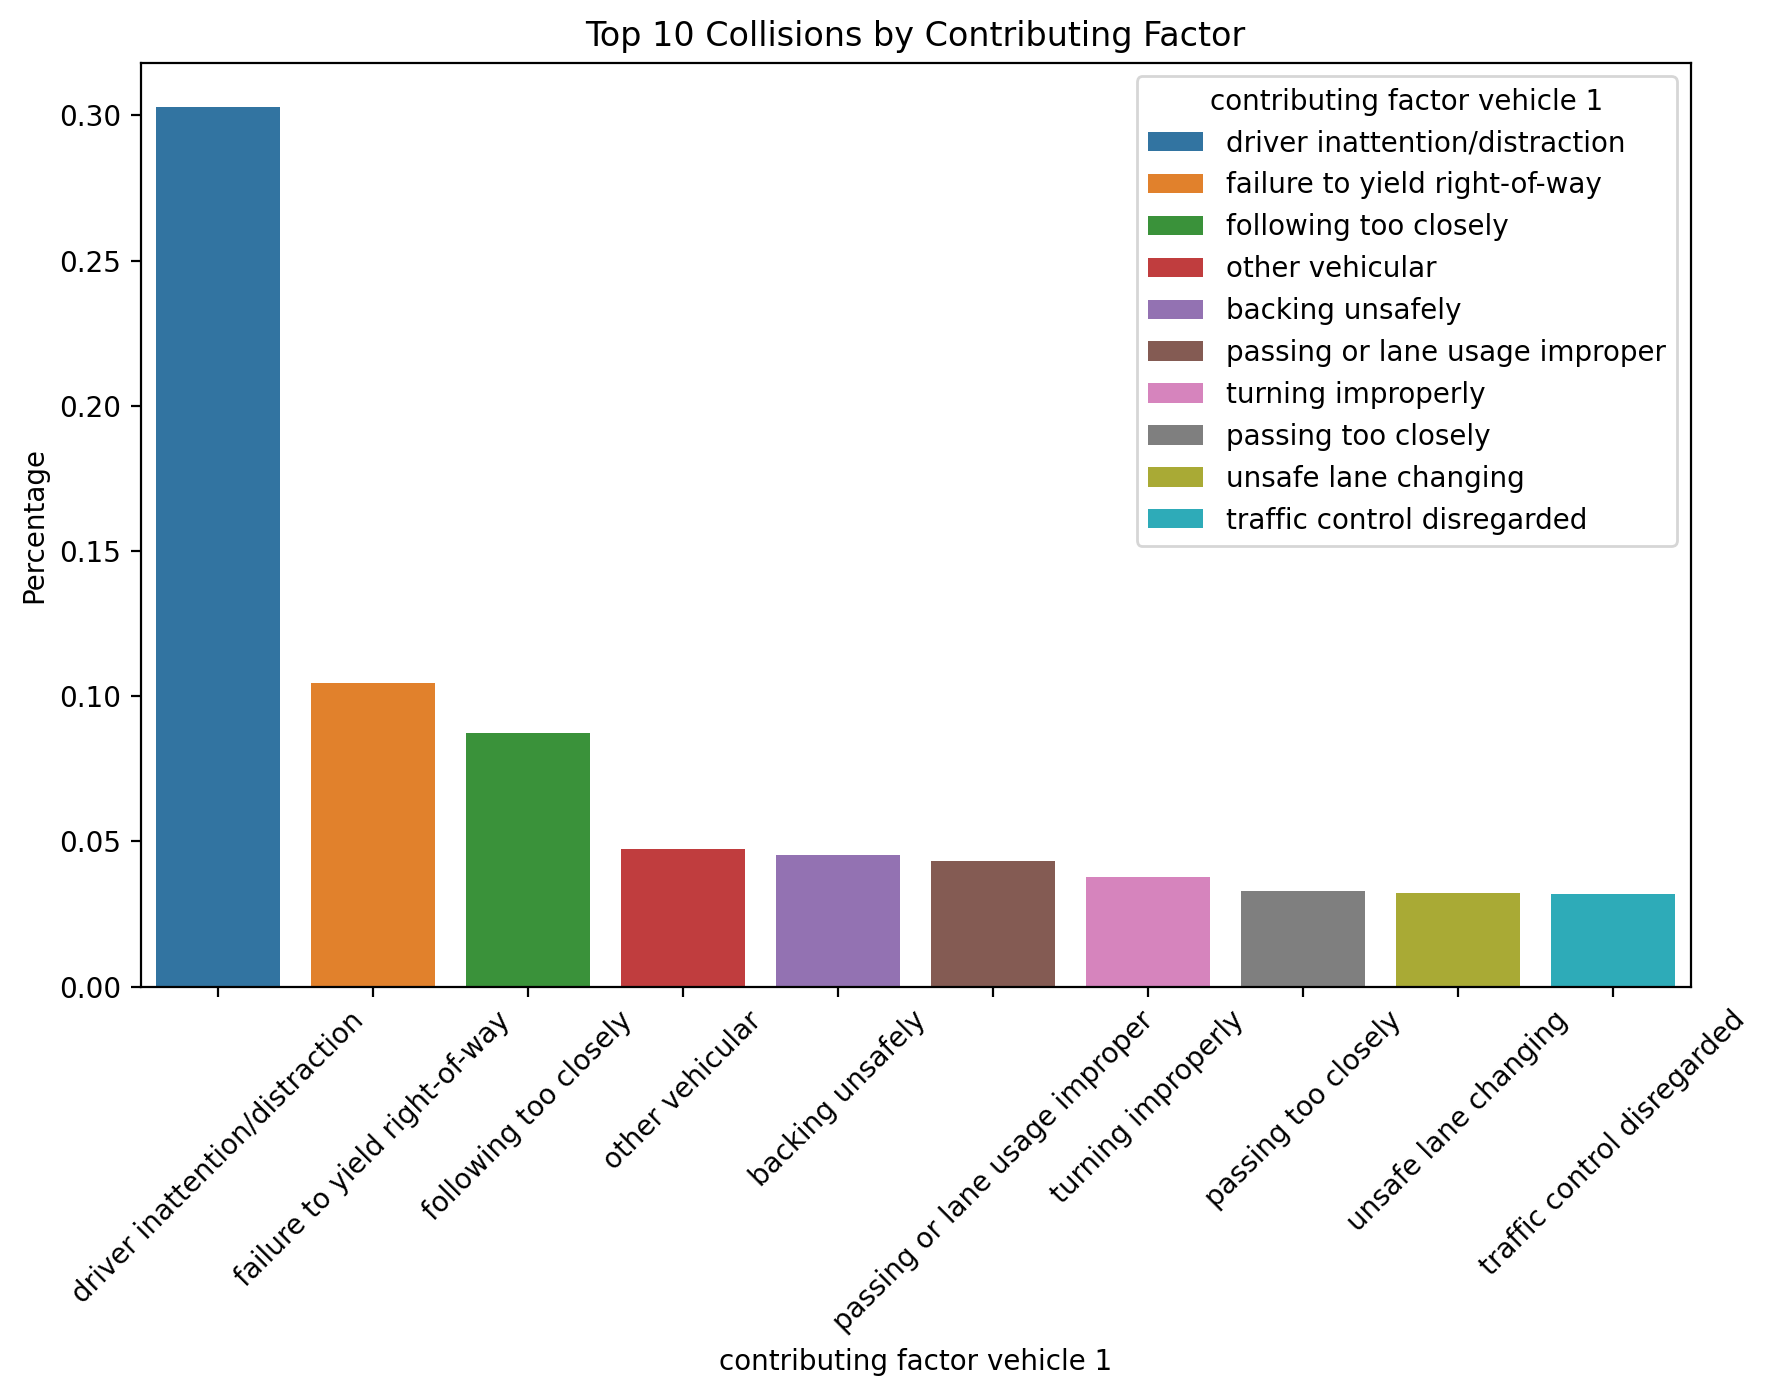

In [48]:
plt.figure(figsize=(10,6), dpi=200)
sns.barplot(factor_df, x='contributing factor vehicle 1', y='proportion', hue='contributing factor vehicle 1', dodge=False)
plt.title("Top 10 Collisions by Contributing Factor")
plt.ylabel("Percentage")
plt.xticks(rotation=45)
plt.show()

- insights:
    - most accidents are contributed by 'driver inattention/distraction', around 30%
- next step:
    - take a granular view of top 10 contributing factor on each classes
    - further reduce the contributing factor by find the intesection of each vehicle class(the comon factor)
        - identify broad issues that impact multiple types of vehicles

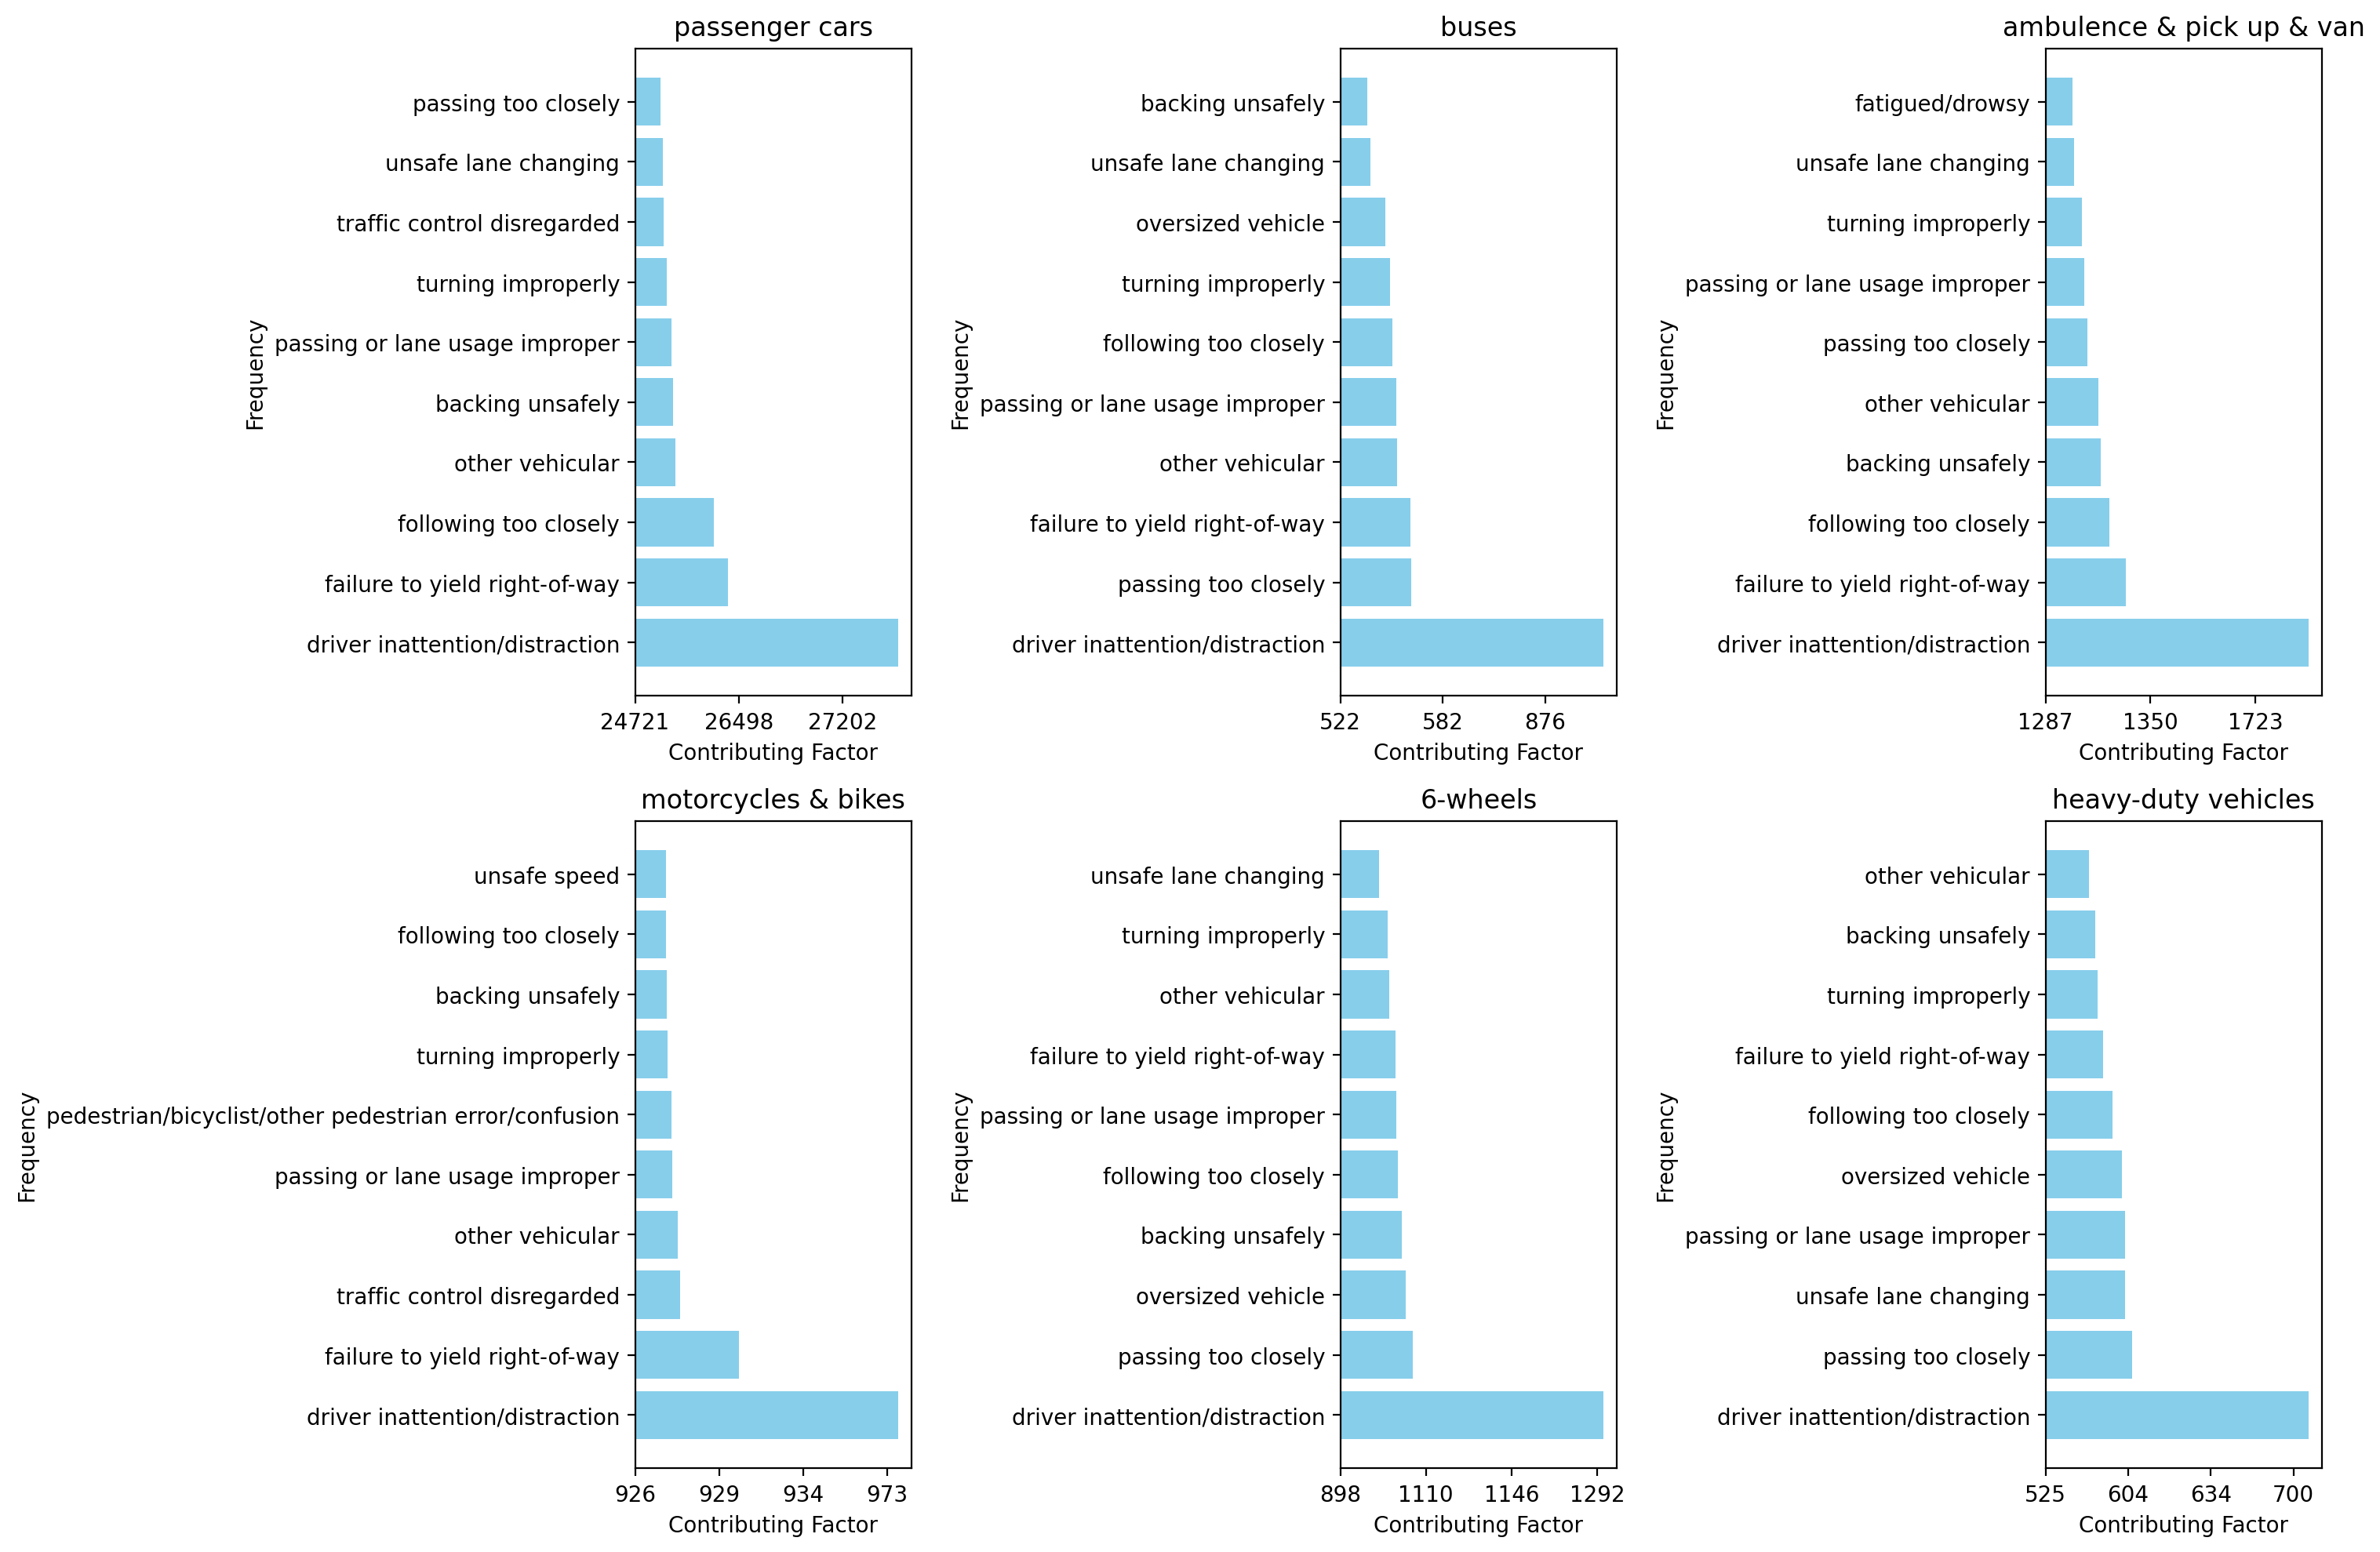

In [49]:
# find the top 10 contributing factor by each vehicle class
# -> identify whethe some contributing factors only belongs to certain class
vehicle_classes = df['vehicle class'].unique()

# Set up the figure for subplots
fig, axs = plt.subplots(2, 3, figsize=(15, 10), dpi=200)  # Adjust figsize as needed
fig.subplots_adjust(hspace=0.5, wspace=0.4)  # Adjust spacing between plots

for i, c in enumerate(vehicle_classes):
    result = df[df['vehicle class'] == c]['contributing factor vehicle 1'].value_counts().head(10)
    ax = axs[i // 3, i % 3]  # Determine the position of the current subplot
    ax.barh(result.index, result.values, color='skyblue')
    ax.set_title(c)
    ax.set_xticklabels(np.sort(result.values))
    ax.set_ylabel('Frequency')
    ax.set_xlabel('Contributing Factor')

# If you have less than 6 vehicle classes, you might want to hide any unused subplot axes
if len(vehicle_classes) < 6:
    for j in range(len(vehicle_classes), 6):
        fig.delaxes(axs.flatten()[j])

plt.tight_layout()
plt.show()

- Insights:
    - indeed, there are some factors that only prevelant in certain vehicle class

In [50]:
# get the all vehicles classes from dataframe
vehicle_classes = df['vehicle class'].unique()

# initialize common factor
common_factor = None

for c in vehicle_classes:
    # get top 10 contributing factors for the class
    factor_set = set(df[df['vehicle class'] == c]['contributing factor vehicle 1'].value_counts().iloc[:10].index)
    
    if common_factor is None:
        common_factor = factor_set
    else:
        common_factor = common_factor.intersection(factor_set)

common_factor   

{'backing unsafely',
 'driver inattention/distraction',
 'failure to yield right-of-way',
 'following too closely',
 'other vehicular',
 'passing or lane usage improper',
 'turning improperly'}

In [51]:
# filter out the data that are not common factor
df_filtered = df[df['contributing factor vehicle 1'].isin(common_factor)]

In [52]:
df_filtered = df_filtered.reset_index().drop('index', axis=1)

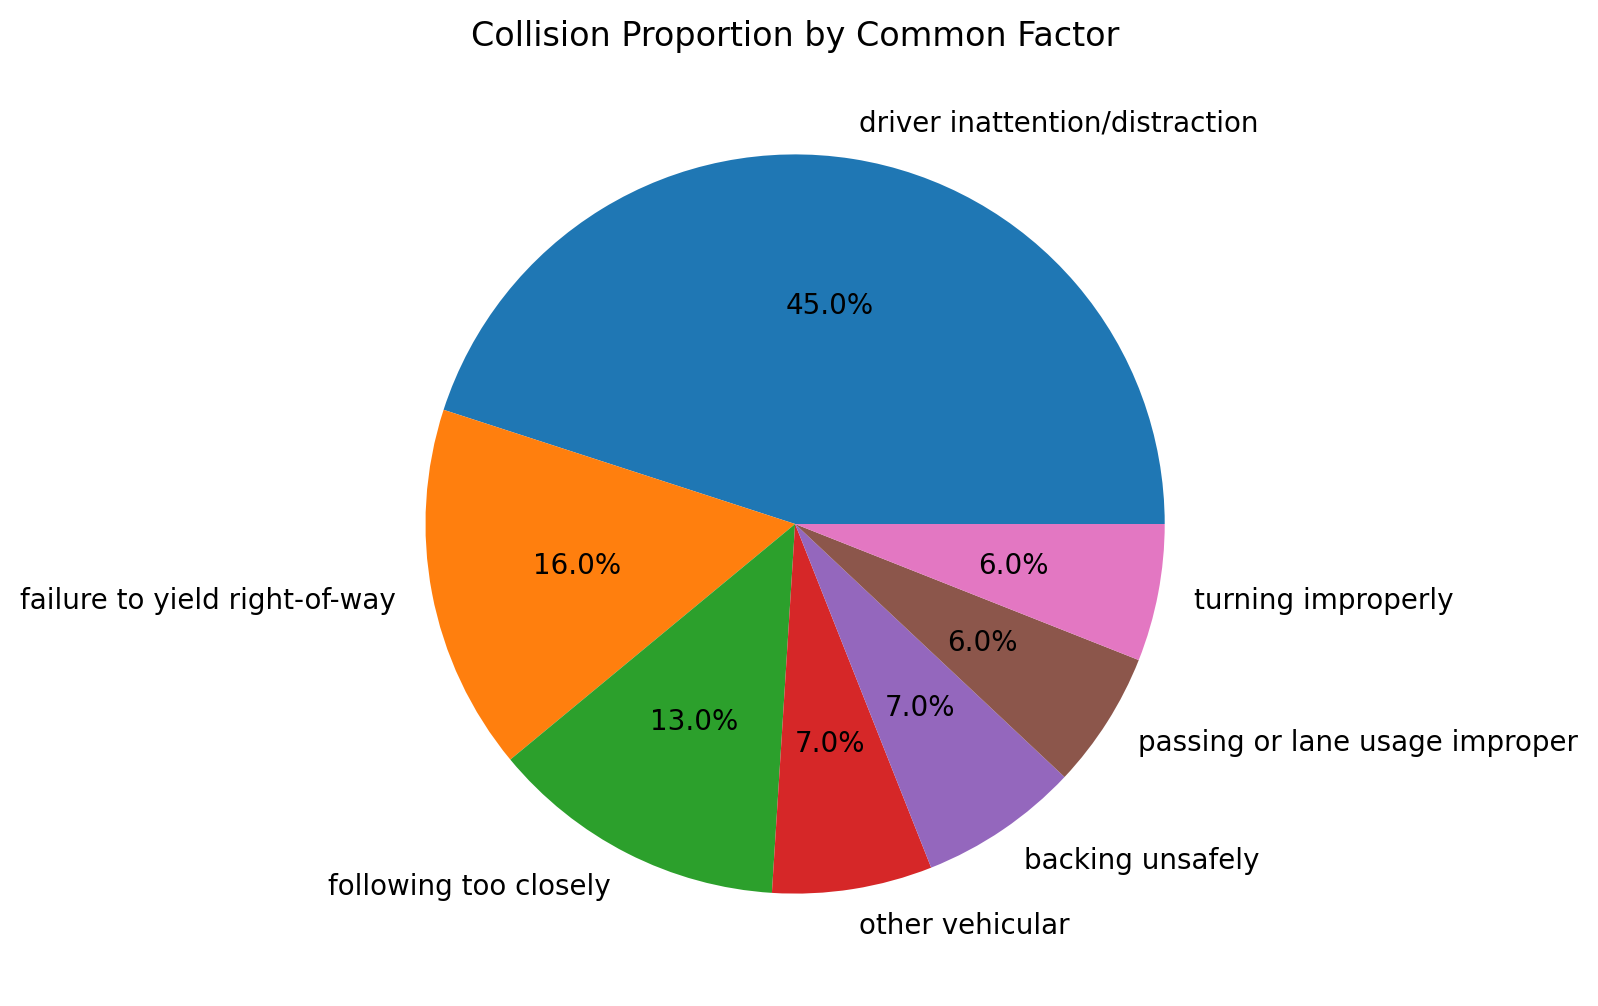

In [53]:
result = round(df_filtered['contributing factor vehicle 1'].value_counts(normalize=True),2)

# pie chart: car accidents proportion
plt.figure(figsize=(10,6), dpi=200)
plt.pie(list(result), labels=list(result.index),autopct='%1.1f%%')
plt.title('Collision Proportion by Common Factor')
plt.show()

## Regrouping Streets

In [54]:
# distribution on street frequency
street_counts = df_filtered['on street name'].value_counts()

street_counts.describe()

count    7000.000000
mean       90.961429
std       370.735432
min         1.000000
25%         2.000000
50%         7.000000
75%        46.000000
max      9568.000000
Name: count, dtype: float64

- Insights:
    - **Skewed Distribution**:mean being significantly higher than the median (90.96 vs. 7)
    - **Variability**: large standard deviation (370.74)
    - **Outliers**: need to handle outlier in low frequency
- Action:
    - regrouping the street name into tier rank (create a new column)

In [55]:
# get the dataframe that group by borough and count the number of car accidents in street
group_sizes = df_filtered[['borough', 'on street name']].groupby(['borough', 'on street name']).agg('size').reset_index(name='count')
group_sizes

borough on street name  count
0             bronx      12 avenue      1
1             bronx     165 street      1
2             bronx     169 street      1
3             bronx     173 street      1
4             bronx     180 street      3
...             ...            ...    ...
8171  staten island   young street      1
8172  staten island   yukon avenue     14
8173  staten island    zebra place      1
8174  staten island     zoe street      3
8175  staten island  zwicky avenue      3

[8176 rows x 3 columns]

In [56]:
# Initialize an empty DataFrame to hold the valid streets for all boroughs
valid_streets_all_boroughs = pd.DataFrame()

# Calculate IQR and threshold for each borough
for borough, group in group_sizes.groupby('borough'):
    iqr_value = group['count'].quantile(0.75) - group['count'].quantile(0.25)
    threshold_count = group['count'].quantile(0.75) + (iqr_value * 1.5)

    # Filter the streets within the borough that have counts above this threshold
    valid_streets = group[group['count'] >= threshold_count]
    valid_streets_all_boroughs = pd.concat([valid_streets_all_boroughs, valid_streets], ignore_index=True)

# valid_streets_all_boroughs

In [57]:
# Now the DataFrame 'valid_streets_all_boroughs' that contains the valid 'on street name' and 'borough' combinations
# To get the original dataframe filtered with these valid streets, do a merge:
df_filtered_by_street = df_filtered.merge(valid_streets_all_boroughs, on=['borough', 'on street name'], how='inner')
df_filtered_by_street = df_filtered_by_street.reset_index().drop(['index','count'],axis=1)

In [58]:
# calculate the count of street names per borough and create a DataFrame
street_counts = df_filtered_by_street.groupby(['borough', 'on street name']).size().reset_index(name='count')

# aggregate these counts at the borough level to get the required statistics
borough_stats = street_counts.groupby('borough')['count'].agg(
    ['mean', 'min', 'max', 'std', lambda x: x.quantile(0.25), 'median', lambda x: x.quantile(0.75)]).rename(columns={'<lambda_0>': '25%', '<lambda_1>': '75%'}).reset_index()

In [59]:
borough_stats

borough        mean  min   max         std     25%  median     75%
0          bronx  404.024390   97  3612  584.338564  126.75   196.5  350.00
1       brooklyn  598.285068  170  6140  773.049466  237.00   360.0  583.00
2      manhattan  776.926471  251  5083  863.605402  323.75   439.5  791.25
3         queens  481.794286  112  7981  817.877957  156.25   227.0  442.00
4  staten island  105.665289   14  3046  271.132326   20.00    34.5   79.50

In [60]:
# create a dictionary to hold the tier cutoffs for each borough
tier_cutoffs = {}

for index, row in borough_stats.iterrows():
    iqr = row['75%'] - row['25%']
    tier_cutoffs[row['borough']] = {
        'tier1': row['75%'] + (1.5 * iqr),
        'tier2': row['75%'],
        'tier3': row['25%'],
    }
    
# merge the counts back into the main dataframe
df_with_counts = df_filtered_by_street.merge(street_counts, on=['borough', 'on street name'])

# define a function to determine the tier based on borough-specific thresholds
def determine_borough_tier(row):
    borough = row['borough']
    count = row['count']
    cutoffs = tier_cutoffs[borough]
    if count > cutoffs['tier1']:
        return 'tier1'
    elif count > cutoffs['tier2']:
        return 'tier2'
    elif count > cutoffs['tier3']:
        return 'tier3'
    else:
        return 'tier4'

 # apply the function to determine tiers
df_with_counts['street tier'] = df_with_counts.apply(determine_borough_tier, axis=1)

# drop the 'count' column
df_with_counts = df_with_counts.drop('count', axis=1)

## Creating Target Feature

In [61]:
# categorieze and label the whether the case is severe or not
def categorize_severity(row):
    if row['number of persons injured'] == 0 and row['number of persons killed'] == 0:
        return 'mild'
    else:
        return 'severe'
df_with_counts['level of severity'] = df_with_counts.apply(categorize_severity, axis=1)

In [62]:
df_filtered = df_with_counts.copy(deep=True)

In [63]:
df_filtered.head()

date  year  month  day  hour  season borough on street name  \
0 2021-12-13 00:34:00  2021     12   13     0  Winter  queens  myrtle avenue   
1 2021-04-14 11:46:00  2021      4   14    11  Spring  queens  myrtle avenue   
2 2021-04-16 08:42:00  2021      4   16     8  Spring  queens  myrtle avenue   
3 2021-12-15 08:30:00  2021     12   15     8  Winter  queens  myrtle avenue   
4 2021-12-14 12:15:00  2021     12   14    12  Winter  queens  myrtle avenue   

   number of persons injured  number of persons killed  \
0                        0.0                       0.0   
1                        1.0                       0.0   
2                        1.0                       0.0   
3                        0.0                       0.0   
4                        1.0                       0.0   

    contributing factor vehicle 1 vehicle type code 1        vehicle class  \
0  passing or lane usage improper                 suv       passenger cars   
1  driver inattention/distraction                bike  motorcycles & bikes   
2  driver inattention/distraction               sedan       passenger cars   
3              turning improperly                 suv       passenger cars   
4   failure to yield right-of-way               sedan       passenger cars   

  street tier level of severity  
0       tier2              mild  
1       tier2            severe  
2       tier2            severe  
3       tier2              mild  
4       tier2            severe

## Data Visualization

In [64]:
def plot_bar(df, field):
    # which borough is most dangerous?
    x = list(df[field].value_counts().index)
    y = list(df[field].value_counts().values)
    
    most_accidents = df[field].value_counts().iloc[:1]
    
    fig, ax = plt.subplots(figsize=(10,6),dpi=200)
    
    ax.bar(x, y)
    highest_borough = most_accidents.index[0]
    highest_value = most_accidents.values[0]
    ax.text(highest_borough, highest_value + 5000, f'Higest Number: {highest_value}', ha='center', color='black')
    ax.scatter(list(most_accidents.index), list(most_accidents.values),color='red')
    
    ax.set_title(f'Number of Collisions by {field.title()}')
    ax.set_ylabel('Number of Collisions')
    ax.set_xlabel(f'{field.title()}')
    # ax.legend(title='Fruit color')
    plt.tight_layout()
    
    plt.show()

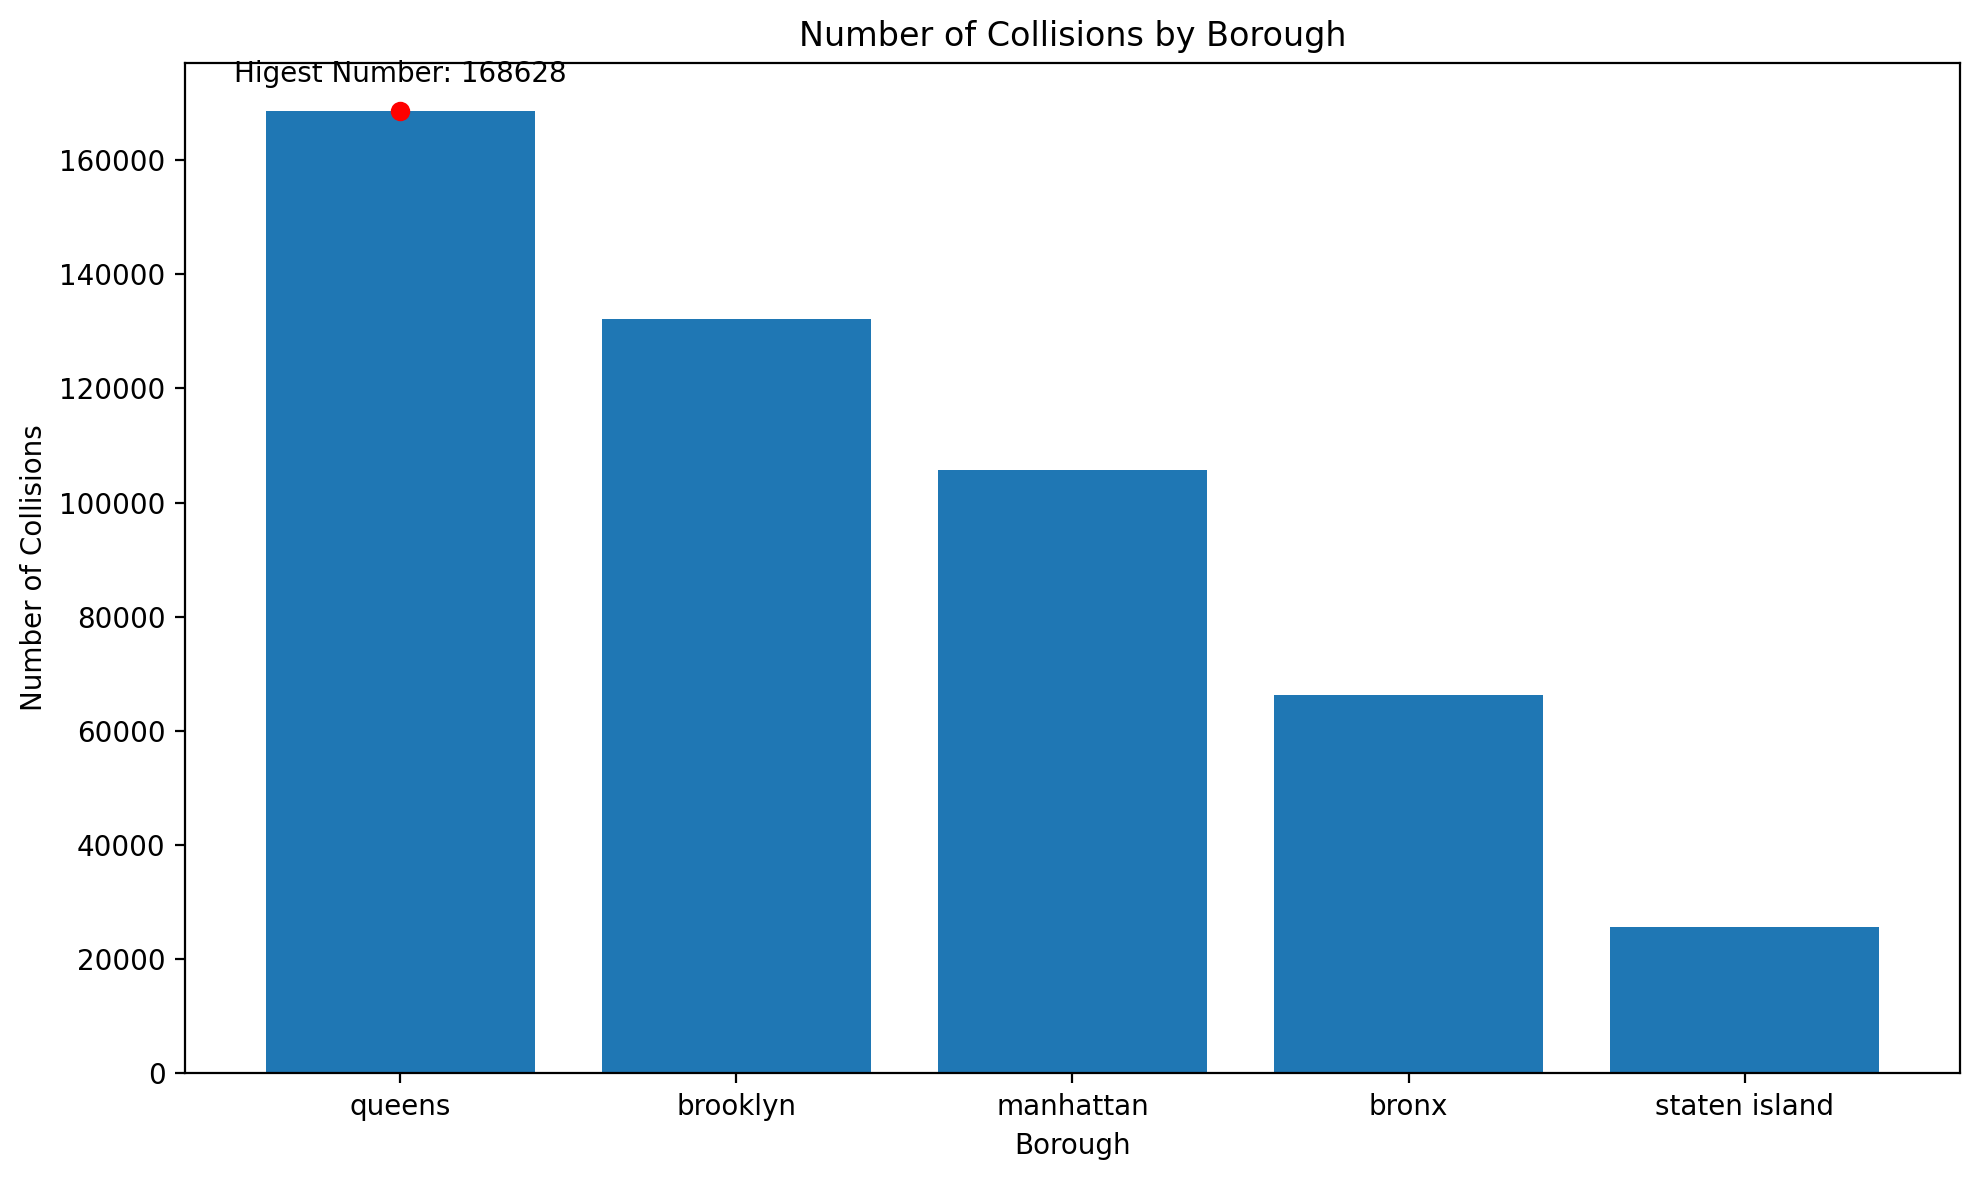

In [65]:
# what is the distibution of collisions by Borough?
plot_bar(df_filtered,'borough')

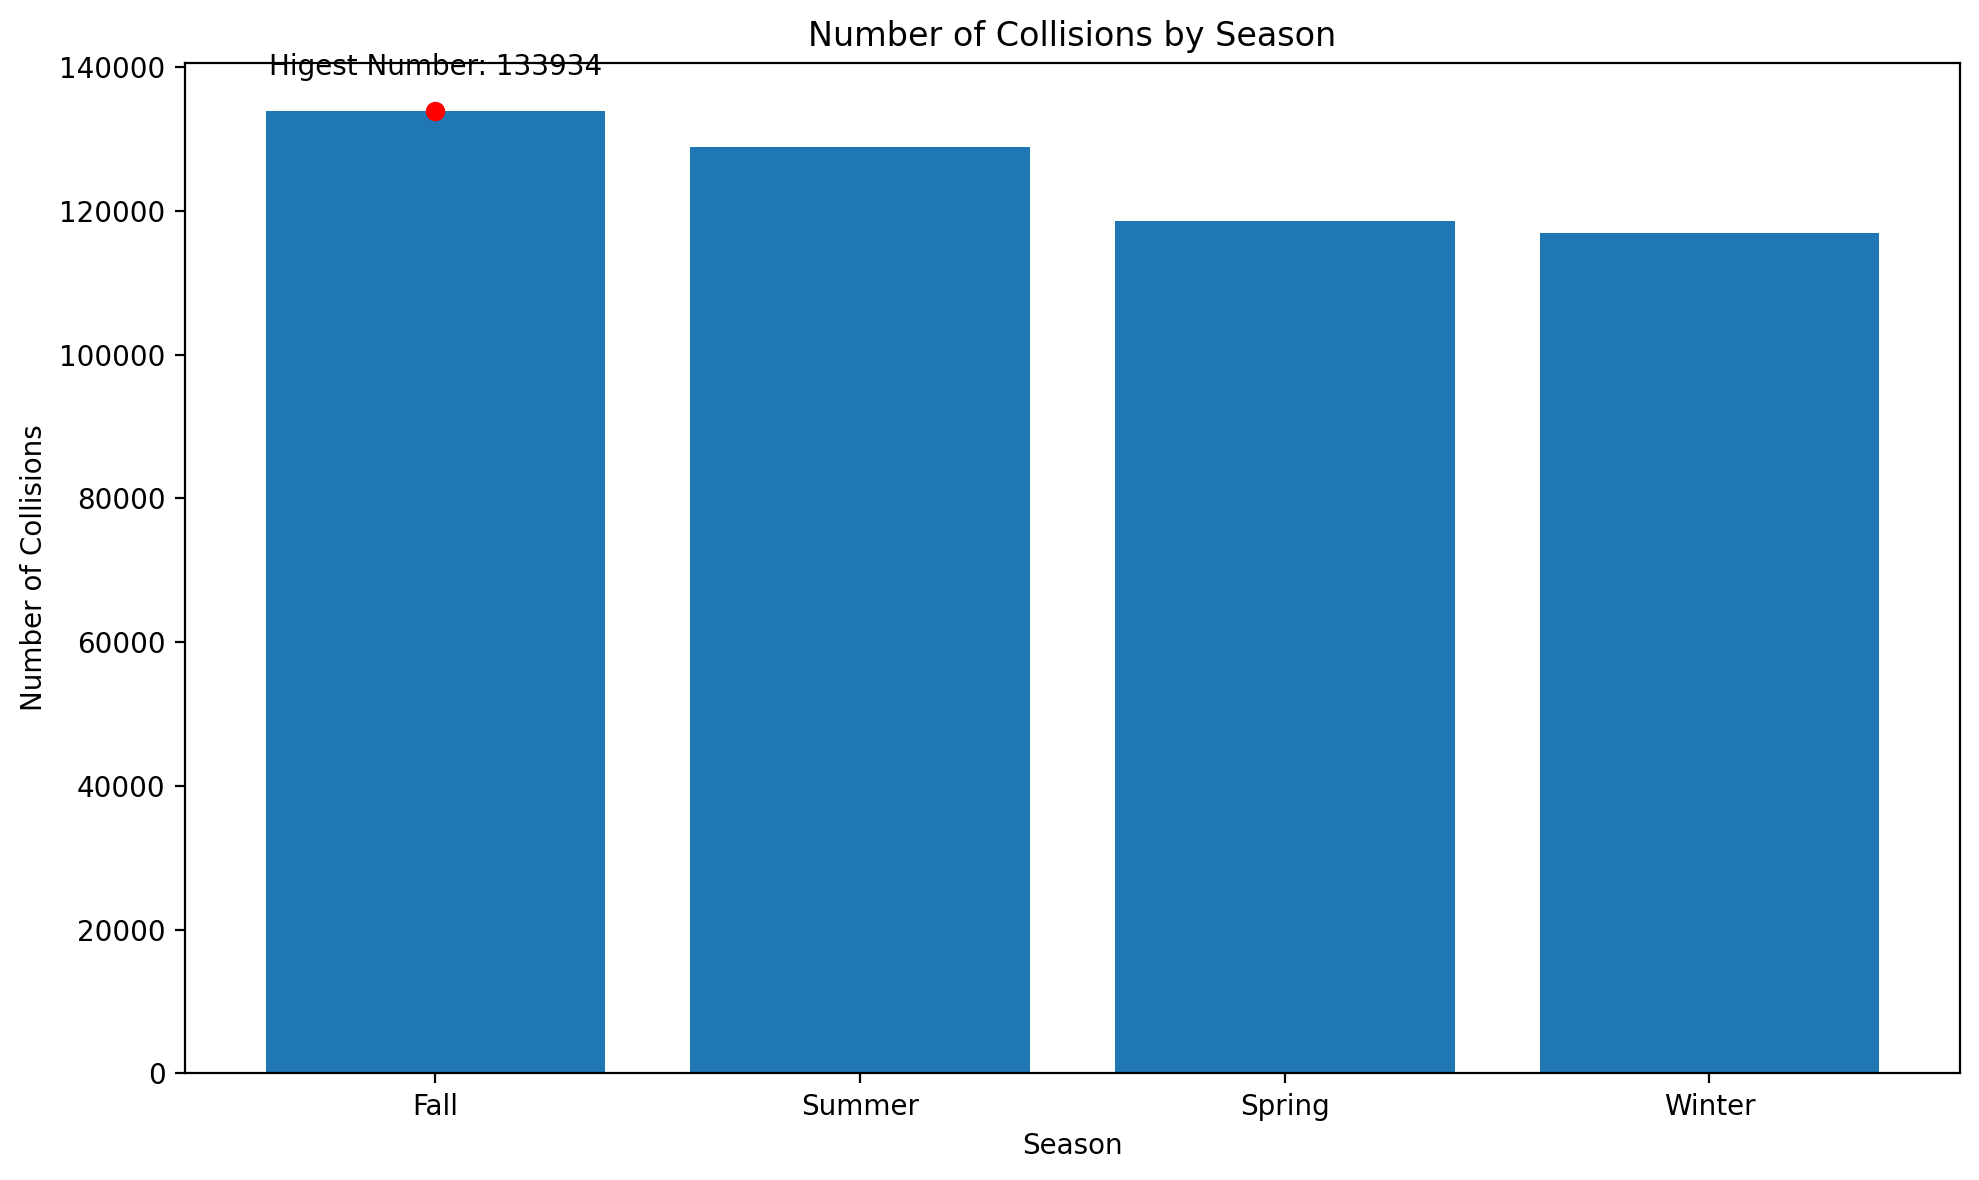

In [66]:
# what season does the most car crashes occur
plot_bar(df_filtered,'season')

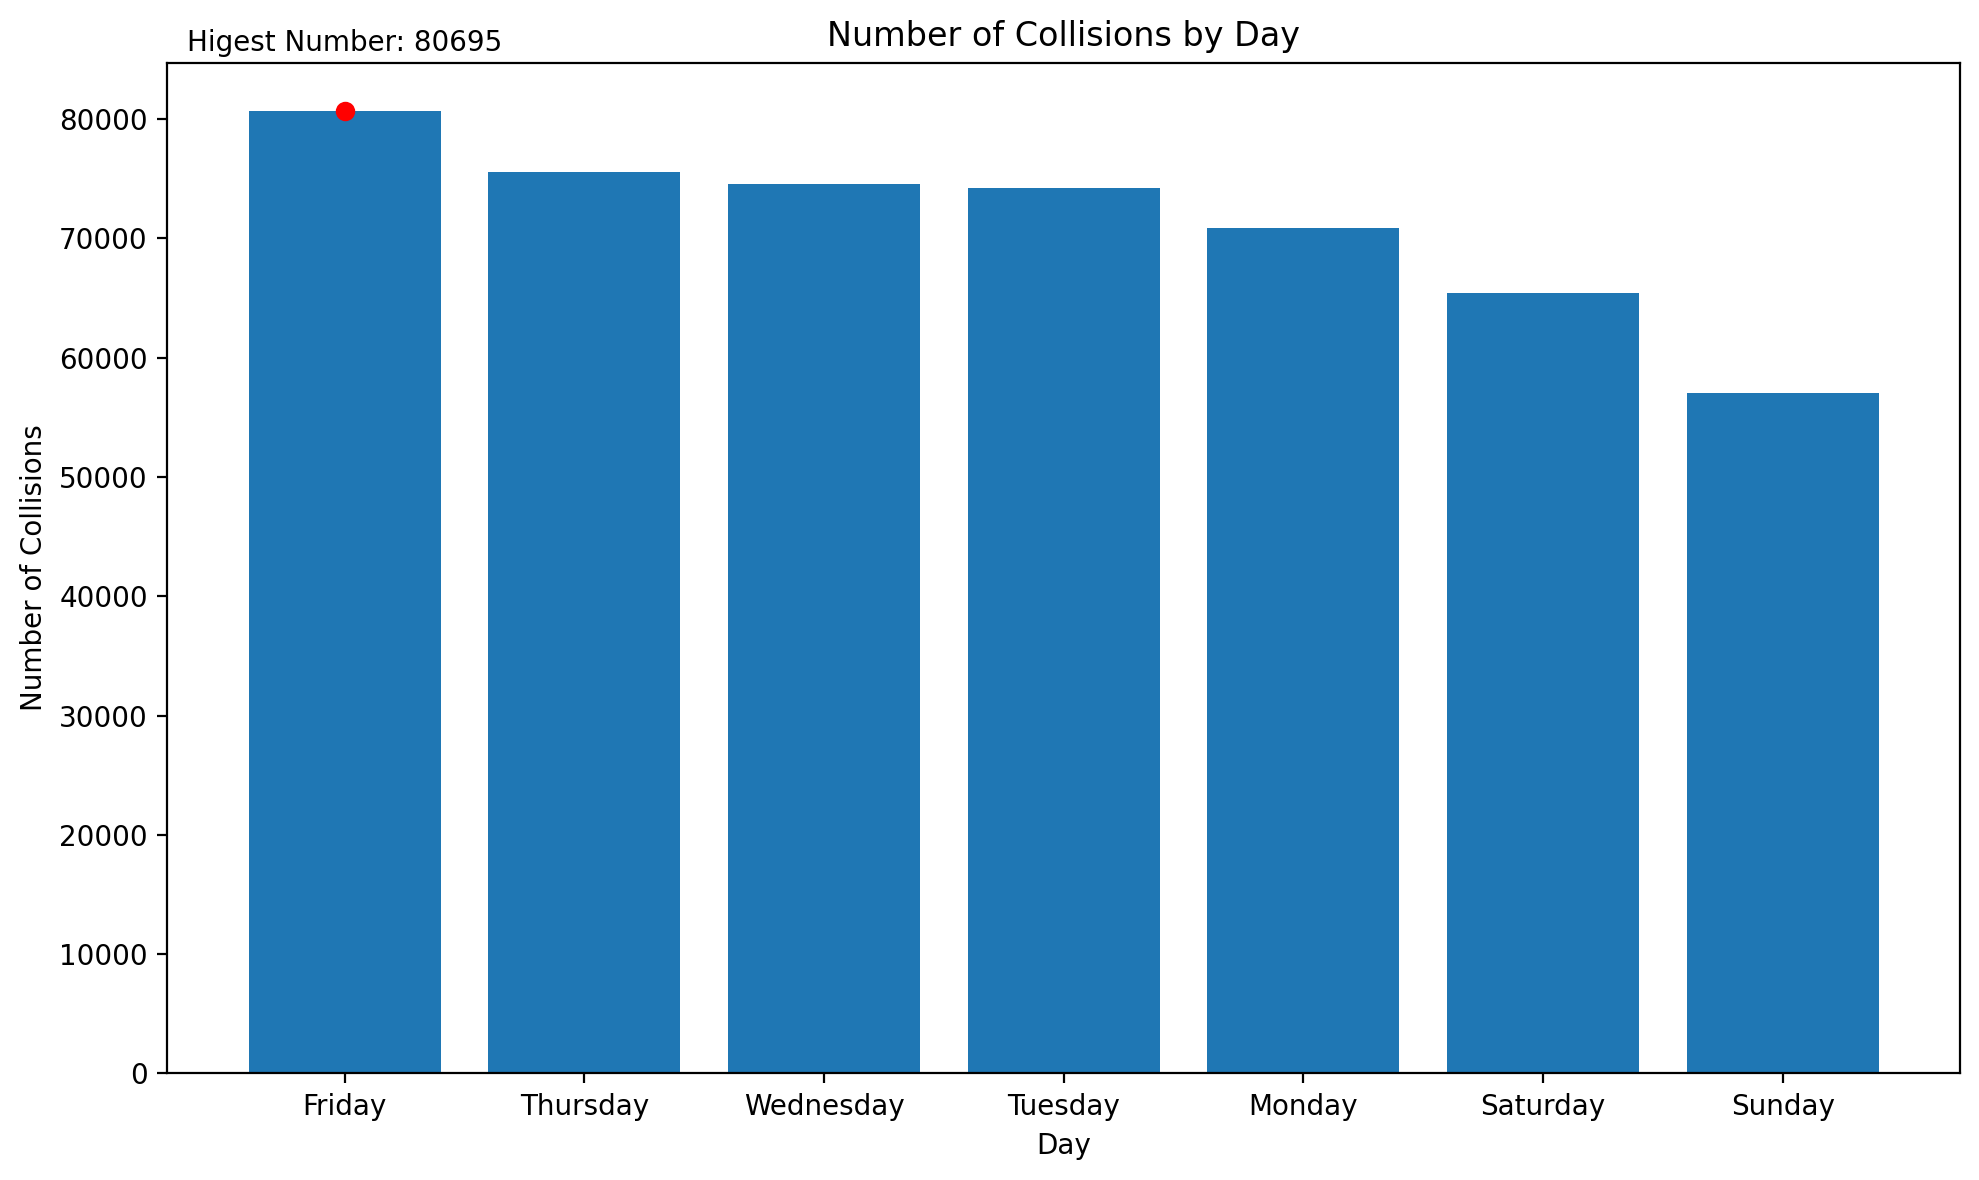

In [67]:
# what day contains does most car crashes occur
df_filtered1=df_filtered.copy(deep=True)
df_filtered1['day'] = df_filtered1['date'].dt.day_name()
plot_bar(df_filtered1,'day')

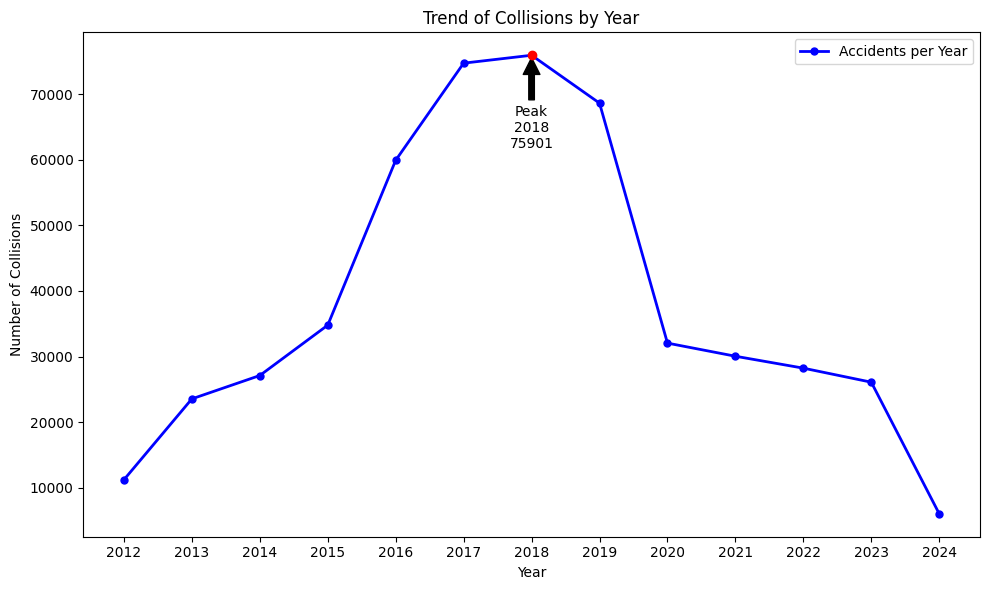

In [68]:
# the trend of accident by years, is there any peak for certain year?
x = list(df_filtered['year'].value_counts().sort_index().index)
y = list(df_filtered['year'].value_counts().sort_index().values)

plt.figure(figsize=(10,6))
plt.plot(x, y, 'b.-', lw=2, ms=10, label='Accidents per Year')

# Identify the peak
peak_year = x[y.index(max(y))]
peak_num = y[y.index(max(y))]
peak_accidents = max(y)

# Highlight the peak
plt.scatter(peak_year, peak_accidents, color='red', zorder=5)

# Annotate the peak
plt.annotate(f'Peak\n{peak_year}\n{peak_num}', xy=(peak_year, peak_accidents), xytext=(peak_year, peak_accidents - 0.1 * max(y)),
             arrowprops=dict(facecolor='black', shrink=0.05), ha='center', va='top')


plt.title('Trend of Collisions by Year')
plt.xlabel('Year')
plt.ylabel('Number of Collisions')

plt.xticks(x)
plt.legend()

plt.tight_layout()

plt.show()

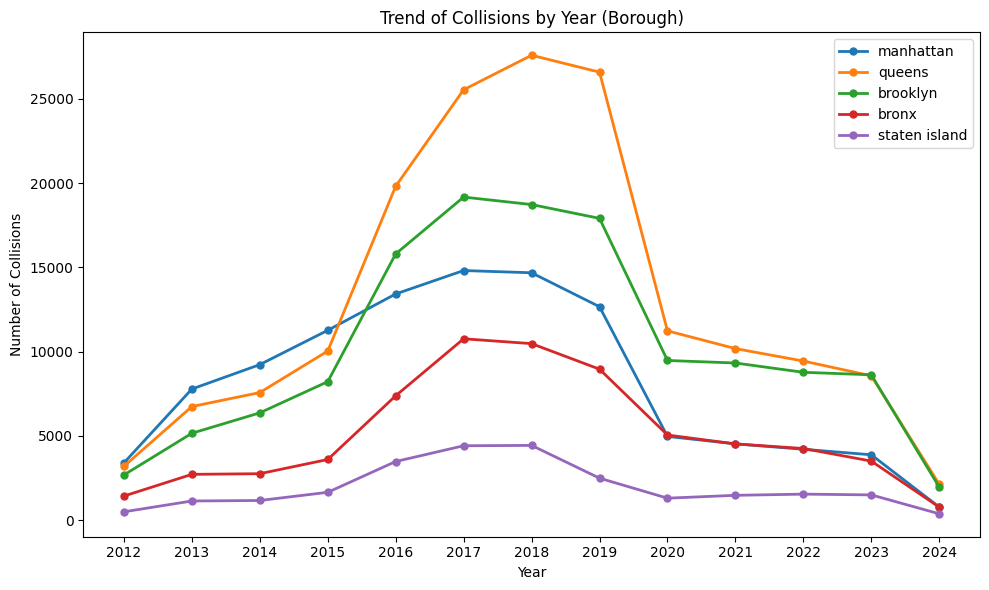

In [69]:
# the trend of accident by years, is there any peak for certain year in a borough view?
x = list(df_filtered['year'].value_counts().sort_index().index)
y1 = list(df_filtered[df_filtered['borough']=='manhattan']['year'].value_counts().sort_index().values)
y2 = list(df_filtered[df_filtered['borough']=='queens']['year'].value_counts().sort_index().values)
y3 = list(df_filtered[df_filtered['borough']=='brooklyn']['year'].value_counts().sort_index().values)
y4 = list(df_filtered[df_filtered['borough']=='bronx']['year'].value_counts().sort_index().values)
y5 = list(df_filtered[df_filtered['borough']=='staten island']['year'].value_counts().sort_index().values)

plt.figure(figsize=(10,6))
plt.plot(x, y1, '.-', lw=2, ms=10, label='manhattan')
plt.plot(x, y2, '.-', lw=2, ms=10, label='queens')
plt.plot(x, y3, '.-', lw=2, ms=10, label='brooklyn')
plt.plot(x, y4, '.-', lw=2, ms=10, label='bronx')
plt.plot(x, y5, '.-', lw=2, ms=10, label='staten island')

plt.title('Trend of Collisions by Year (Borough)')
plt.xlabel('Year')
plt.ylabel('Number of Collisions')

plt.xticks(x)
plt.legend()

plt.tight_layout()

plt.show()

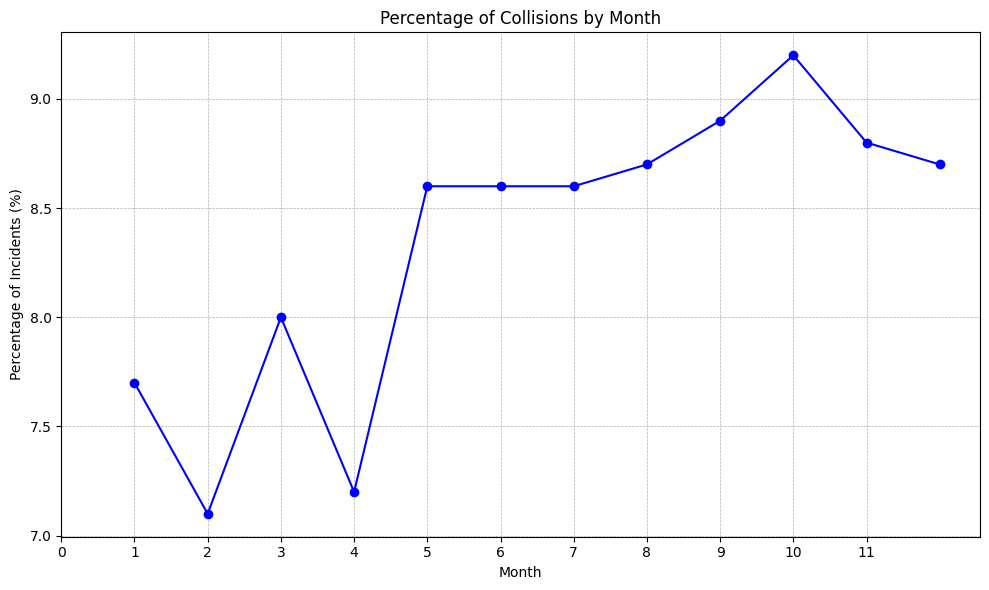

'finding: crashes tend to gather around the second half of the year'

In [70]:
# whether incidents are more likely to happen at certain month

# calculate the normalized number of incidents by month, sorted by hour, and multiplied by 100 to convert to percentage
monthly_distribution = round(df_filtered['month'].value_counts(normalize=True).sort_index(),3) * 100

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(monthly_distribution.index, monthly_distribution.values, marker='o', linestyle='-', color='blue')
plt.title('Percentage of Collisions by Month')
plt.xlabel('Month')
plt.ylabel('Percentage of Incidents (%)')
plt.xticks(range(0, 12))
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()

plt.show()

'''finding: crashes tend to gather around the second half of the year'''

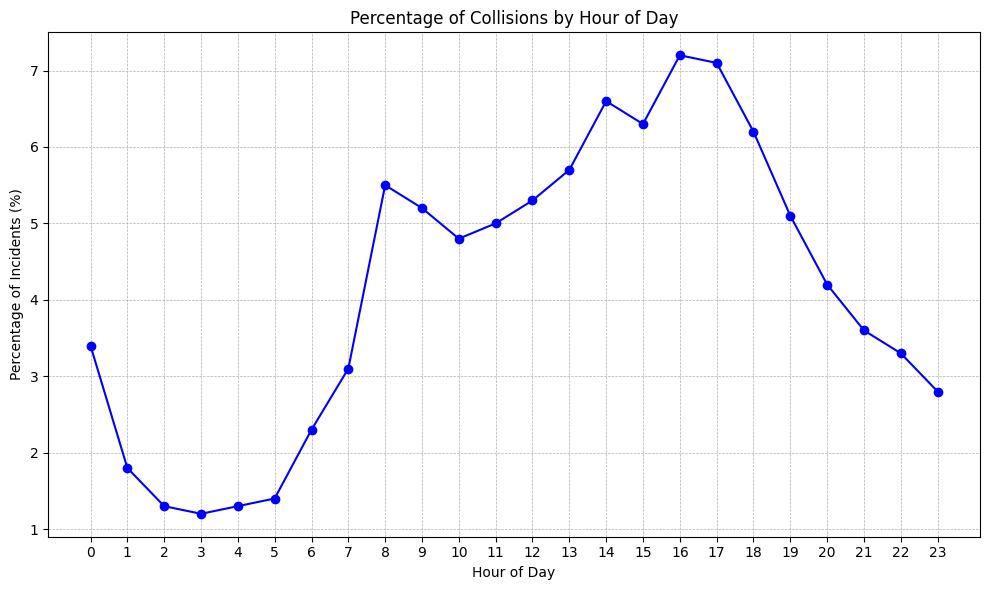

'findings: crashes tend to gather in the afternoon'

In [71]:
# whether incidents are more likely to happen at certain times of the day
# calculate the normalized number of incidents by hour, sorted by hour, and multiplied by 100 to convert to percentage
hourly_distribution = round(df['hour'].value_counts(normalize=True).sort_index(), 3) * 100

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(hourly_distribution.index, hourly_distribution.values, marker='o', linestyle='-', color='blue')
plt.title('Percentage of Collisions by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Percentage of Incidents (%)')
plt.xticks(range(0, 24))  # Ensure all hours are shown
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()

plt.show()
'''findings: crashes tend to gather in the afternoon'''

In [72]:
def plot_subplot(df, field, str1):
    # sort data for injuries and deaths
    df_injuries_sorted = df[[field, 'number of persons injured']].groupby(field).agg('sum').sort_values(by='number of persons injured', ascending=False)     
    df_deaths_sorted = df[[field, 'number of persons killed']].groupby(field).agg('sum').sort_values(by='number of persons killed', ascending=False)     

    fig, axes = plt.subplots(2, 1, figsize=(18, 12), dpi=200)

    # plot for injuries
    ax_injuries = sns.barplot(data=df_injuries_sorted.reset_index(), x=field, y='number of persons injured', ax=axes[0], palette="Blues_d")
    axes[0].set_title(f'Number of Injured by {str1}')
    axes[0].set_ylabel('Number of Persons Injured (Sum)')
    axes[0].set_xlabel('')

    # annotations for injuries
    for p in ax_injuries.patches:
        ax_injuries.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                             ha='center', va='bottom', color='black', fontsize=9)
    
    # plot for deaths
    ax_deaths = sns.barplot(data=df_deaths_sorted.reset_index(), x=field, y='number of persons killed', ax=axes[1], palette="Blues_d")
    axes[1].set_title(f'Number of Death by {str1}')
    axes[1].set_ylabel('Number of Persons Killed (Sum)')
    axes[1].set_xlabel(f'{field}')

    # annotations for deaths
    for p in ax_deaths.patches:
        ax_deaths.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                           ha='center', va='bottom', color='black', fontsize=9)

    for ax in axes:
        for label in ax.get_xticklabels():
            label.set_rotation(45)

    plt.tight_layout()
    plt.show()

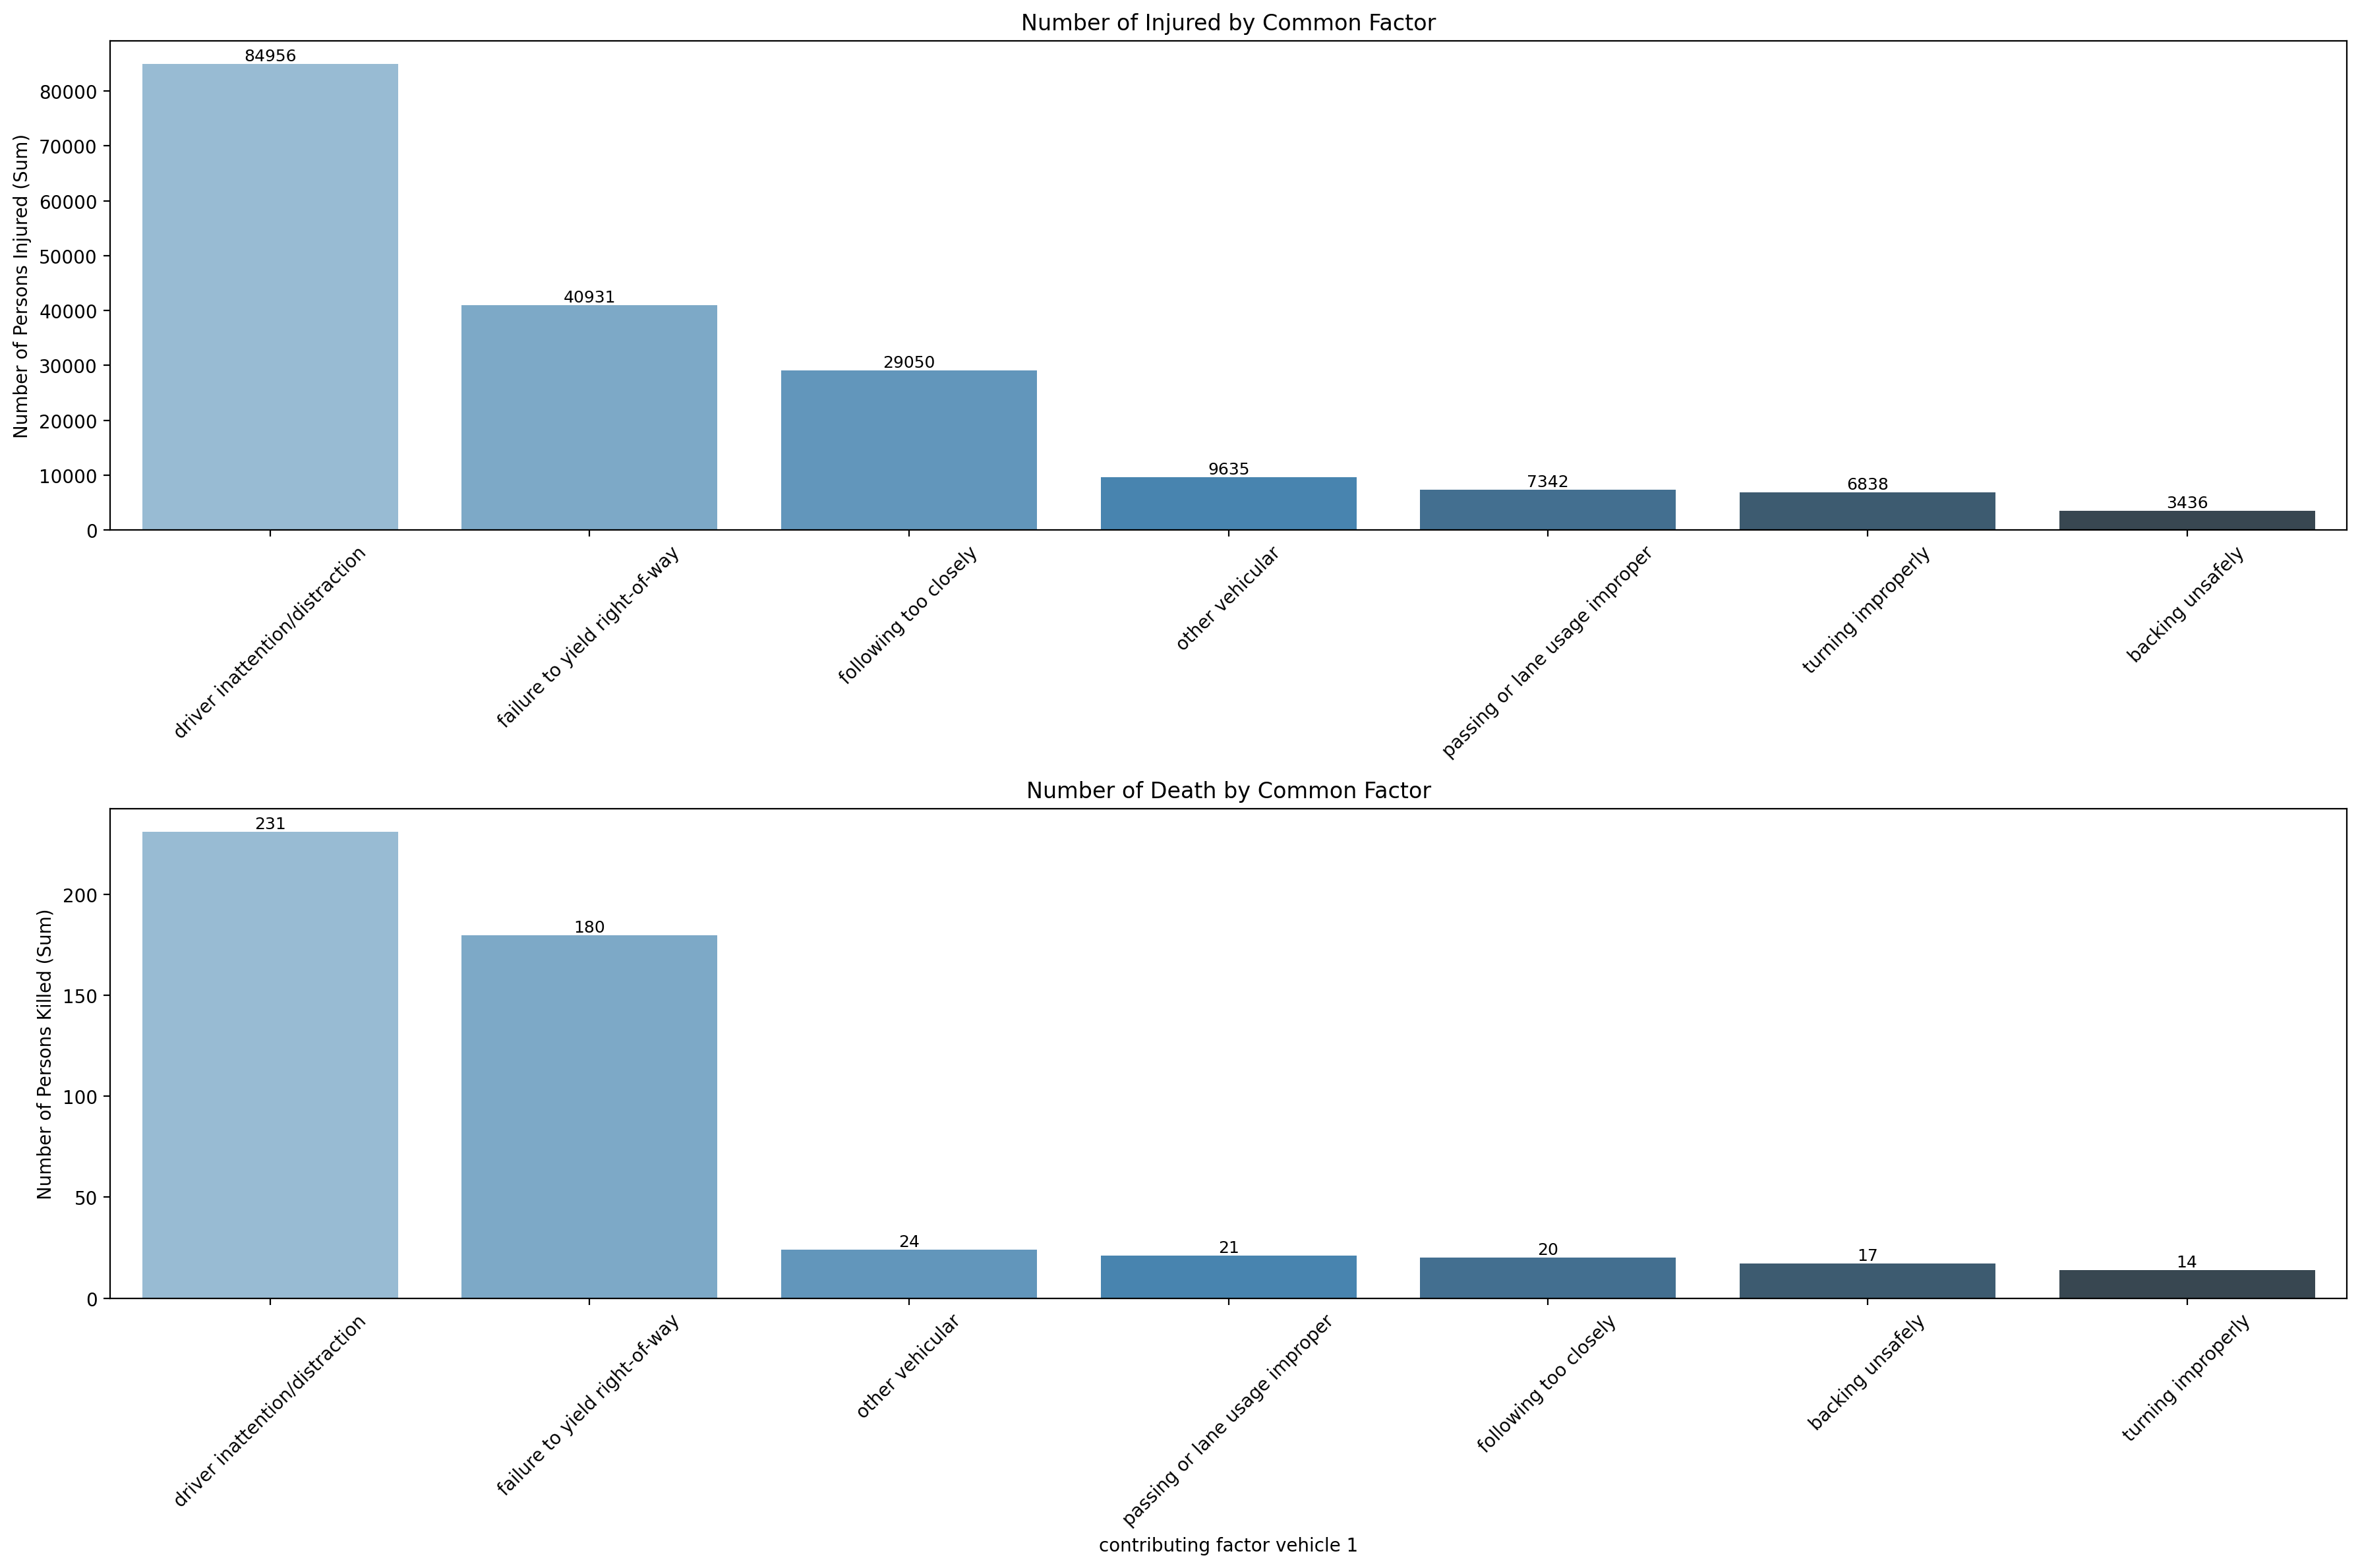

In [73]:
# what is the rank of common factor by injuries and deaths
plot_subplot(df_filtered, 'contributing factor vehicle 1', 'Common Factor')

- Insights:
    - the rank of common factor are different
    - some contributing factors rank lower in injuries rank higher in number of death

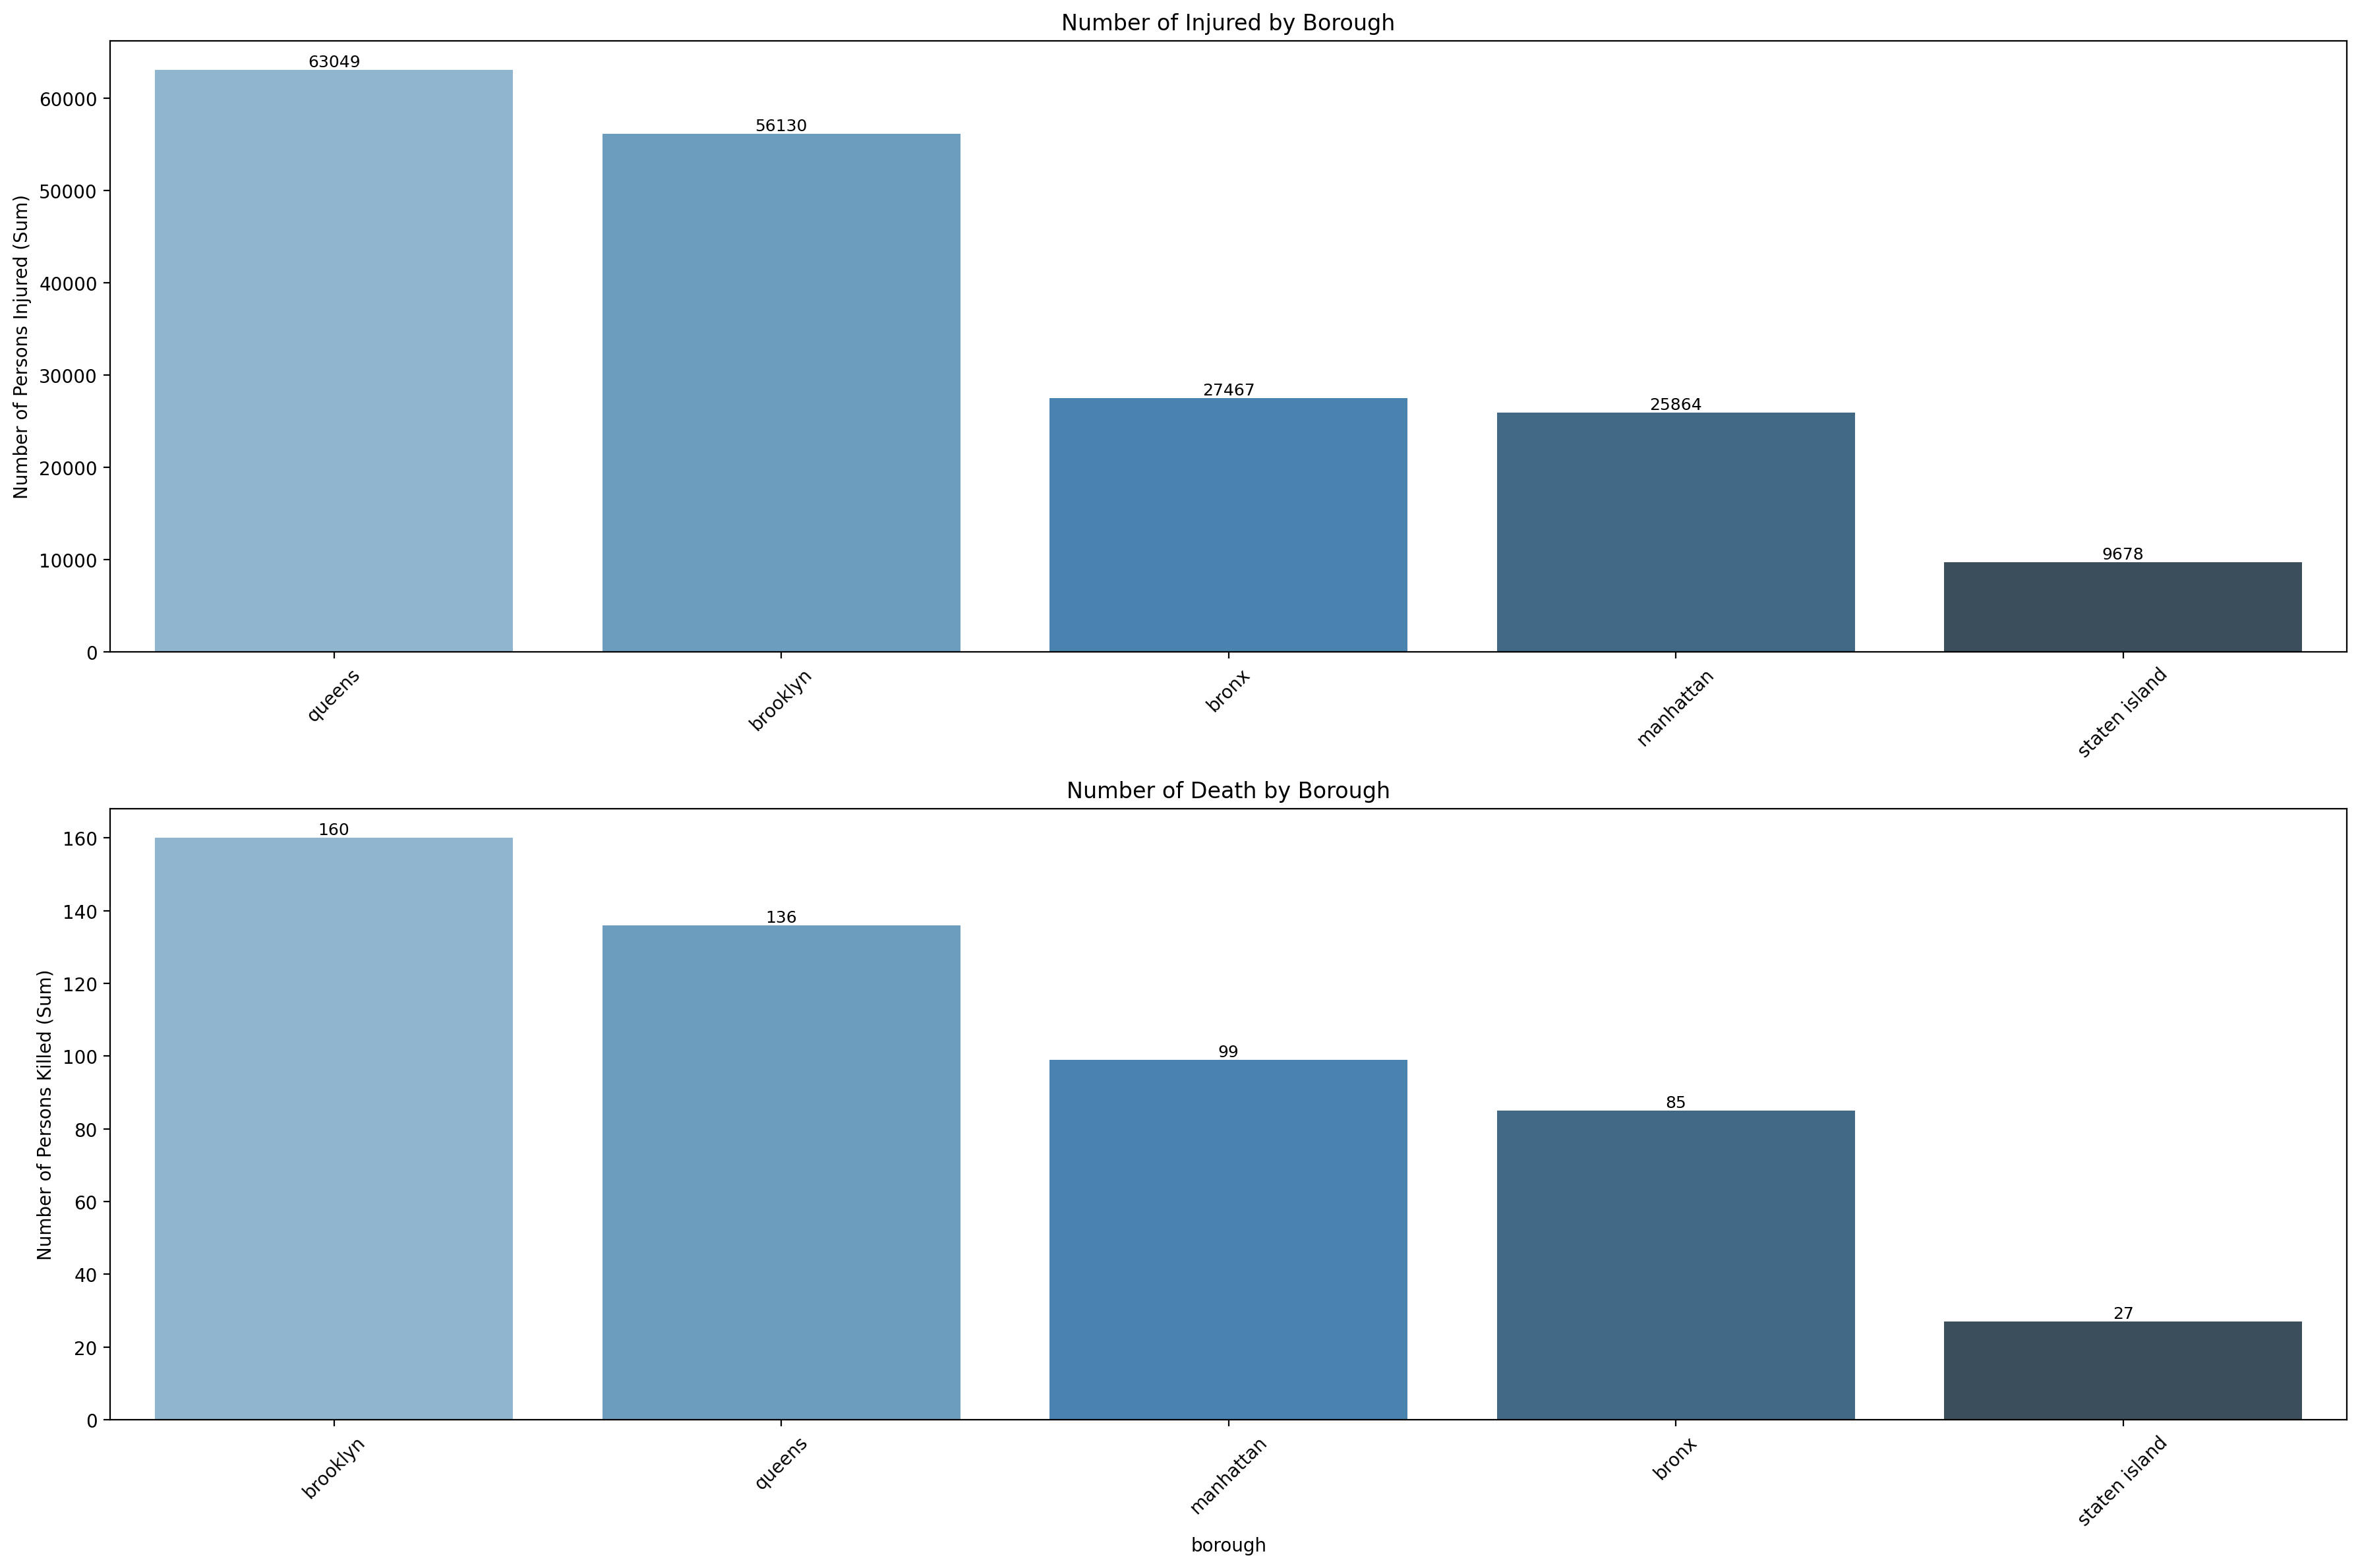

In [74]:
# what is the rank of number of injuries vs deaths by Borough
plot_subplot(df_filtered, 'borough', 'Borough')

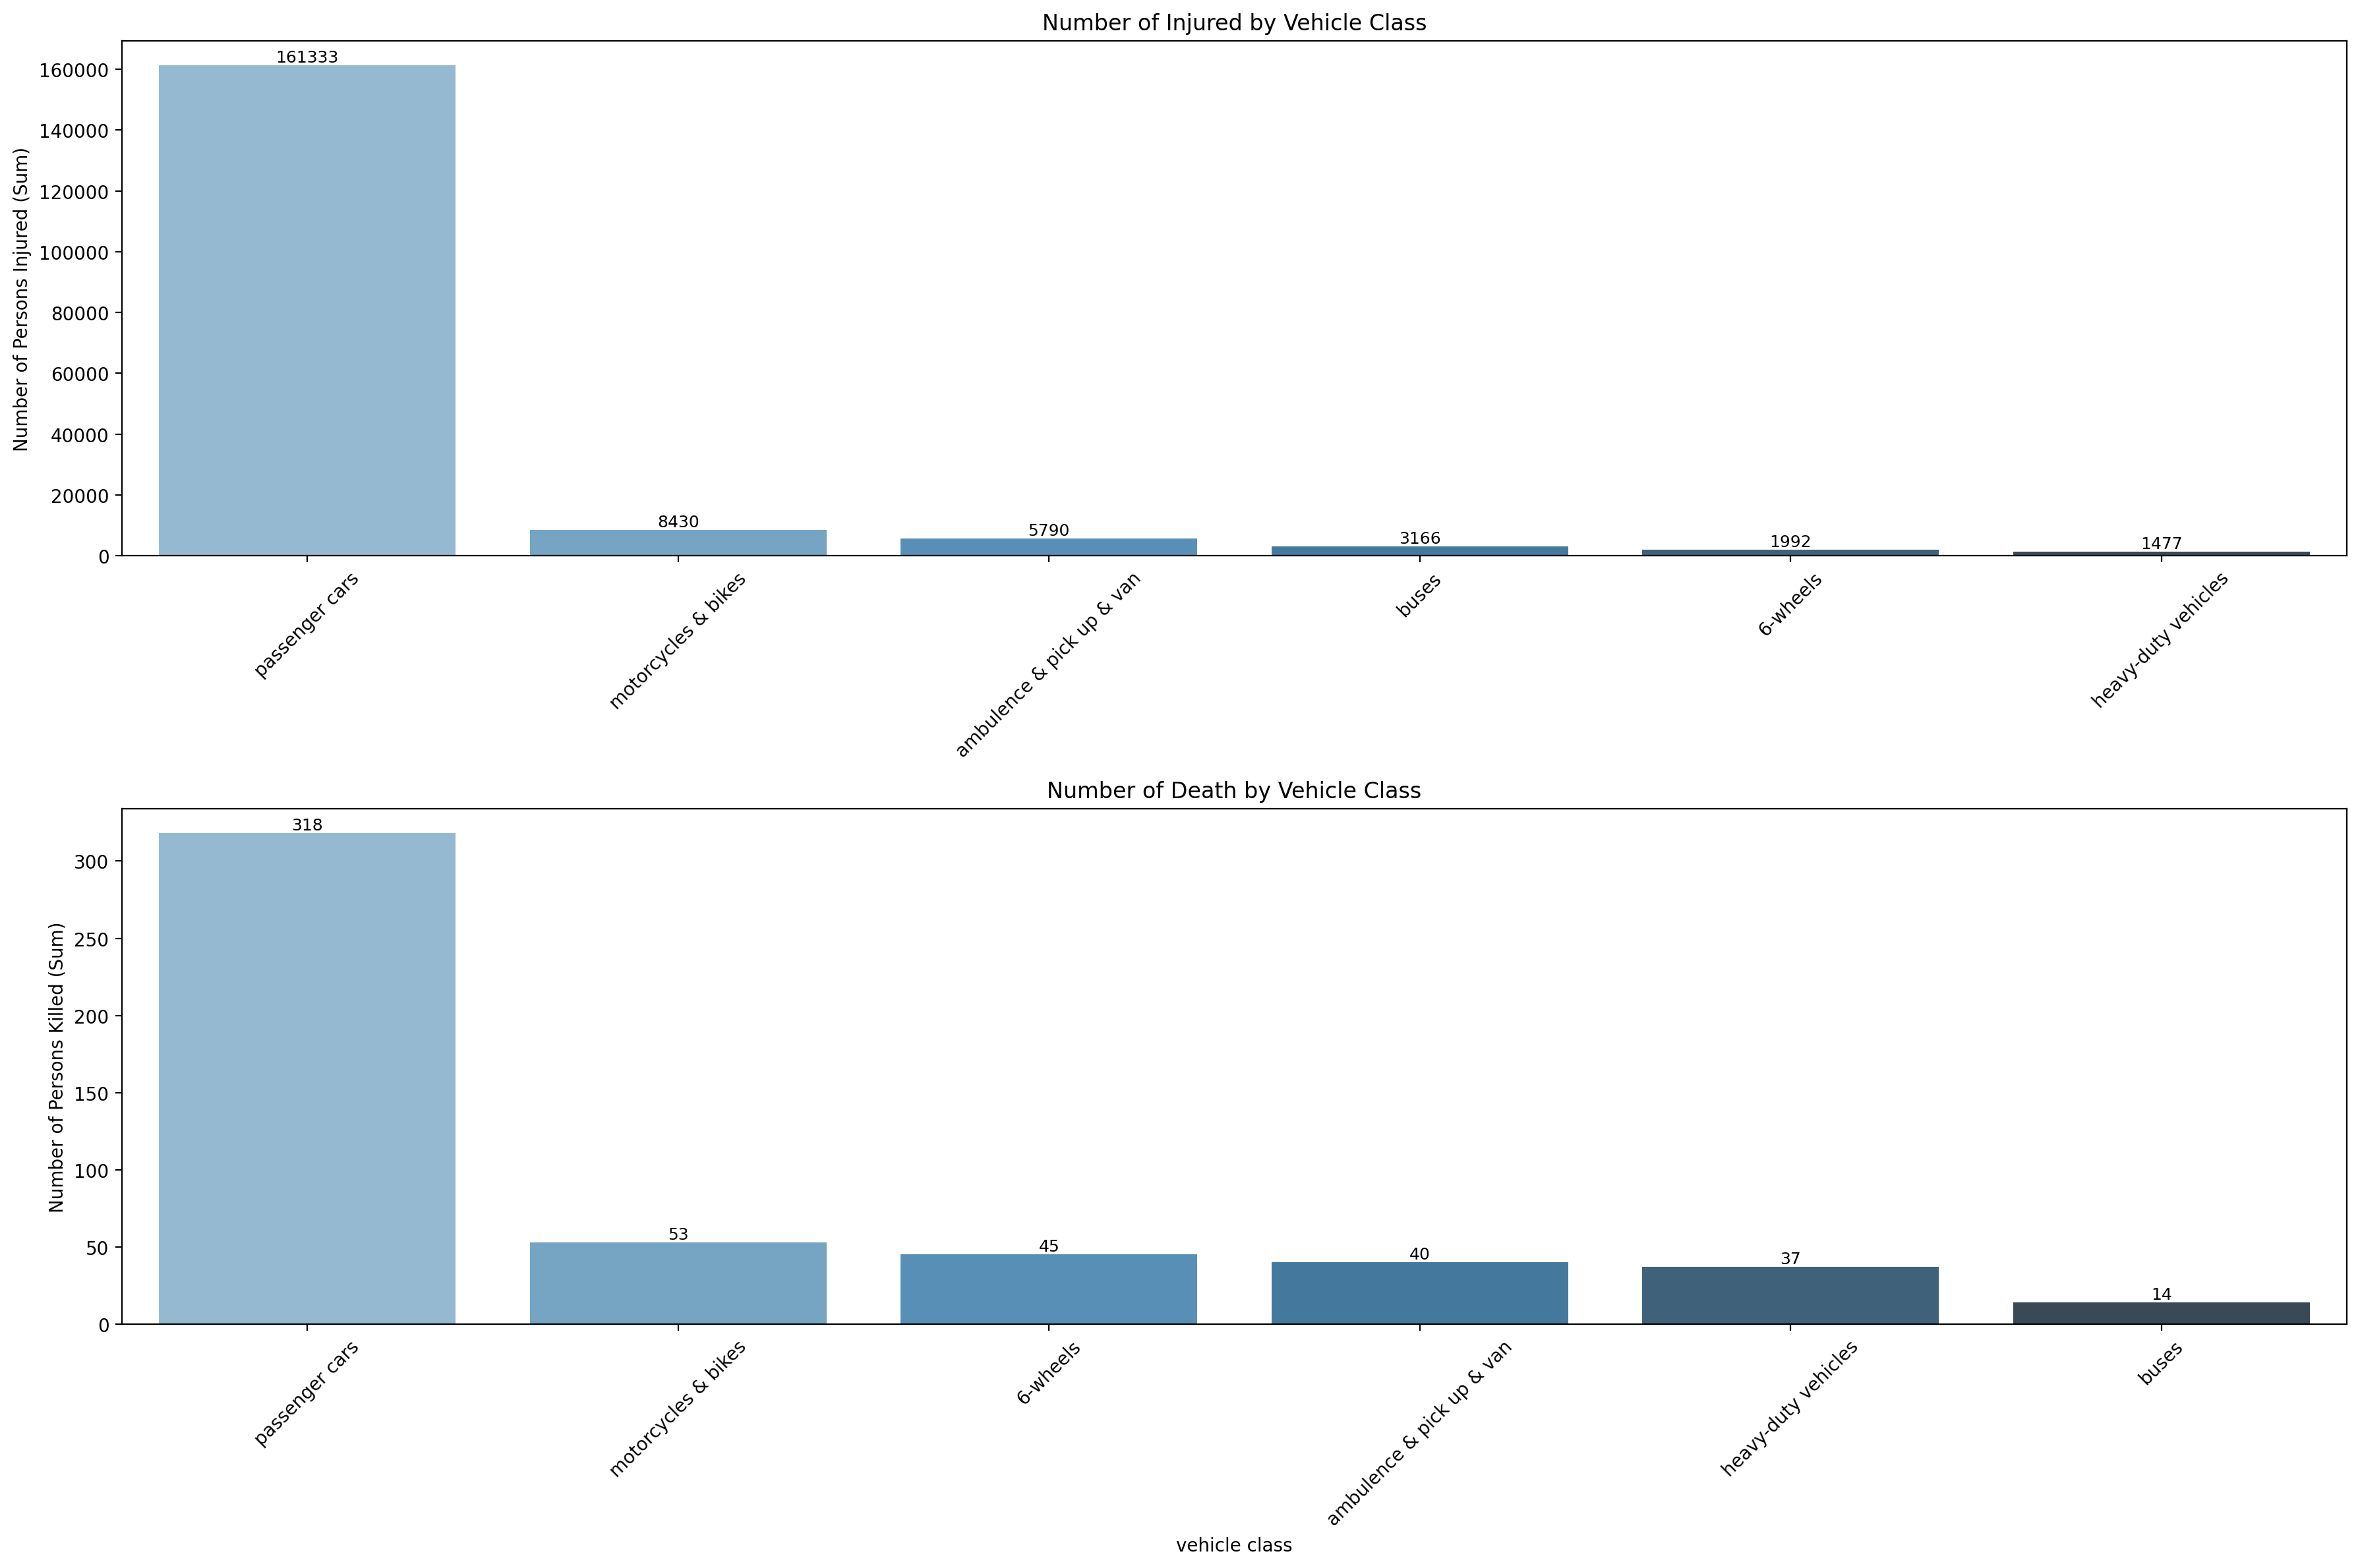

In [75]:
# what is the rank of number of injuries vs deaths by vehicle class
plot_subplot(df_filtered, 'vehicle class', 'Vehicle Class')

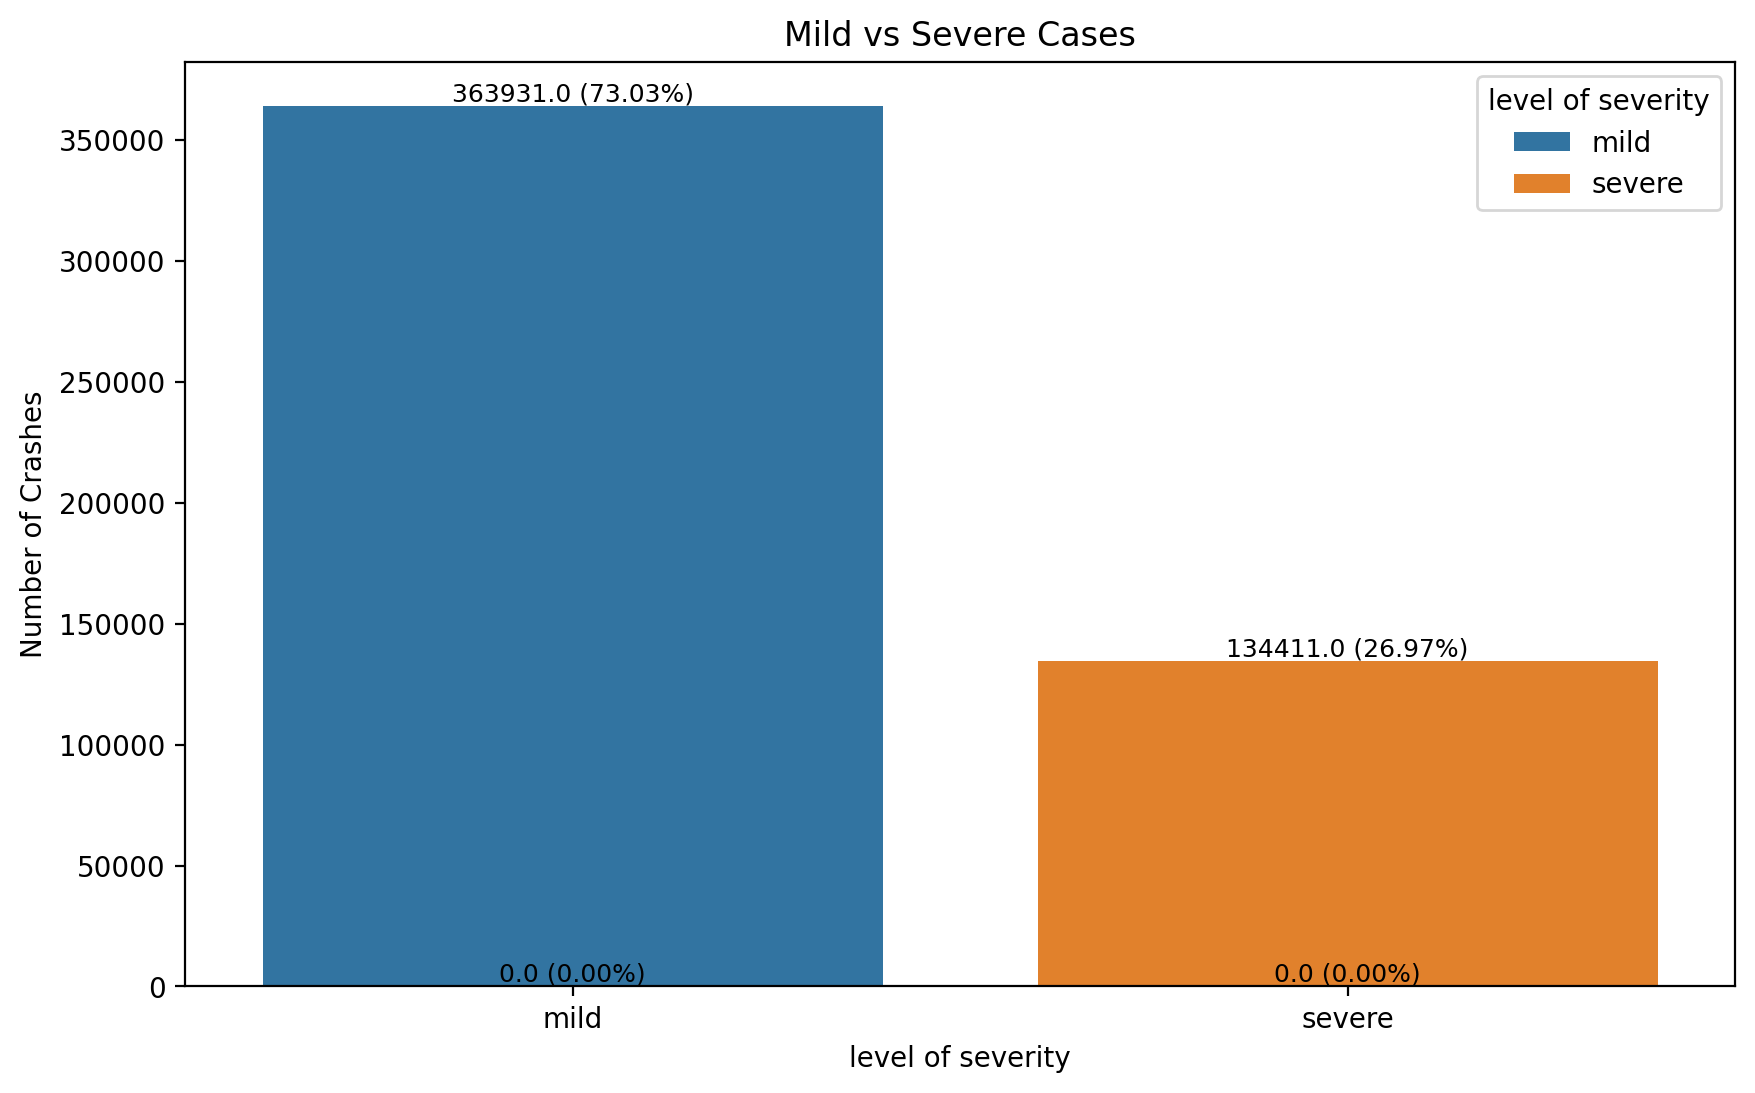

In [76]:
# number of severe vs. non-severe cases
lst = [df_filtered['level of severity'].value_counts(normalize=True).loc['mild'], df_filtered['level of severity'].value_counts(normalize=True).loc['severe']]

plt.figure(figsize=(10,6),dpi=200)
plot = sns.countplot(df_filtered, x='level of severity', hue='level of severity', dodge=False)

# Calculate the total number to use for percentage calculation
total = len(df_filtered['level of severity'])

# annotates the counplot with corresponding percentage values
for p in plot.patches:
    height = p.get_height()
    percentage = (height / total) * 100  # Calculate the percentage
    plot.annotate(f'{height} ({percentage:.2f}%)', (p.get_x() + p.get_width() / 2., height), ha='center', va='bottom', color='black', fontsize=9)

plt.title("Mild vs Severe Cases")
plt.ylabel("Number of Crashes")
plt.show()

In [77]:
lst = [df_filtered['level of severity'].value_counts(normalize=True).loc['mild'], df_filtered['level of severity'].value_counts(normalize=True).loc['severe']]

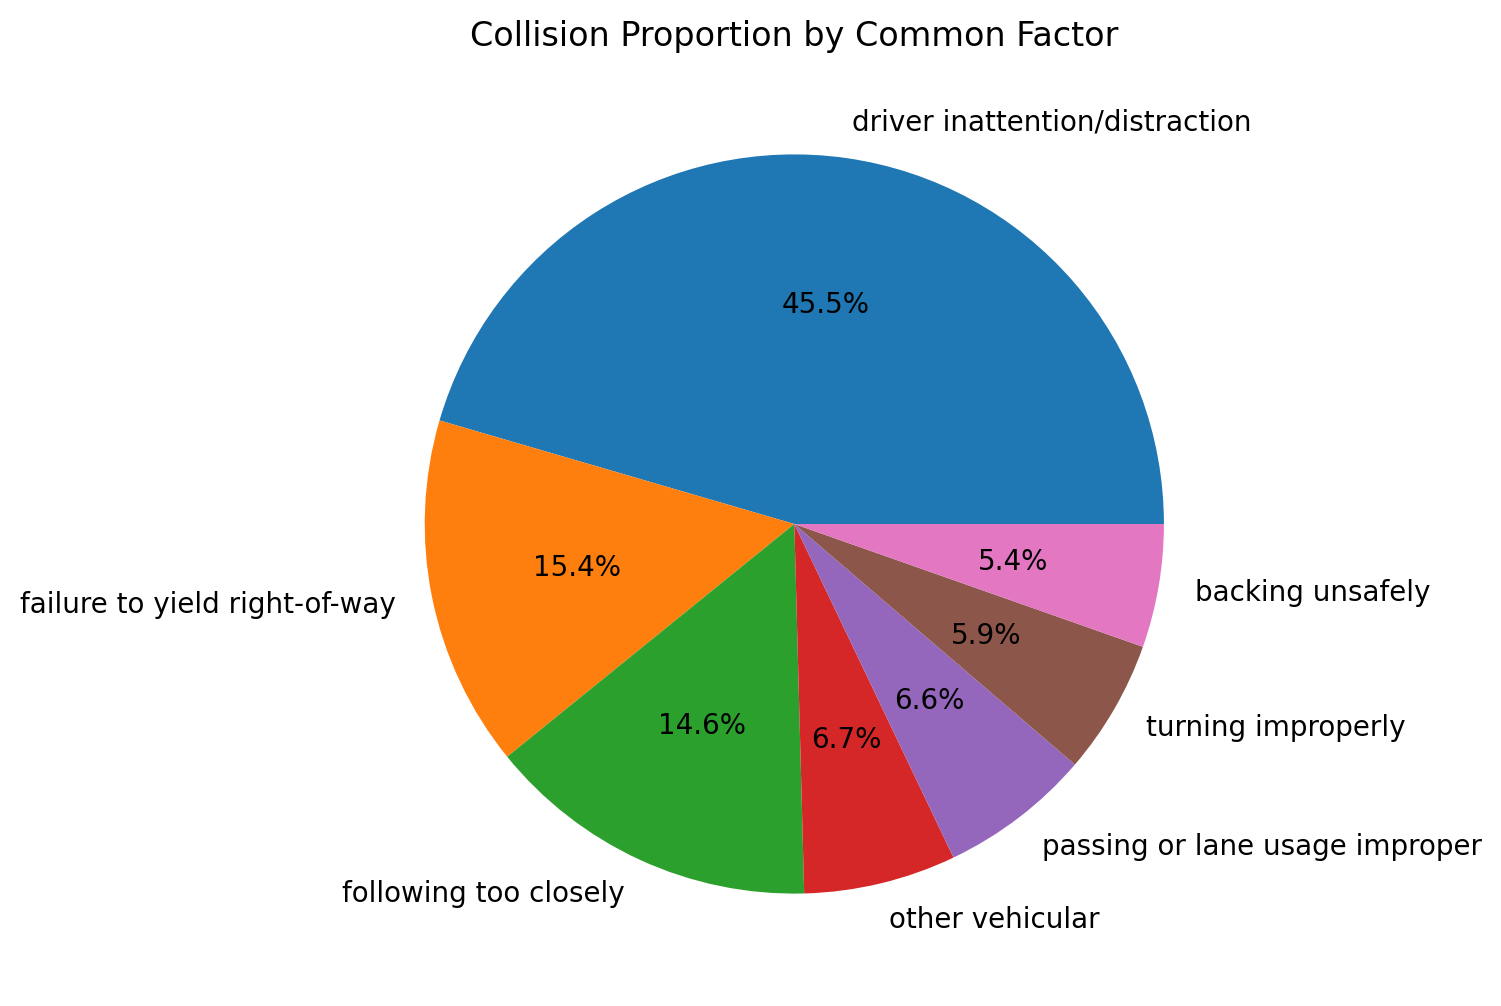

In [78]:
result = df_filtered['contributing factor vehicle 1'].value_counts(normalize=True)

# pie chart: car accidents proportion
plt.figure(figsize=(10,6), dpi=200)
plt.pie(list(result), labels=list(result.index),autopct='%1.1f%%')
plt.title('Collision Proportion by Common Factor')
plt.show()

In [79]:
def plot_countplot(df, field, str1):
    # get the order
    factor_order = df_filtered[field].value_counts().index

    plt.figure(figsize=(10,6),dpi=200)
    ax = sns.countplot(data=df, x=field, hue='level of severity', order=factor_order)

    # Adding annotations to each bar
    for p in ax.patches:
        height = p.get_height()
        # Check if height is NaN, and if so, use 0, otherwise use height
        height = height if pd.notna(height) else 0
        # Adjust the text position based on height
        ax.annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2., height), 
                    ha='center', va='bottom', color='black', fontsize=9)
        
    plt.xticks(rotation=45)
    plt.title(f'Distibution of Mild and Severe Cases by {str1}')
    plt.ylabel('Number of Collisions')
    plt.show()

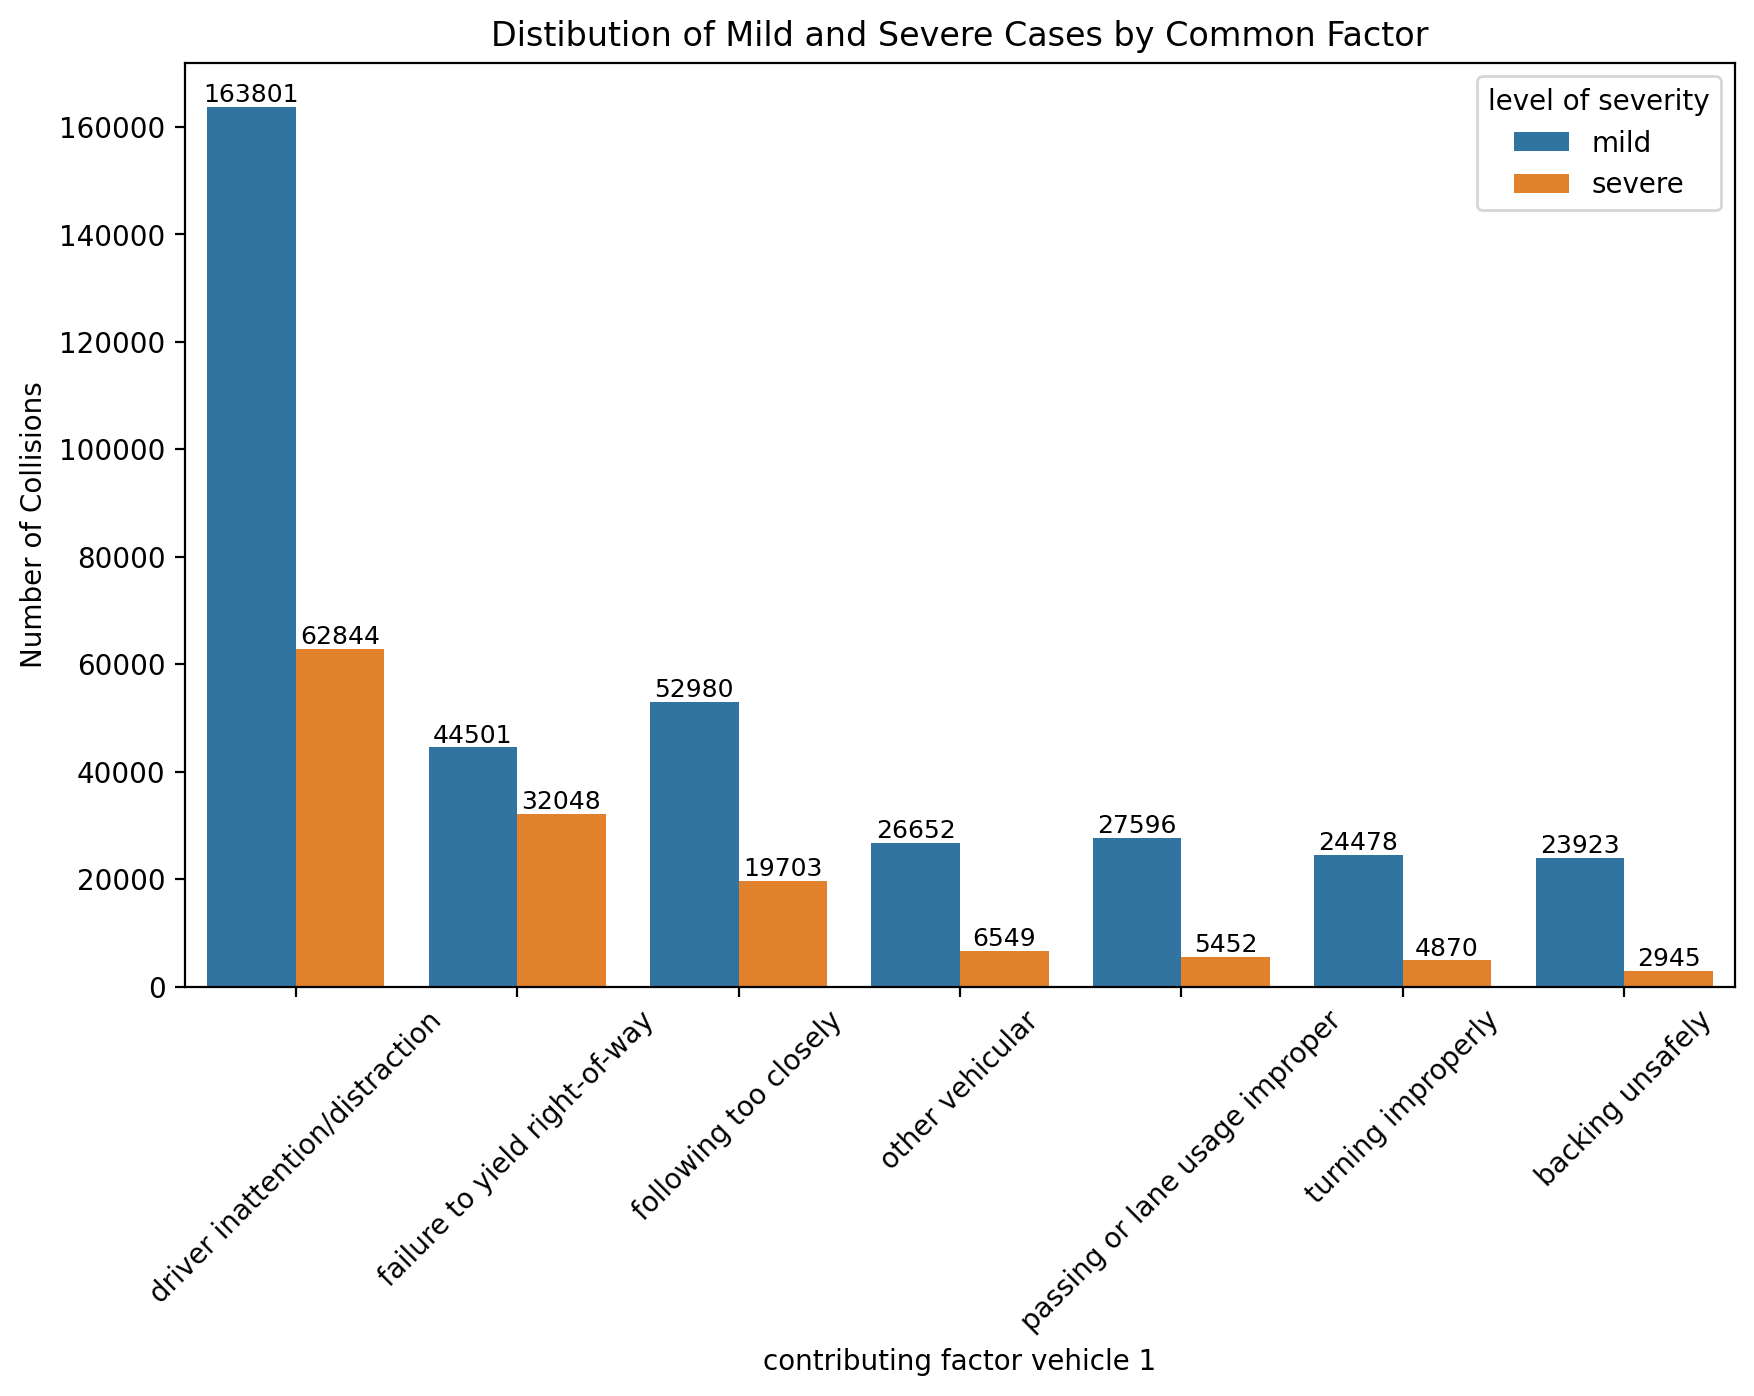

In [80]:
# number of mild vs severe cases by Common Factor
plot_countplot(df_filtered, 'contributing factor vehicle 1', 'Common Factor')

- Insights:
    -  while 'failure to yield right-of-way' ranks second in total accident cases 
with 44.5k instances of mild cases, it exceeds 'following too closely', which ranks third with 53k mild cases 
in the proportion of severe cases. When inspecting the severe cases, the 'failure to yield right-of-way' 
exhibits a 62% higher count of severe cases at 32k, compared to 19.7k for 'following too closely'. This 
reveals that the ‘failure to yield right-of-way’ is a potential indicator that leads to severe outcomes. 


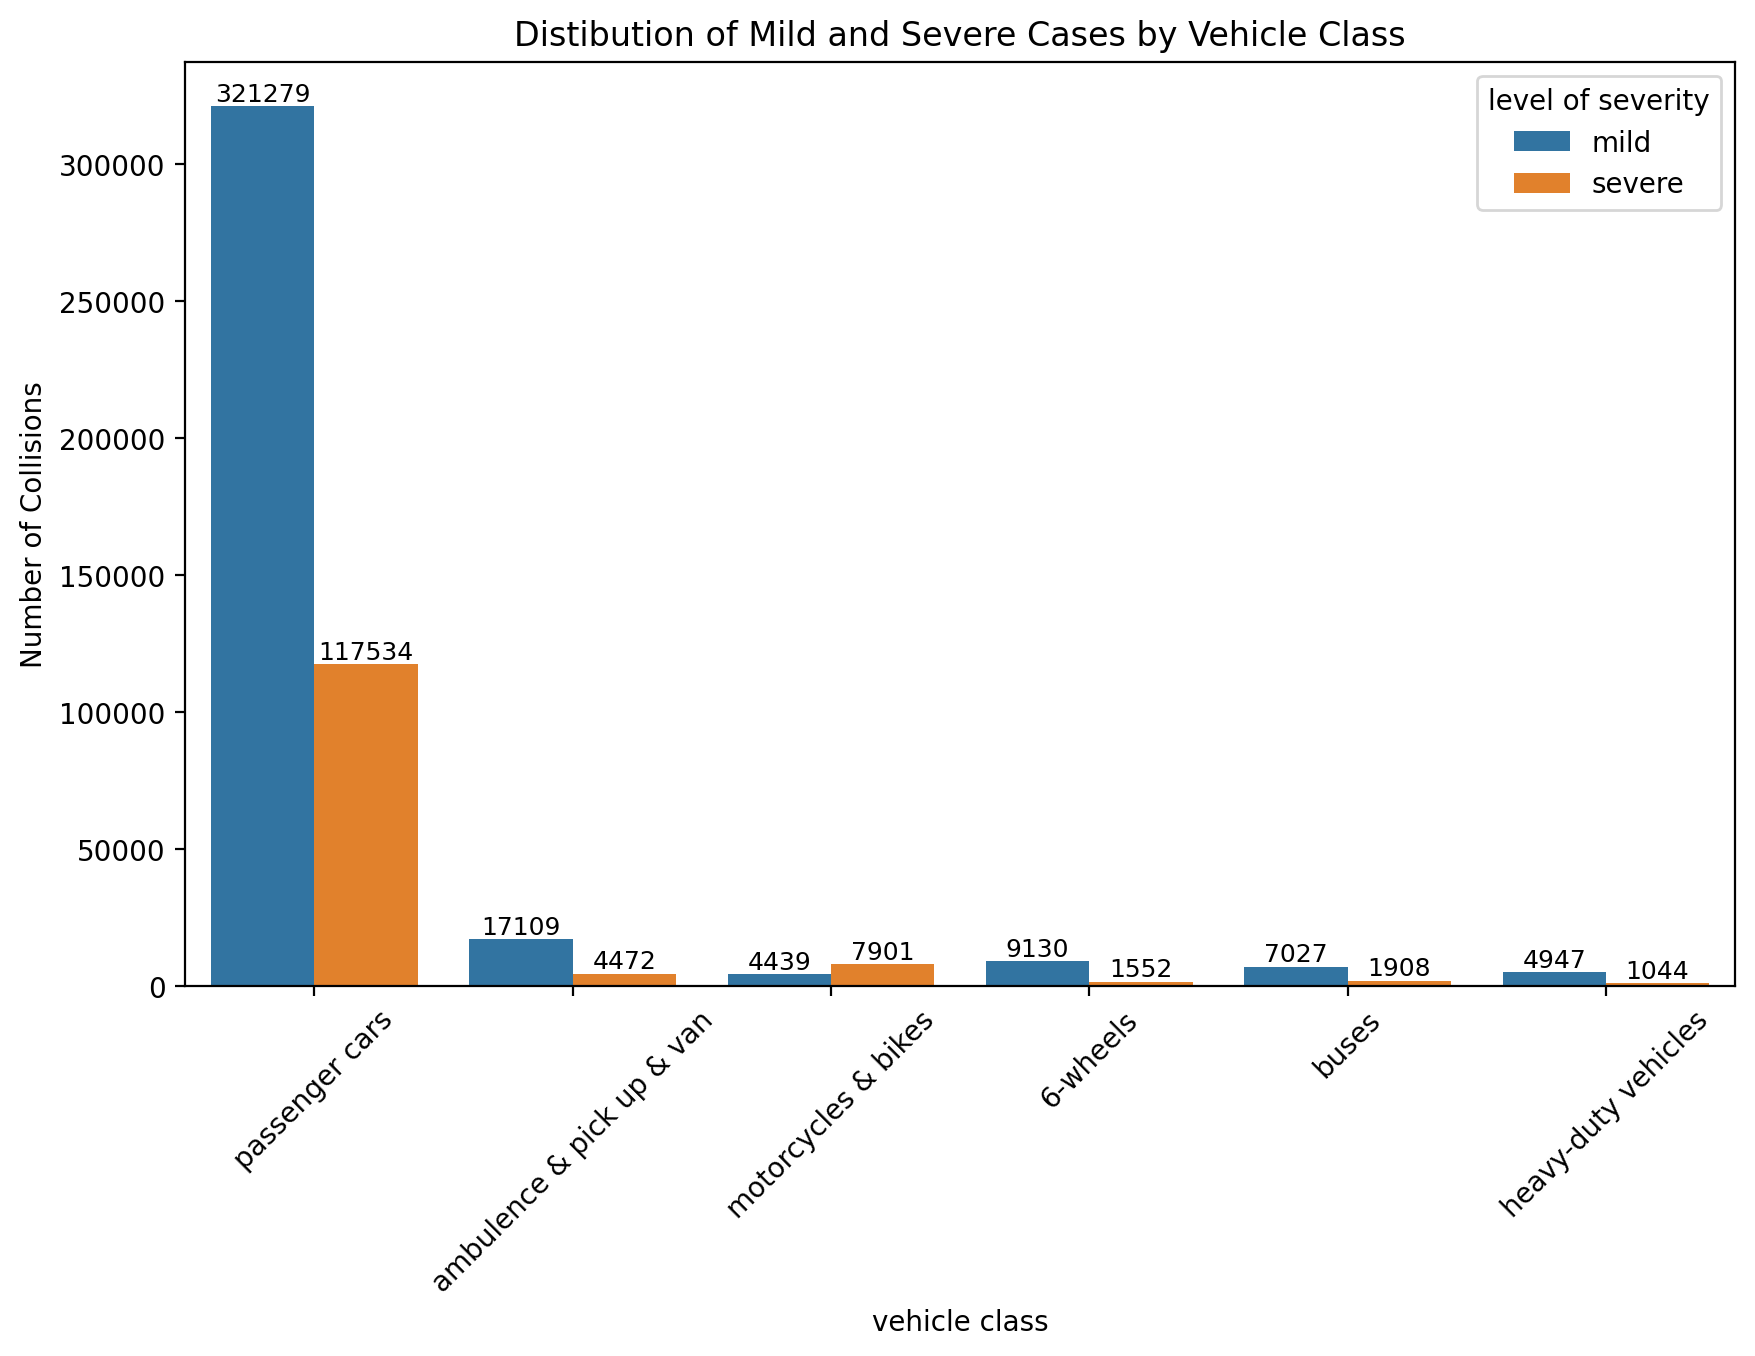

In [81]:
# number of mild vs severe cases by vehicle class
plot_countplot(df_filtered, 'vehicle class', 'Vehicle Class')

- Insights:
    - although motorcycle have less total values than ambulence & pick up & van, it contributes more severe cases

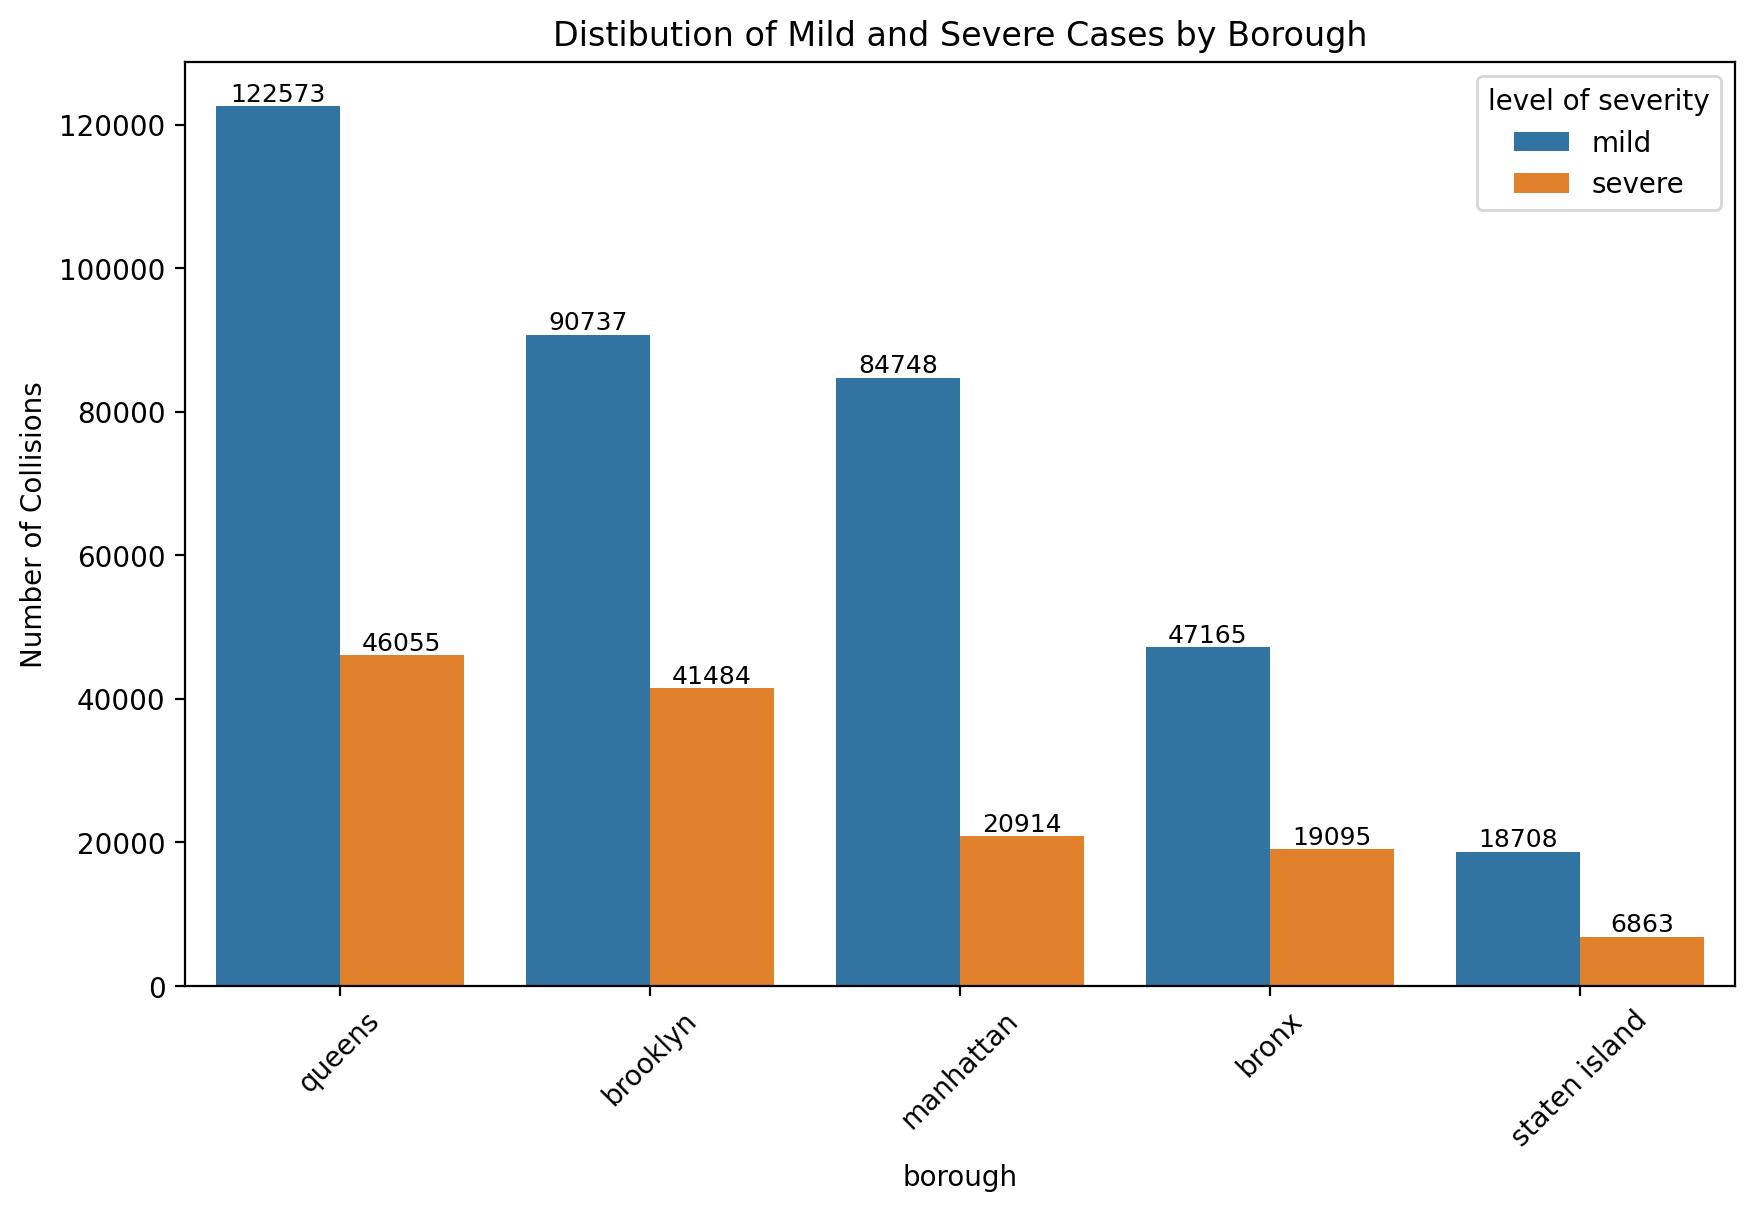

In [82]:
# number of mild vs severe cases by borough
plot_countplot(df_filtered, 'borough', 'Borough')

- Insights:
    - bronx is brough have relatively high proportioin of severe cases

# Feature Engineering + Encoding

In [83]:
from scipy import sparse
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [84]:
df = df_filtered.copy(deep=True)

In [85]:
df = df.drop(['date', 'on street name', 'number of persons injured', 'number of persons killed', 'vehicle type code 1'], axis=1)

- two types of categorical value, should be encoded in diferent way
    - Ordinal Features -> encode with LabelEncoder
    - Nominal Features -> encode with OneHotEncoder
    

In [86]:
# Initialize a LabelEncoder and a dictionary to hold the mappings
le = LabelEncoder()
category_mappings = {}

# List of categorical columns for label encoding and their mappings
label_encode_columns = ['level of severity', 'street tier']
one_hot_encode_columns = ['borough', 'season', 'contributing factor vehicle 1', 'vehicle class']

# Apply LabelEncoder to label encoding columns
for column in label_encode_columns:
    df[column] = le.fit_transform(df[column])

    # store the mapping of encoded labels to original categories
    category_mappings[column] = {index: label for index, label in enumerate(le.classes_)}

# One-hot encoding setup
column_transformer = ColumnTransformer(
    [('one_hot_encoder', OneHotEncoder(), one_hot_encode_columns)],
    remainder='passthrough' # keep all columns in the dataframe unchange
)
    
# Apply OneHotEncoder
df_encoded = column_transformer.fit_transform(df)

# If the output is a sparse matrix, convert it to a dense format
if isinstance(df_encoded, sparse.csr.csr_matrix):
    df_encoded = df_encoded.toarray()

df_encoded = pd.DataFrame(df_encoded, columns=[name for name in column_transformer.get_feature_names_out()])

# Merge the one-hot encoded dataframe back with the label encoded columns
for column in label_encode_columns:
    df_encoded[column] = df[column].values

# Display the mappings for LabelEncoder
for column, mapping in category_mappings.items():
    print(f'Mapping for {column}: {mapping}\n')

Mapping for level of severity: {0: 'mild', 1: 'severe'}

Mapping for street tier: {0: 'tier1', 1: 'tier2', 2: 'tier3', 3: 'tier4'}



In [87]:
df_encoded = df_encoded.drop(['remainder__level of severity', 'remainder__street tier'], axis=1)

In [88]:
# cast some features back to int
df_encoded['remainder__year'] = df_encoded['remainder__year'].astype(int)
df_encoded['remainder__month'] = df_encoded['remainder__month'].astype(int)
df_encoded['remainder__day'] = df_encoded['remainder__day'].astype(int)
df_encoded['remainder__hour'] = df_encoded['remainder__hour'].astype(int)
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 498342 entries, 0 to 498341
Data columns (total 28 columns):
 #   Column                                                                         Non-Null Count   Dtype  
---  ------                                                                         --------------   -----  
 0   one_hot_encoder__borough_bronx                                                 498342 non-null  float64
 1   one_hot_encoder__borough_brooklyn                                              498342 non-null  float64
 2   one_hot_encoder__borough_manhattan                                             498342 non-null  float64
 3   one_hot_encoder__borough_queens                                                498342 non-null  float64
 4   one_hot_encoder__borough_staten island                                         498342 non-null  float64
 5   one_hot_encoder__season_Fall                                                   498342 non-null  float64
 6   one_hot_enco

In [121]:
df = df_encoded.copy(deep=True)

# Sampling the dataset
- reduce the computational cost in time' because
    - going to use ensemble method
        - Random Forest
        - XGBoost
- use StratifiedShuffleSplit sampling method to keep the orginal distribution

In [124]:
from sklearn.model_selection import StratifiedShuffleSplit

In [127]:
df.head()

one_hot_encoder__borough_bronx  one_hot_encoder__borough_brooklyn  \
0                             0.0                                0.0   
1                             0.0                                0.0   
2                             0.0                                0.0   
3                             0.0                                0.0   
4                             0.0                                0.0   

   one_hot_encoder__borough_manhattan  one_hot_encoder__borough_queens  \
0                                 0.0                              1.0   
1                                 0.0                              1.0   
2                                 0.0                              1.0   
3                                 0.0                              1.0   
4                                 0.0                              1.0   

   one_hot_encoder__borough_staten island  one_hot_encoder__season_Fall  \
0                                     0.0                           0.0   
1                                     0.0                           0.0   
2                                     0.0                           0.0   
3                                     0.0                           0.0   
4                                     0.0                           0.0   

   one_hot_encoder__season_Spring  one_hot_encoder__season_Summer  \
0                             0.0                             0.0   
1                             1.0                             0.0   
2                             1.0                             0.0   
3                             0.0                             0.0   
4                             0.0                             0.0   

   one_hot_encoder__season_Winter  \
0                             1.0   
1                             0.0   
2                             0.0   
3                             1.0   
4                             1.0   

   one_hot_encoder__contributing factor vehicle 1_backing unsafely  ...  \
0                                                0.0                ...   
1                                                0.0                ...   
2                                                0.0                ...   
3                                                0.0                ...   
4                                                0.0                ...   

   one_hot_encoder__vehicle class_buses  \
0                                   0.0   
1                                   0.0   
2                                   0.0   
3                                   0.0   
4                                   0.0   

   one_hot_encoder__vehicle class_heavy-duty vehicles  \
0                                                0.0    
1                                                0.0    
2                                                0.0    
3                                                0.0    
4                                                0.0    

   one_hot_encoder__vehicle class_motorcycles & bikes  \
0                                                0.0    
1                                                1.0    
2                                                0.0    
3                                                0.0    
4                                                0.0    

   one_hot_encoder__vehicle class_passenger cars  remainder__year  \
0                                            1.0             2021   
1                                            0.0             2021   
2                                            1.0             2021   
3                                            1.0             2021   
4                                            1.0             2021   

   remainder__month  remainder__day  remainder__hour  level of severity  \
0                12              13                0                  0   
1                 4              14               11                  1   


In [128]:
# Define features (X) and target variable (y)
X = df.drop('level of severity', axis=1)
y = df['level of severity']

# Calculate the exact number of samples for test_size
number_of_samples = 10000
total_samples = len(df)
test_size = number_of_samples / total_samples

# Initialize StratifiedShuffleSplit to extract 10,000 rows
sss = StratifiedShuffleSplit(n_splits=1, test_size=test_size, random_state=101)

# Perform the split
for train_index, test_index in sss.split(X, y):
    X_sampled, y_sampled = X.iloc[test_index], y.iloc[test_index]

# You now have your sampled dataset in X_sampled, y_sampled
# You can then proceed to further processing or save this dataset for future use

# To save the sampled dataset, for example using pandas to a CSV file:
sampled_df = X_sampled.assign(level_of_severity=y_sampled)

In [130]:
df = sampled_df.reset_index().drop('index',axis=1).copy(deep=True)

In [213]:
df.shape

(10000, 28)

# Machine Learning
- Based on the distribution in 'level of severity', we need to rebalanced the class
    - conduct a SMOTETomek method, a method do oversampling (SMOTE) and undersampling (Tomek Link) at the same time
-  A common train test split  is conducted that assigns 70% of the subset to the training set and 30% to the test set. 
- Each algorithm is conducted the hyperparameter tunning using a Grid Seach strategy with a common 5-fold cross-validation during training. 
- the key metrics of the models were inspected for effectiveness, and the best performed model was selected for the next phase of algorithm validation.

In [216]:
df.shape

(10000, 28)

In [218]:
from collections import Counter
from imblearn.pipeline import Pipeline
from imblearn.combine import SMOTETomek
from sklearn.compose import ColumnTransformer
from sklearn.metrics import roc_curve, roc_auc_score, auc
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score, GridSearchCV, StratifiedShuffleSplit
from sklearn.metrics import accuracy_score, f1_score, make_scorer, confusion_matrix, classification_report

In [220]:
# Define features (X) and target variable (y)
X = df.drop('level_of_severity', axis=1)
y = df['level_of_severity']

## Chi-Square Test on Original Data (Before rebalance the target)
- how feature correlates with target

In [232]:
from scipy.stats import chi2_contingency

In [234]:
# a dictinoary to store results
results = {}

for column in X.columns:
    # create a contingency table
    contingency_table = pd.crosstab(X[column], y)

    # perform the chi-square test
    chi2, p_value, dof, expected = chi2_contingency(contingency_table)

    # store the results
    results[column] = {'chi2_stat': chi2, 'p_value': p_value}

# print the results
for feature, result in results.items():
    print(f"Feature: {feature}, Chi2 Statistic: {result['chi2_stat']}, P-value: {result['p_value']}")

Feature: one_hot_encoder__borough_bronx, Chi2 Statistic: 0.8088373778983287, P-value: 0.3684642036452409
Feature: one_hot_encoder__borough_brooklyn, Chi2 Statistic: 71.7412373029452, P-value: 2.4535109216387142e-17
Feature: one_hot_encoder__borough_manhattan, Chi2 Statistic: 98.59711622904763, P-value: 3.094695549527361e-23
Feature: one_hot_encoder__borough_queens, Chi2 Statistic: 0.06256812986033579, P-value: 0.8024820045500735
Feature: one_hot_encoder__borough_staten island, Chi2 Statistic: 0.325897675283898, P-value: 0.5680847291048399
Feature: one_hot_encoder__season_Fall, Chi2 Statistic: 0.054920462918200456, P-value: 0.8147123770046827
Feature: one_hot_encoder__season_Spring, Chi2 Statistic: 1.4022828596084977, P-value: 0.2363417192441373
Feature: one_hot_encoder__season_Summer, Chi2 Statistic: 2.6946441457603942, P-value: 0.10068596635697902
Feature: one_hot_encoder__season_Winter, Chi2 Statistic: 0.03898741037545036, P-value: 0.8434736064208979
Feature: one_hot_encoder__contrib

In [252]:
results_df = pd.DataFrame(results).T  # Transpose to get features as rows
results_df = results_df.reset_index().rename(columns={'index': 'feature'})
results_df

feature   chi2_stat  \
0                      one_hot_encoder__borough_bronx    0.808837   
1                   one_hot_encoder__borough_brooklyn   71.741237   
2                  one_hot_encoder__borough_manhattan   98.597116   
3                     one_hot_encoder__borough_queens    0.062568   
4              one_hot_encoder__borough_staten island    0.325898   
5                        one_hot_encoder__season_Fall    0.054920   
6                      one_hot_encoder__season_Spring    1.402283   
7                      one_hot_encoder__season_Summer    2.694644   
8                      one_hot_encoder__season_Winter    0.038987   
9   one_hot_encoder__contributing factor vehicle 1...   88.506301   
10  one_hot_encoder__contributing factor vehicle 1...    0.305924   
11  one_hot_encoder__contributing factor vehicle 1...  202.836482   
12  one_hot_encoder__contributing factor vehicle 1...    1.906644   
13  one_hot_encoder__contributing factor vehicle 1...   11.169480   
14  one_hot_encoder__contributing factor vehicle 1...   26.799803   
15  one_hot_encoder__contributing factor vehicle 1...   42.651674   
16            one_hot_encoder__vehicle class_6-wheels   23.333687   
17  one_hot_encoder__vehicle class_ambulence & pic...   10.985004   
18               one_hot_encoder__vehicle class_buses    0.630161   
19  one_hot_encoder__vehicle class_heavy-duty vehi...    8.740151   
20  one_hot_encoder__vehicle class_motorcycles & b...  149.122901   
21      one_hot_encoder__vehicle class_passenger cars    0.016197   
22                                    remainder__year  441.768189   
23                                   remainder__month   15.704276   
24                                     remainder__day   29.164202   
25                                    remainder__hour   50.803662   
26                                        street tier    0.418185   

         p_value  
0   3.684642e-01  
1   2.453511e-17  
2   3.094696e-23  
3   8.024820e-01  
4   5.680847e-01  
5   8.147124e-01  
6   2.363417e-01  
7   1.006860e-01  
8   8.434736e-01  
9   5.067320e-21  
10  5.801923e-01  
11  5.021914e-46  
12  1.673365e-01  
13  8.315394e-04  
14  2.256603e-07  
15  6.540842e-11  
16  1.361937e-06  
17  9.185208e-04  
18  4.272963e-01  
19  3.112787e-03  
20  2.695729e-34  
21  8.987298e-01  
22  5.281961e-87  
23  1.524694e-01  
24  5.089833e-01  
25  7.219265e-04  
26  9.364607e-01

- Statistically Significant Features:
    - Features in low p-value (less than 0.05)
        - `one_hot_encoder__borough_brooklyn`, 
        - `one_hot_encoder__borough_manhattan`, 
        - `one_hot_encoder__contributing factor vehicle 1_backing unsafely`, 
        - `one_hot_encoder__contributing factor vehicle 1_failure to yield right-of-way`, 
        - `and one_hot_encoder__vehicle class_motorcycles & bikes `
    - This indicates that there is a statistically significant association between these features and the severity of cases.
    - `remainder__year` feature shows a very high Chi-square statistic and an extremely low p-value
        - strong association with the level of severity over the years

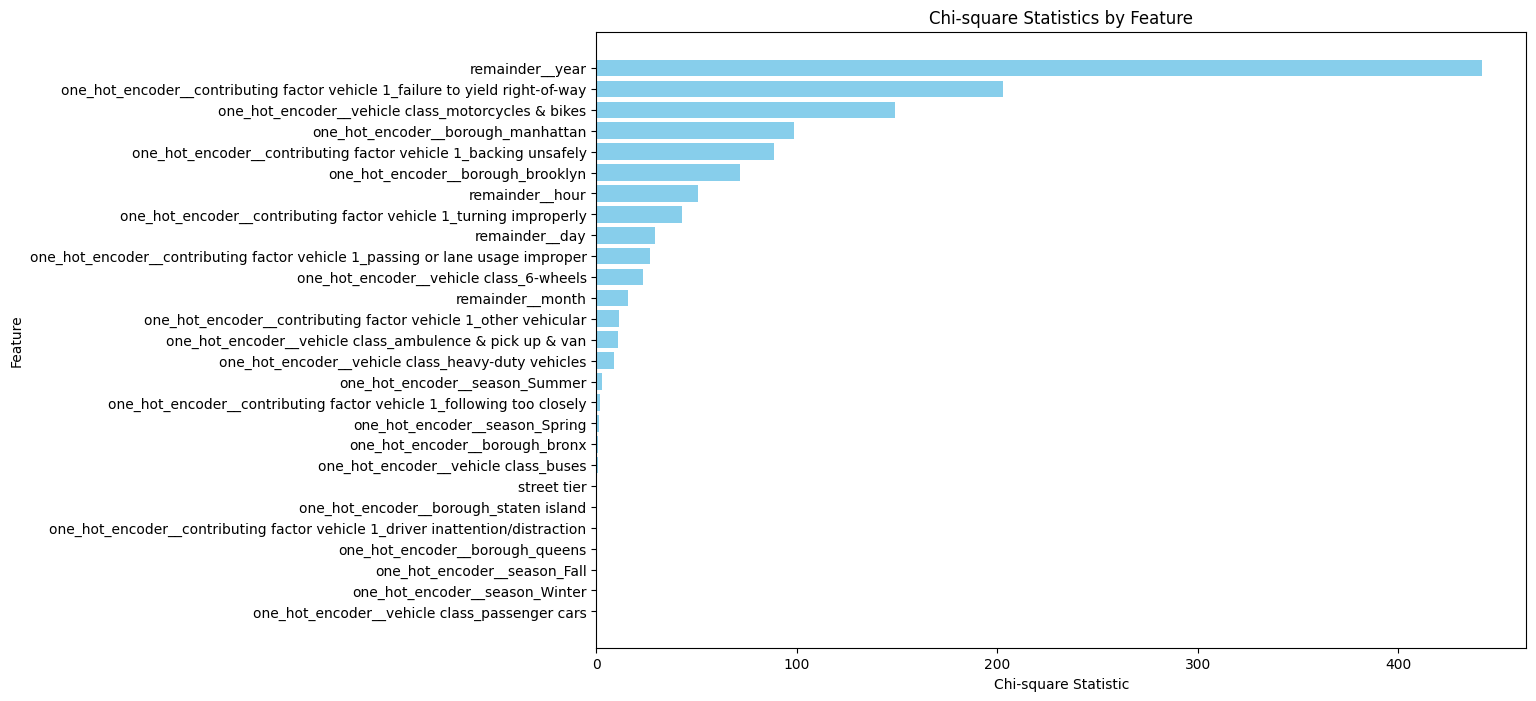

In [256]:
sorted_df = results_df.sort_values(by='chi2_stat', ascending=False)
# plot the result chi-squre result

# Create a bar plot for Chi-square statistics
plt.figure(figsize=(12, 8))
plt.barh(sorted_df['feature'], sorted_df['chi2_stat'], color='skyblue')
plt.xlabel('Chi-square Statistic')
plt.ylabel('Feature')
plt.title('Chi-square Statistics by Feature')
plt.gca().invert_yaxis()  # Invert y-axis to have the largest at the top
plt.show()

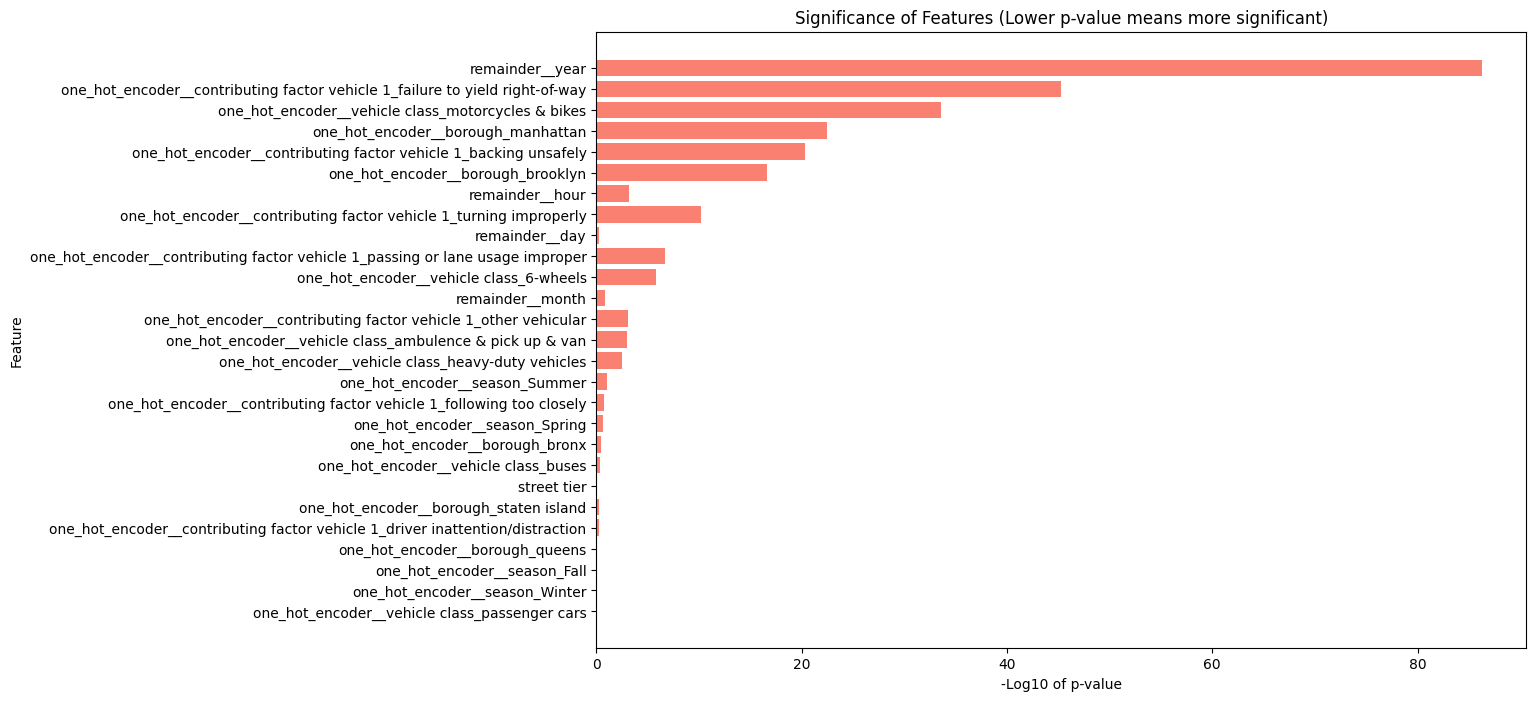

In [262]:
# plot the p-value result
plt.figure(figsize=(12, 8))
plt.barh(sorted_df['feature'], -np.log10(sorted_df['p_value']), color='salmon')  # Plot negative log for better visibility
plt.xlabel('-Log10 of p-value')
plt.ylabel('Feature')
plt.title('Significance of Features (Lower p-value means more significant)')
plt.gca().invert_yaxis()
plt.show()

In [220]:
# Apply SMOTE & Tomek link to the training set to handle class imbalance
smote_tomek = SMOTETomek(random_state=101)
X_resampled, y_resampled = smote_tomek.fit_resample(X, y)

print(sorted(Counter(y_resampled).items()))

[(0, 7180), (1, 7180)]


In [222]:
# split the dataset (use most commmon split 0.2 or 0.3)
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=101)

# Display the shapes of the resulting sets
print("Training set shape:", X_train.shape)
print("Validation set shape:", X_test.shape)

Training set shape: (10052, 27)
Validation set shape: (4308, 27)


In [220]:
# define metrics to evaluate
def eval_metrics(model, X_test, y_test):
    """
    Evaluate a trained machine learning model on the given test data and labels.
    
    Parameters:
        model: Trained model implementing the scikit-learn estimator interface.
        X_test: Test features.
        y_test: True labels for the test data.
        
    Outputs:
        Prints the best parameters, AUC score, F1 score, confusion matrix, and classification report.
    """
    # Output the best parameters and best AUC score from grid search
    print("Best Parameters:", model.best_params_)
    print("Best AUC Score:", model.cv_results_['mean_test_AUC'].max())
    
    # Predict classes and class probabilities on the test set
    y_pred = model.predict(X_test)
    y_probs = model.predict_proba(X_test)[:, 1]  # Probability of the positive class
    
    # Calculate F1 score and AUC for the test set
    test_f1 = f1_score(y_test, y_pred, average='macro')
    test_auc = roc_auc_score(y_test, y_probs)
    
    # Print evaluation metrics
    print("Test F1 Macro Score:", test_f1)
    print("Test AUC Score:", test_auc)
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))

## Model: Random Forest

In [223]:
from sklearn.ensemble import RandomForestClassifier

In [225]:
# Create a pipeline with scaling and Random Forest classifier
rf_pipeline = Pipeline([
    ('classifier', RandomForestClassifier(random_state=101))
])

# Define the parameter grid for Random Forest
rf_param_grid = {
    'classifier__n_estimators': [100, 200, 300, 400],  # Number of trees in the forest
    'classifier__max_depth': [10, 20, 30, 35, 40],  # Maximum depth of the tree
    'classifier__min_samples_split': [2, 5, 10],  # Minimum number of samples required to split a node
    'classifier__min_samples_leaf': [1, 2, 4],  # Minimum number of samples required at each leaf node
    'classifier__max_features': ['auto', 'sqrt'],  # Number of features to consider when looking for the best split
}

# Set up the grid search with Random Forest-specific parameters
rf_grid_search = GridSearchCV(
    rf_pipeline,
    rf_param_grid,
    cv=5,  # Number of folds
    scoring={'AUC': 'roc_auc', 'F1': make_scorer(f1_score, average='macro')},  # Scoring metric
    refit='AUC',  # Choose which scorer to use to find the best parameters
    n_jobs=-1  # Use all available cores
)

# Fit the grid search to the training data
rf_grid_search.fit(X_train, y_train)

eval_metrics(rf_grid_search, X_test, y_test)

Best Parameters: {'classifier__max_depth': 35, 'classifier__max_features': 'sqrt', 'classifier__min_samples_leaf': 2, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 300}
Best AUC Score: nan
Test F1 Macro Score: 0.7940045608759717
Test AUC Score: 0.8717247741223533
Accuracy: 0.7964252553389044
Confusion Matrix:
 [[1949  211]
 [ 666 1482]]
              precision    recall  f1-score   support

           0       0.75      0.90      0.82      2160
           1       0.88      0.69      0.77      2148

    accuracy                           0.80      4308
   macro avg       0.81      0.80      0.79      4308
weighted avg       0.81      0.80      0.79      4308



### Feature Importance

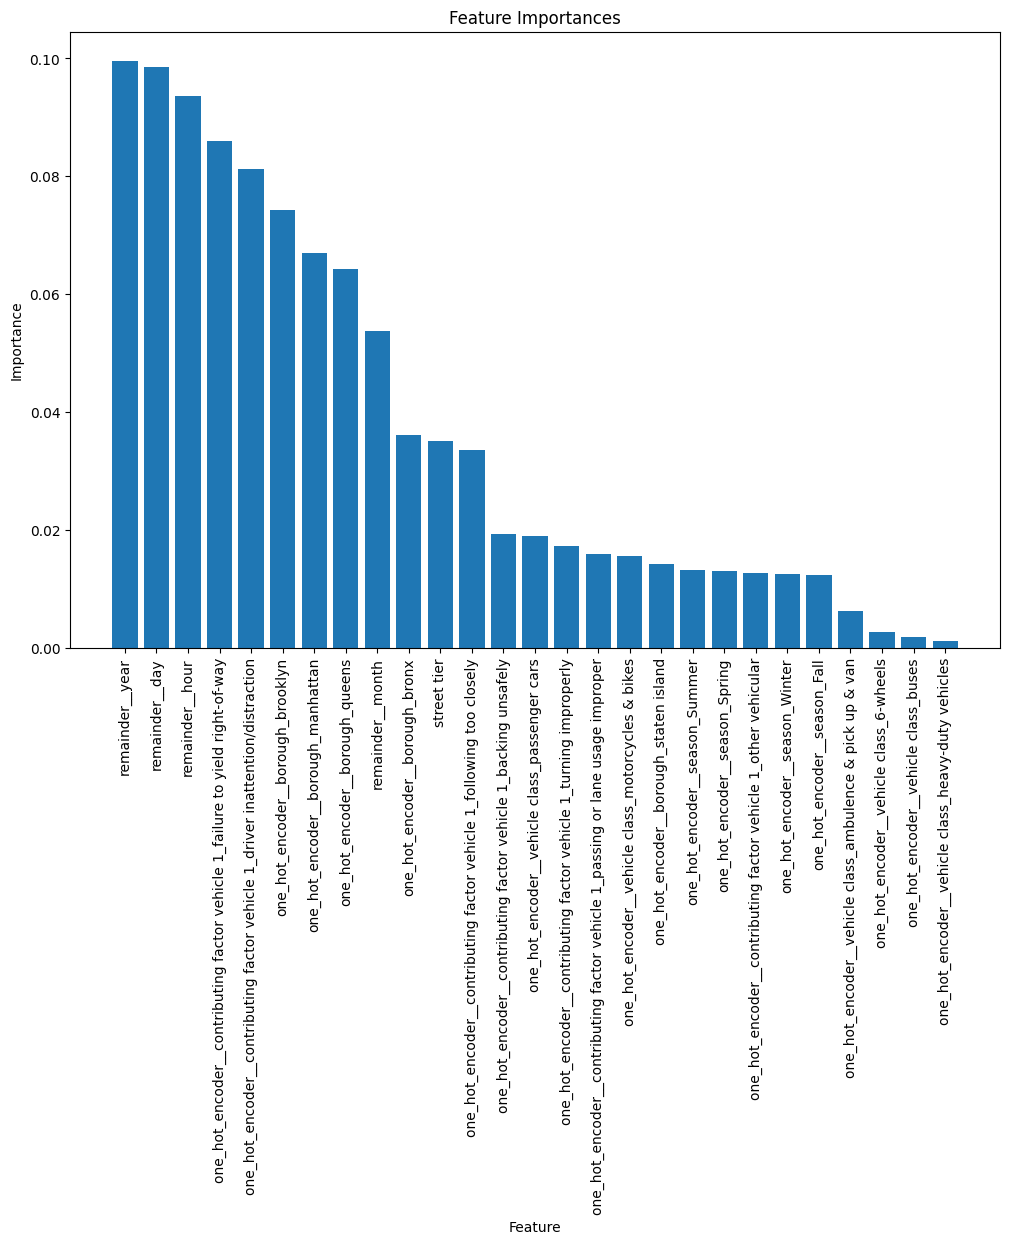

In [228]:
# Access the best estimator
best_rf = rf_grid_search.best_estimator_['classifier']

# Get feature importance
importances = best_rf.feature_importances_

# Plot feature importance
indices = np.argsort(importances)[::-1]
plt.figure(figsize=(12, 8))
plt.title('Feature Importances')
plt.bar(range(X_train.shape[1]), importances[indices], align='center')
plt.xticks(range(X_train.shape[1]), [X_train.columns[i] for i in indices], rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.show()

### Permuation Importance

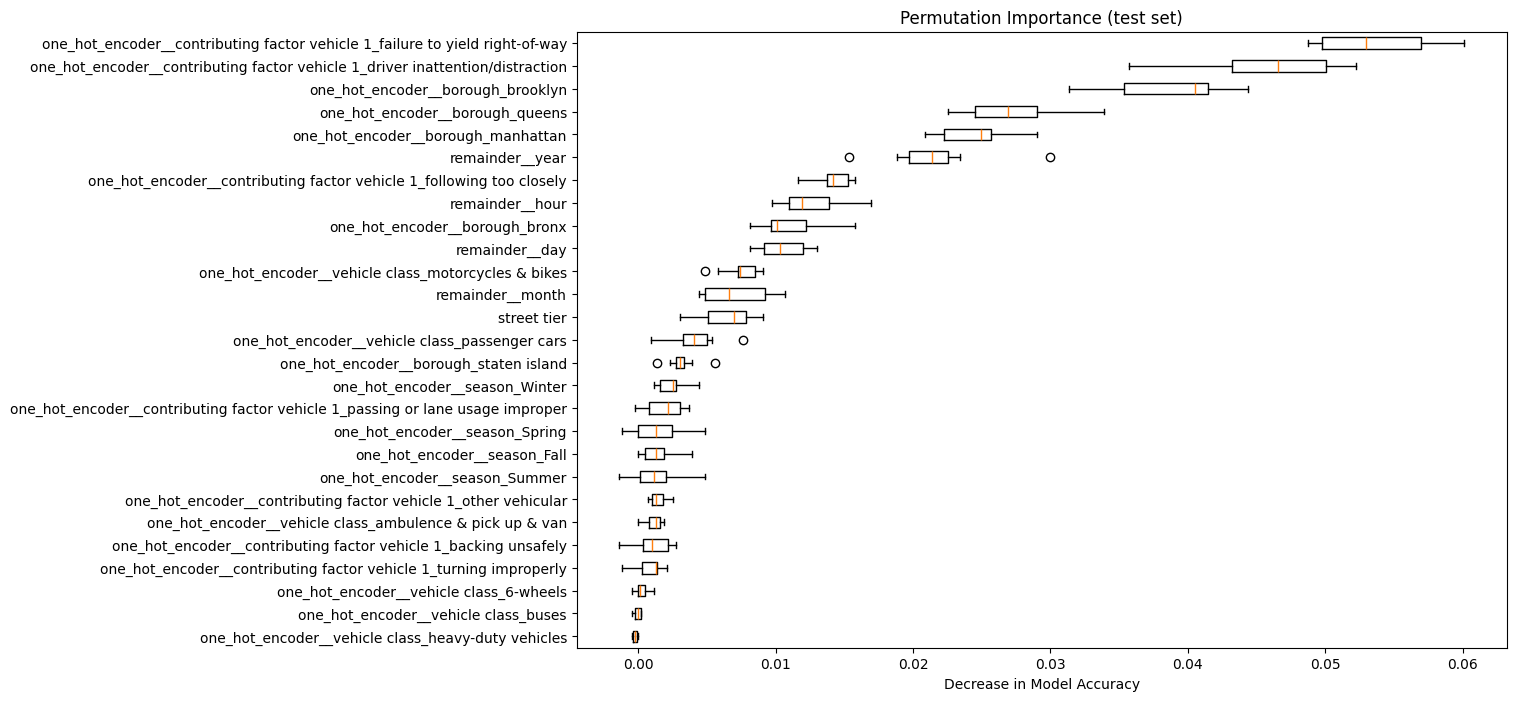

In [230]:
from sklearn.inspection import permutation_importance

# define a custom scorer that focuses on the recall of the positive class (class 1)
positive_recall_scorer = make_scorer(recall_score, pos_label=1)

# calculate permutation importance using the custom scorer
result = permutation_importance(best_rf, X_test, y_test, n_repeats=10, random_state=42, n_jobs=-1, scoring=positive_recall_scorer)

sorted_idx = result.importances_mean.argsort()

plt.figure(figsize=(12, 8))
plt.boxplot(result.importances[sorted_idx].T, vert=False, labels=[X_test.columns[i] for i in sorted_idx])
plt.title('Permutation Importance (test set) for Severe Cases')
plt.xlabel('Decrease in Model Accuracy')
plt.show()

- Metircs:
    - The x-axis shows the decrease in model accuracy. 
    - This metric represents how much the accuracy of the model decreases when the values of each feature are shuffled. 
    - A larger decrease means the feature is more important for the model’s predictions.
- Takeaways:
    - features related to "failure to yield right-of-way" and "driver inattention/distraction" are significant predictor for severe cases
    - This proves the ‘failure to yield right-of-way’ is a potential indicator that leads to severe outcomes in EDA stage

## Model: XGBoost

In [865]:
import xgboost as xgb

In [874]:
# Initialize the XGBoost classifier
xgb_classifier = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=101)


param_grid = {
    'max_depth': [12, 20, 40],
    'n_estimators': [200, 300, 400],
    'learning_rate': [0.1, 0.2, 0.3],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]
}


grid_search = GridSearchCV(
    xgb_classifier,
    param_grid,
    cv=5,  # Number of folds
    scoring={'AUC': 'roc_auc', 'F1': make_scorer(f1_score, average='macro')},  # Use a dictionary to specify multiple metrics
    refit='AUC',  # Choose which scorer to use to find the best parameters
    n_jobs=-1  # Use all available cores
)

# Fit GridSearchCV to the training data
grid_search.fit(X_train, y_train)

eval_metrics(grid_search, X_test, y_test)

Best Parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 40, 'n_estimators': 200, 'subsample': 0.8}
Best AUC Score: 0.8849238276234024
Test F1 Macro Score: 0.8001933039172375
Test AUC Score: 0.8691248103317469
Accuracy: 0.8010677808727948
Confusion Matrix:
 [[1868  292]
 [ 565 1583]]
              precision    recall  f1-score   support

           0       0.77      0.86      0.81      2160
           1       0.84      0.74      0.79      2148

    accuracy                           0.80      4308
   macro avg       0.81      0.80      0.80      4308
weighted avg       0.81      0.80      0.80      4308

